# Set-up

In [1]:
# Import the required packages
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data as datasets

# Reading in Data

In [2]:
data = datasets.gapminder()
data.head()

year      country  cluster       pop  life_expect  fertility
0  1955  Afghanistan        0   8891209       30.332        7.7
1  1960  Afghanistan        0   9829450       31.997        7.7
2  1965  Afghanistan        0  10997885       34.020        7.7
3  1970  Afghanistan        0  12430623       36.088        7.7
4  1975  Afghanistan        0  14132019       38.438        7.7

# Matplotlib vs pyplot

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


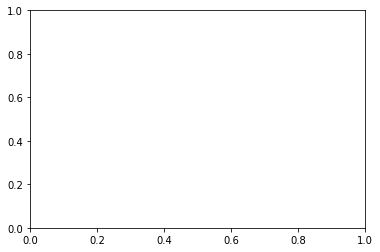

In [3]:
# Core Matplotlib
# Creating the figure "container" to hold our visualization's pieces
# Creating ax our axes for our plot
fig = plt.figure()
ax = plt.axes()
print(type(fig))
print(type(ax))

[]

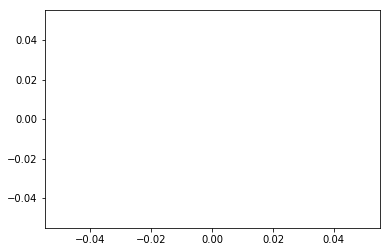

In [4]:
# Pyplot
# Easier to use the pyplot interface to do some of the work for us
plt.plot()

# The Semicolon
Placing a semicolon at the end of matplotlib statements prevents it from printing out output from our pandas dataframe before producing the plot

(array([645.,  23.,   3.,   3.,   3.,   4.,   2.,   4.,   3.,   3.]),
 array([5.38650000e+04, 1.30366705e+08, 2.60679546e+08, 3.90992386e+08,
        5.21305226e+08, 6.51618066e+08, 7.81930907e+08, 9.12243747e+08,
        1.04255659e+09, 1.17286943e+09, 1.30318227e+09]),
 <a list of 10 Patch objects>)

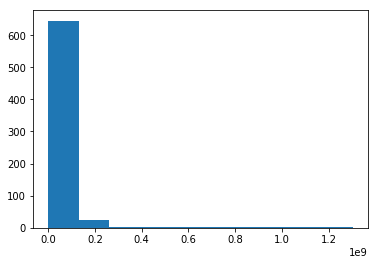

In [5]:
# Without a semicolon
plt.hist(data['pop'])

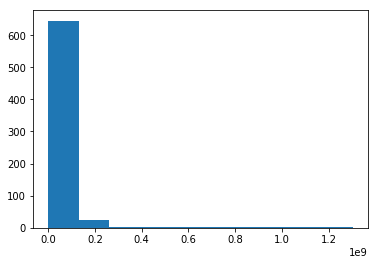

In [6]:
# With a semicolon
plt.hist(data['pop']);

# Plot size & styling
### Plot Size

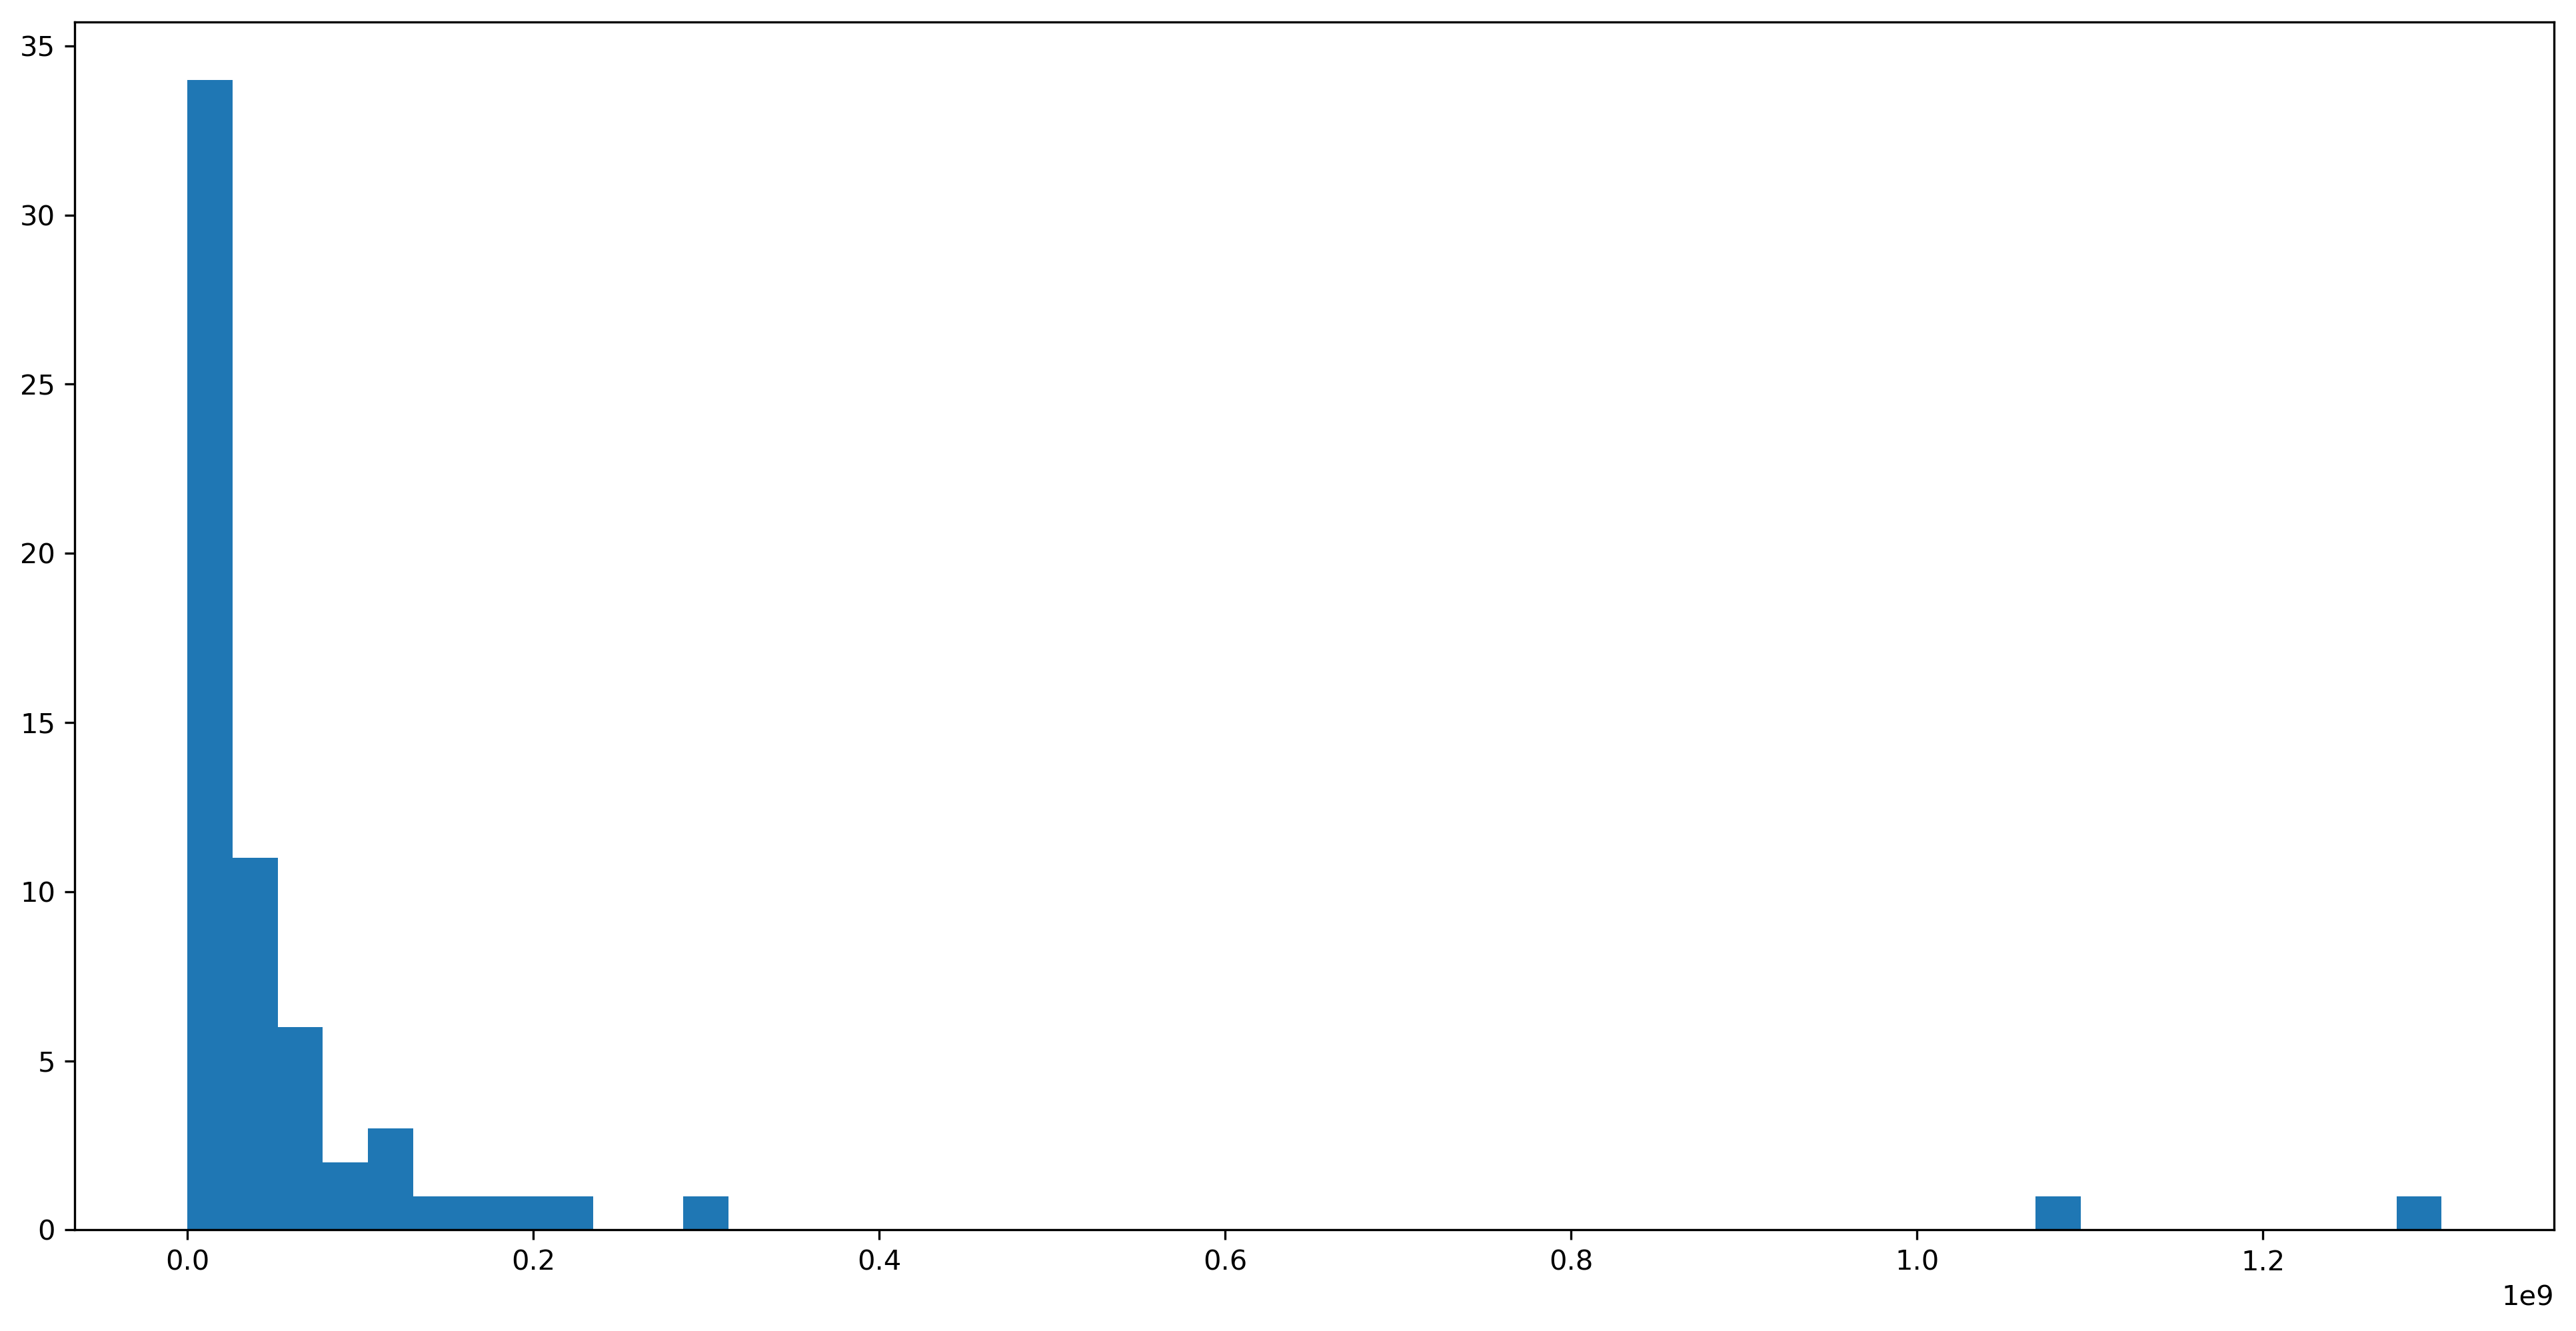

In [7]:
plt.figure(figsize=(16,8), dpi=300) #Changes the size of the plot. Use 300dpi for print quality plots.
plt.hist(data[data['year']==2005]['pop'], bins=50);

### Styling

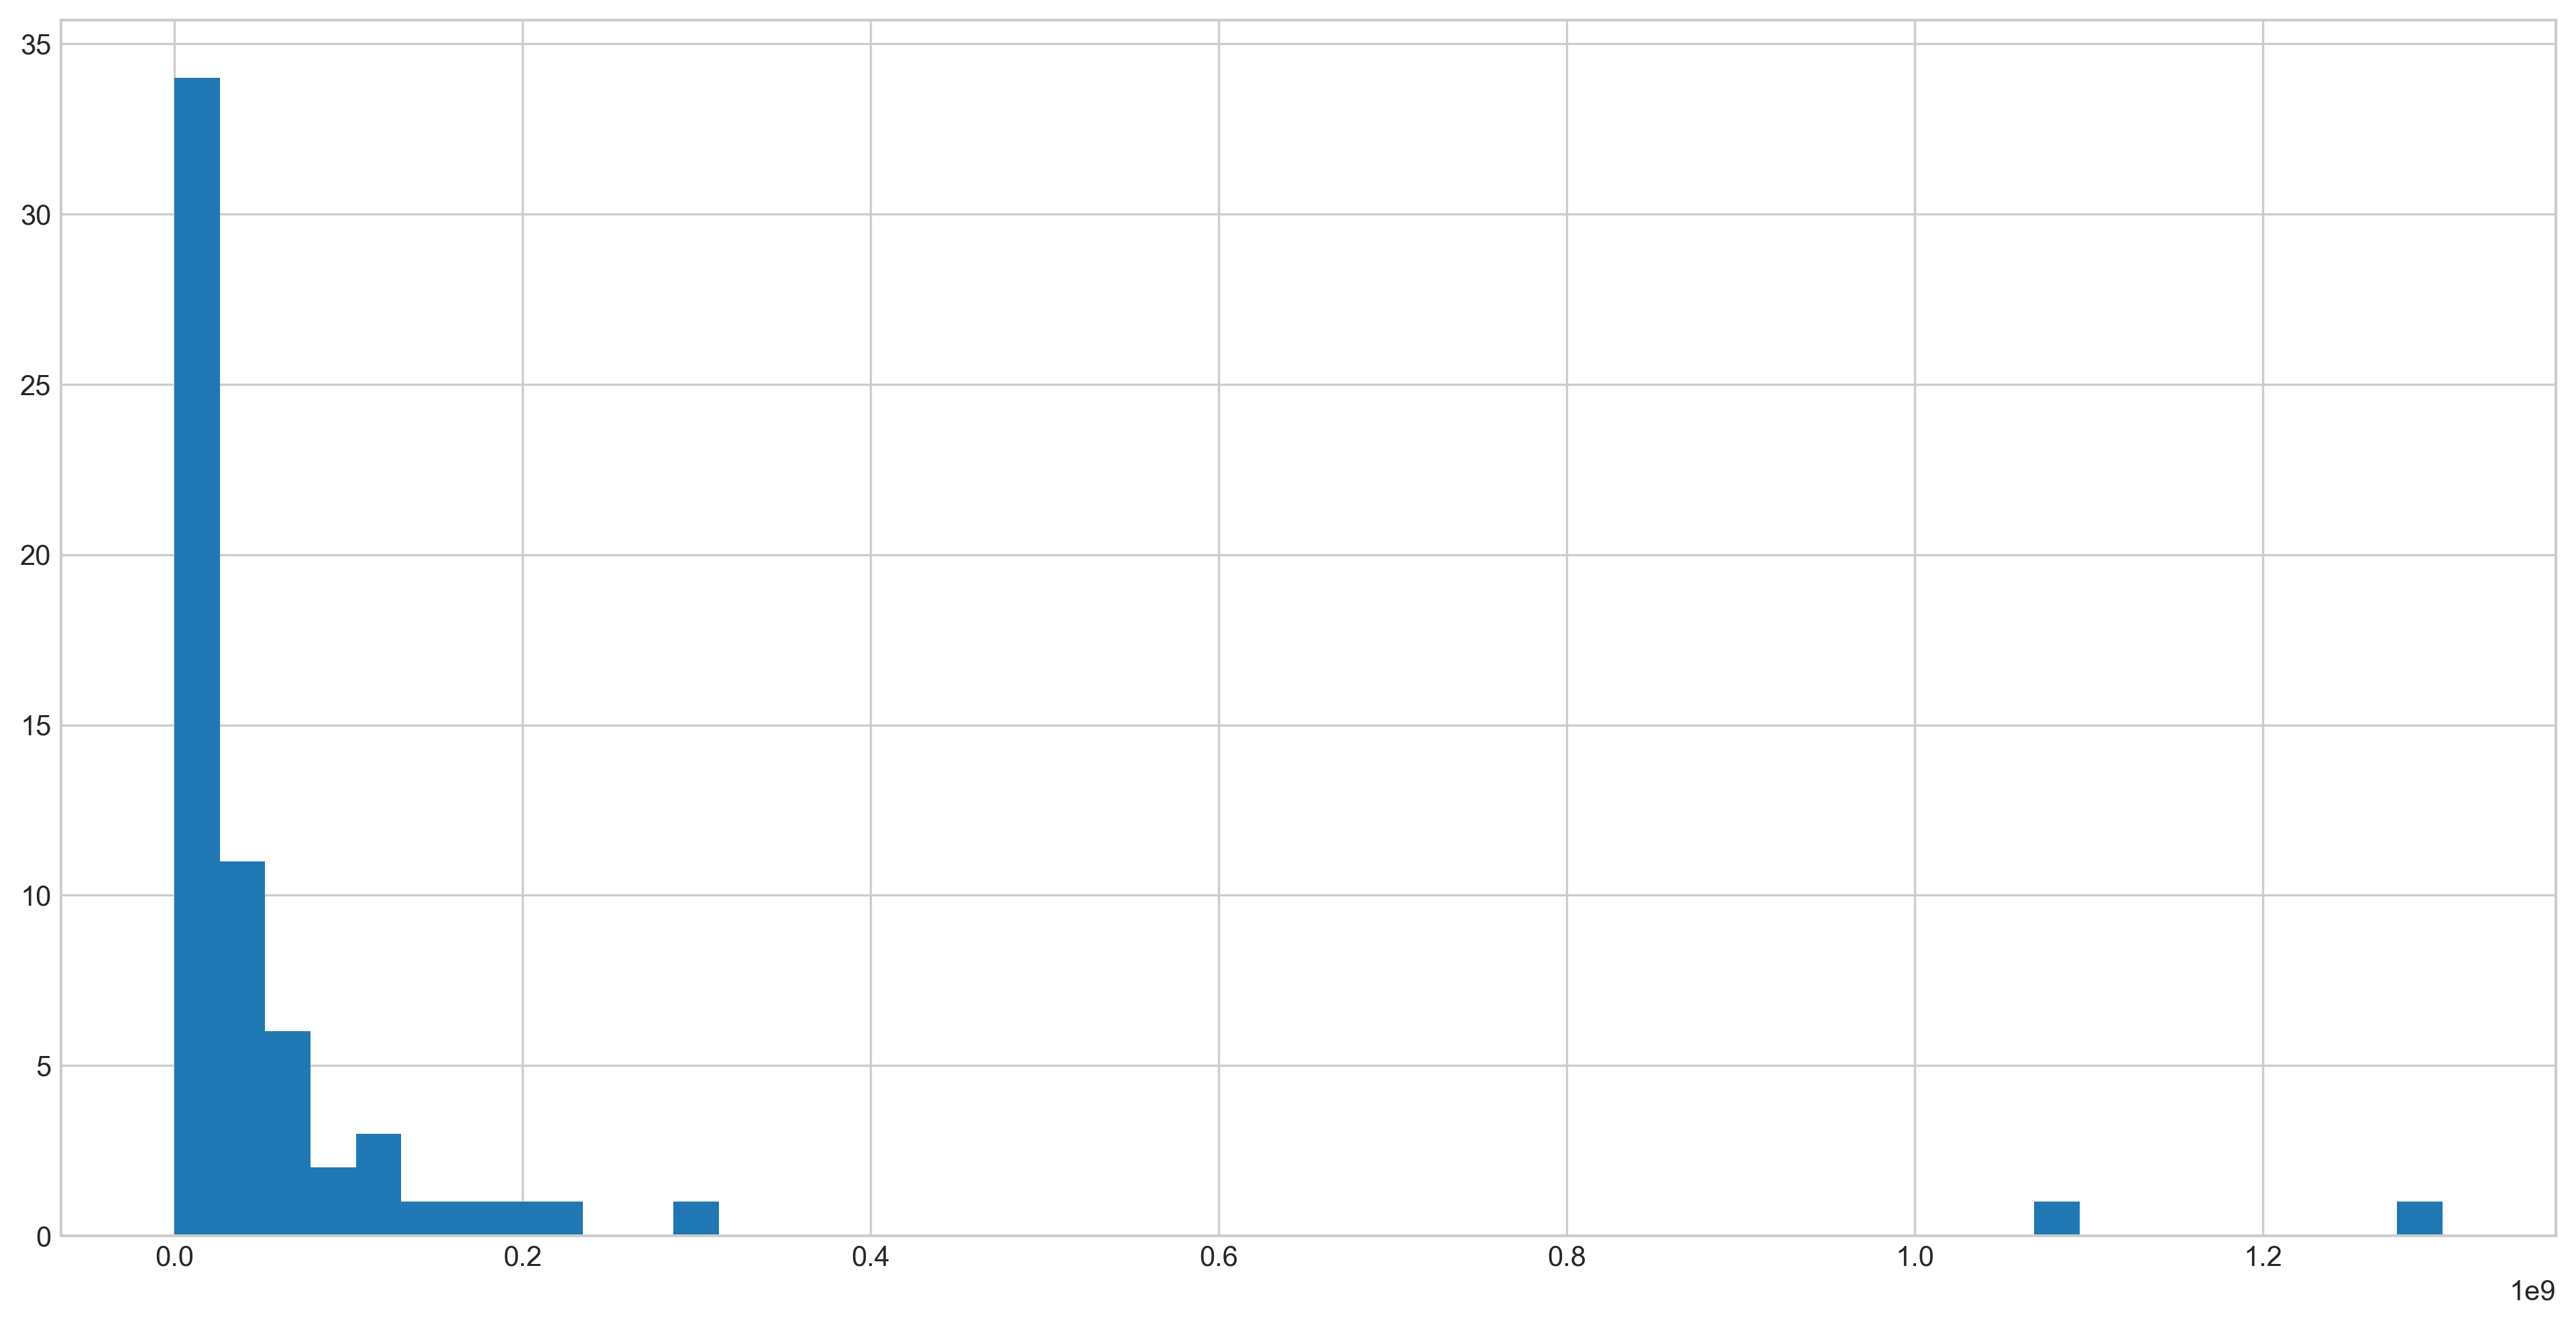

In [8]:
plt.style.use('seaborn-whitegrid') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], bins=50);

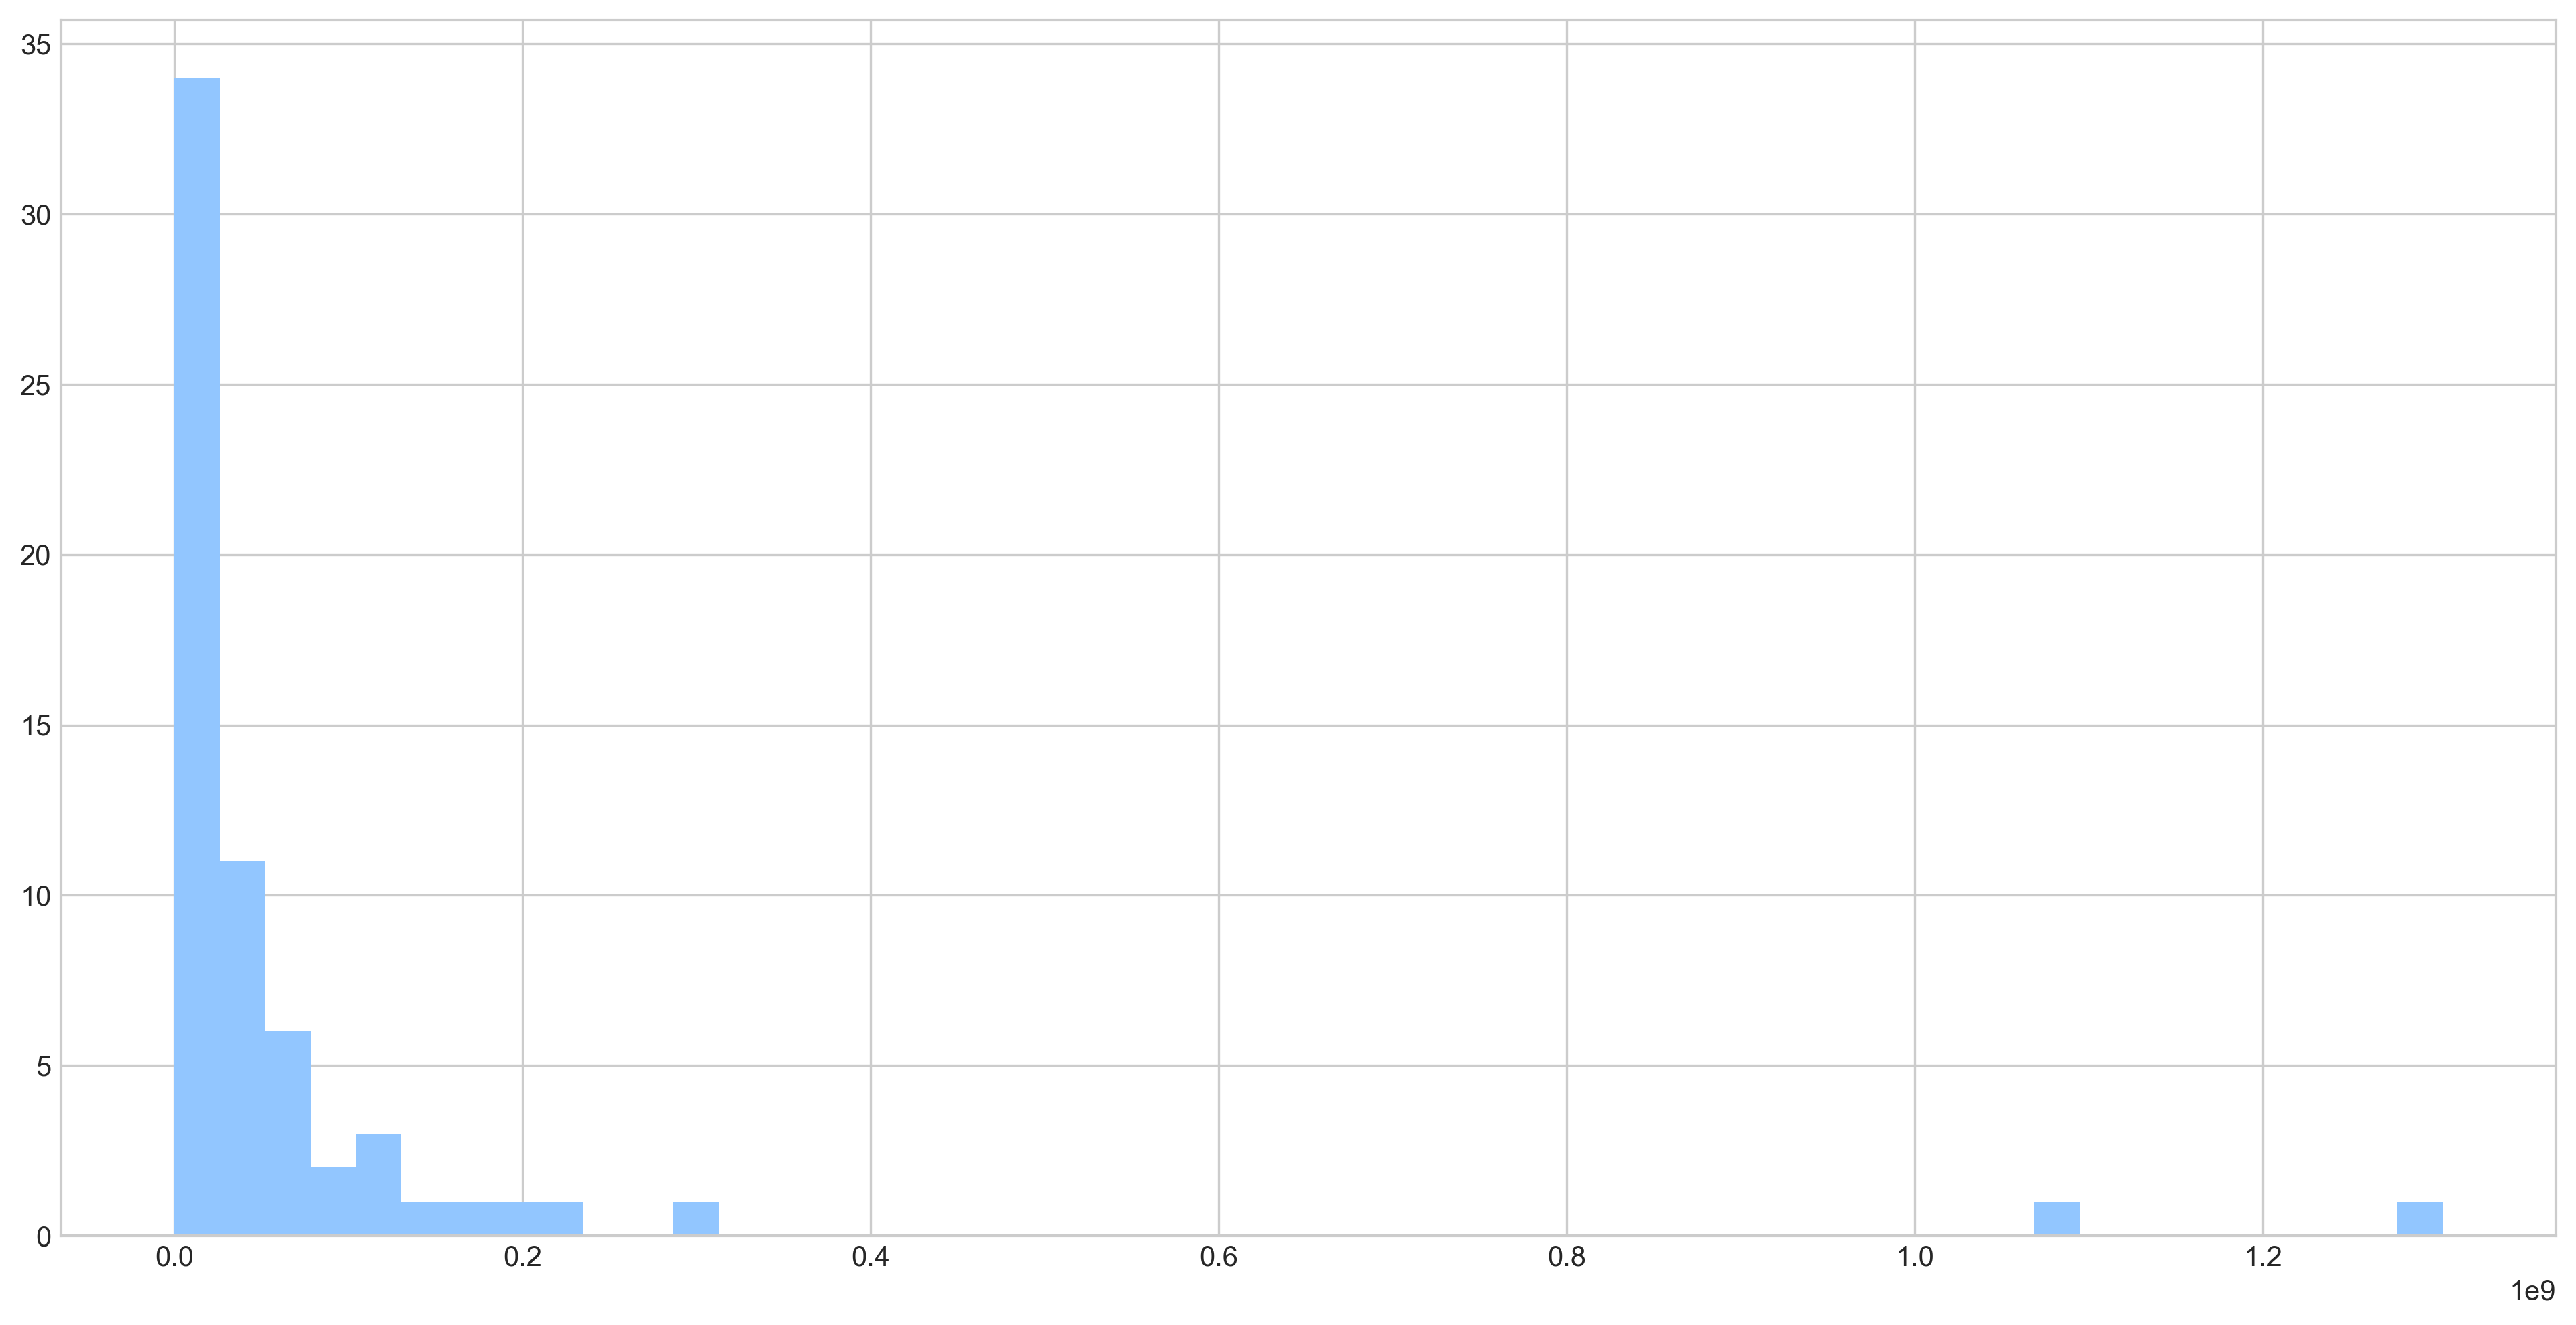

In [9]:
plt.style.use('seaborn-pastel') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], bins=50);

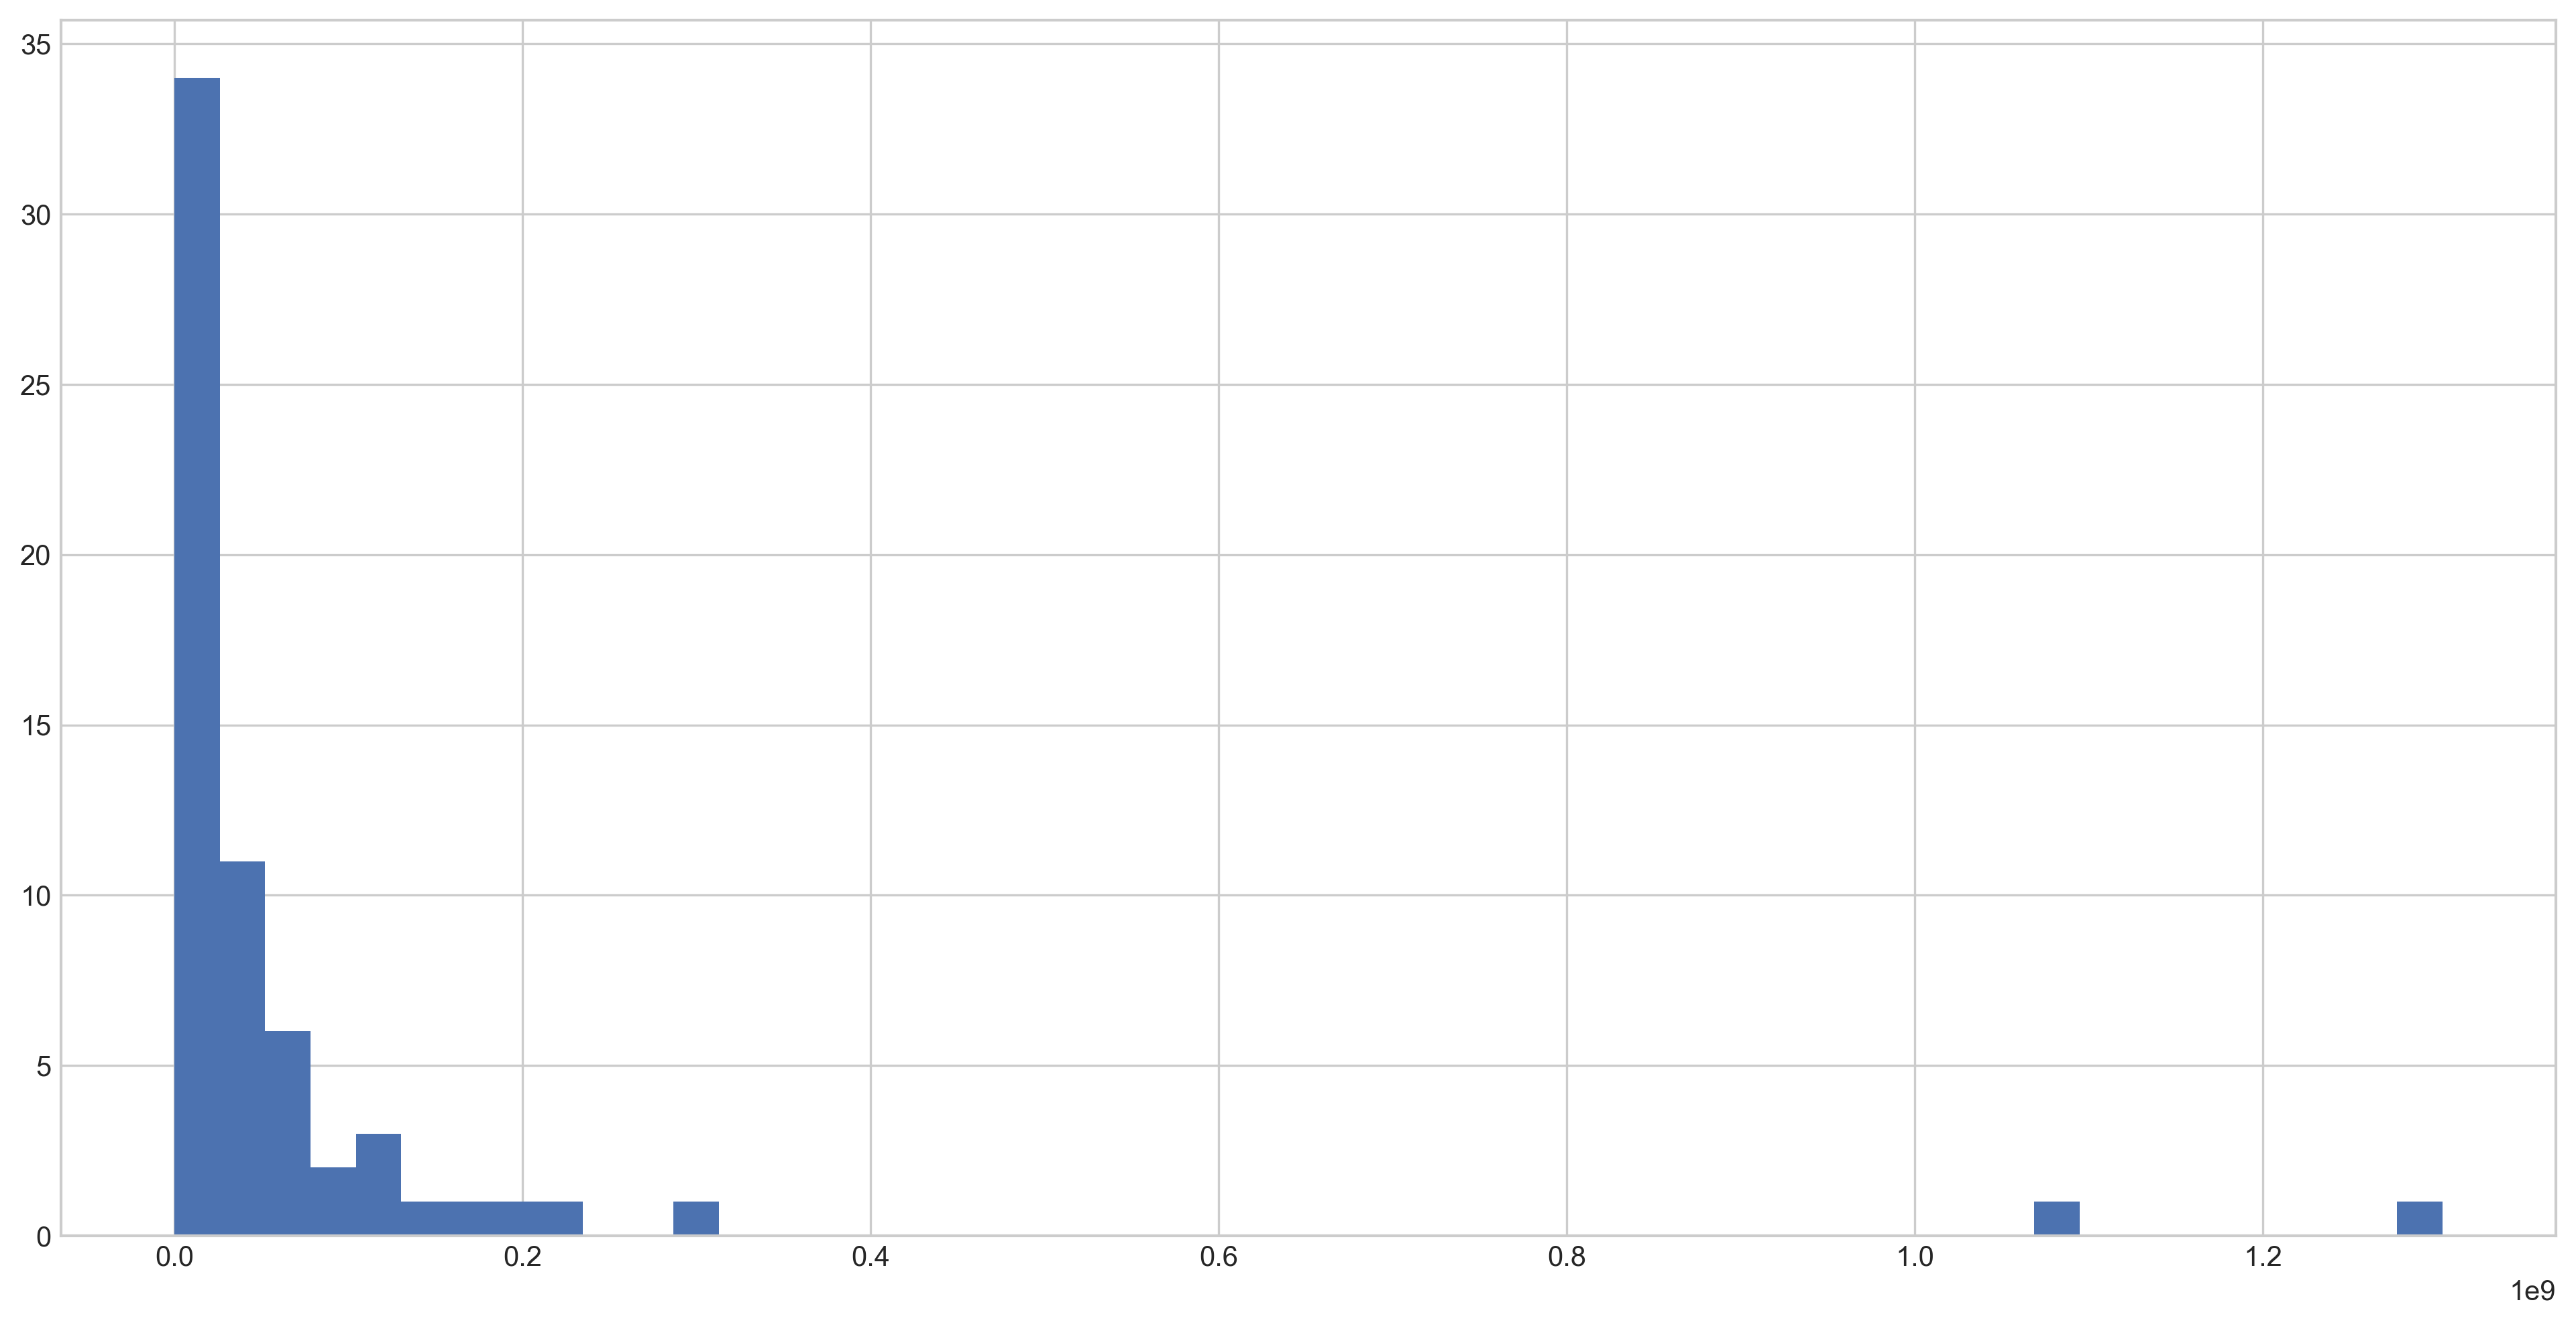

In [10]:
plt.style.use('seaborn-deep') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], bins=50);

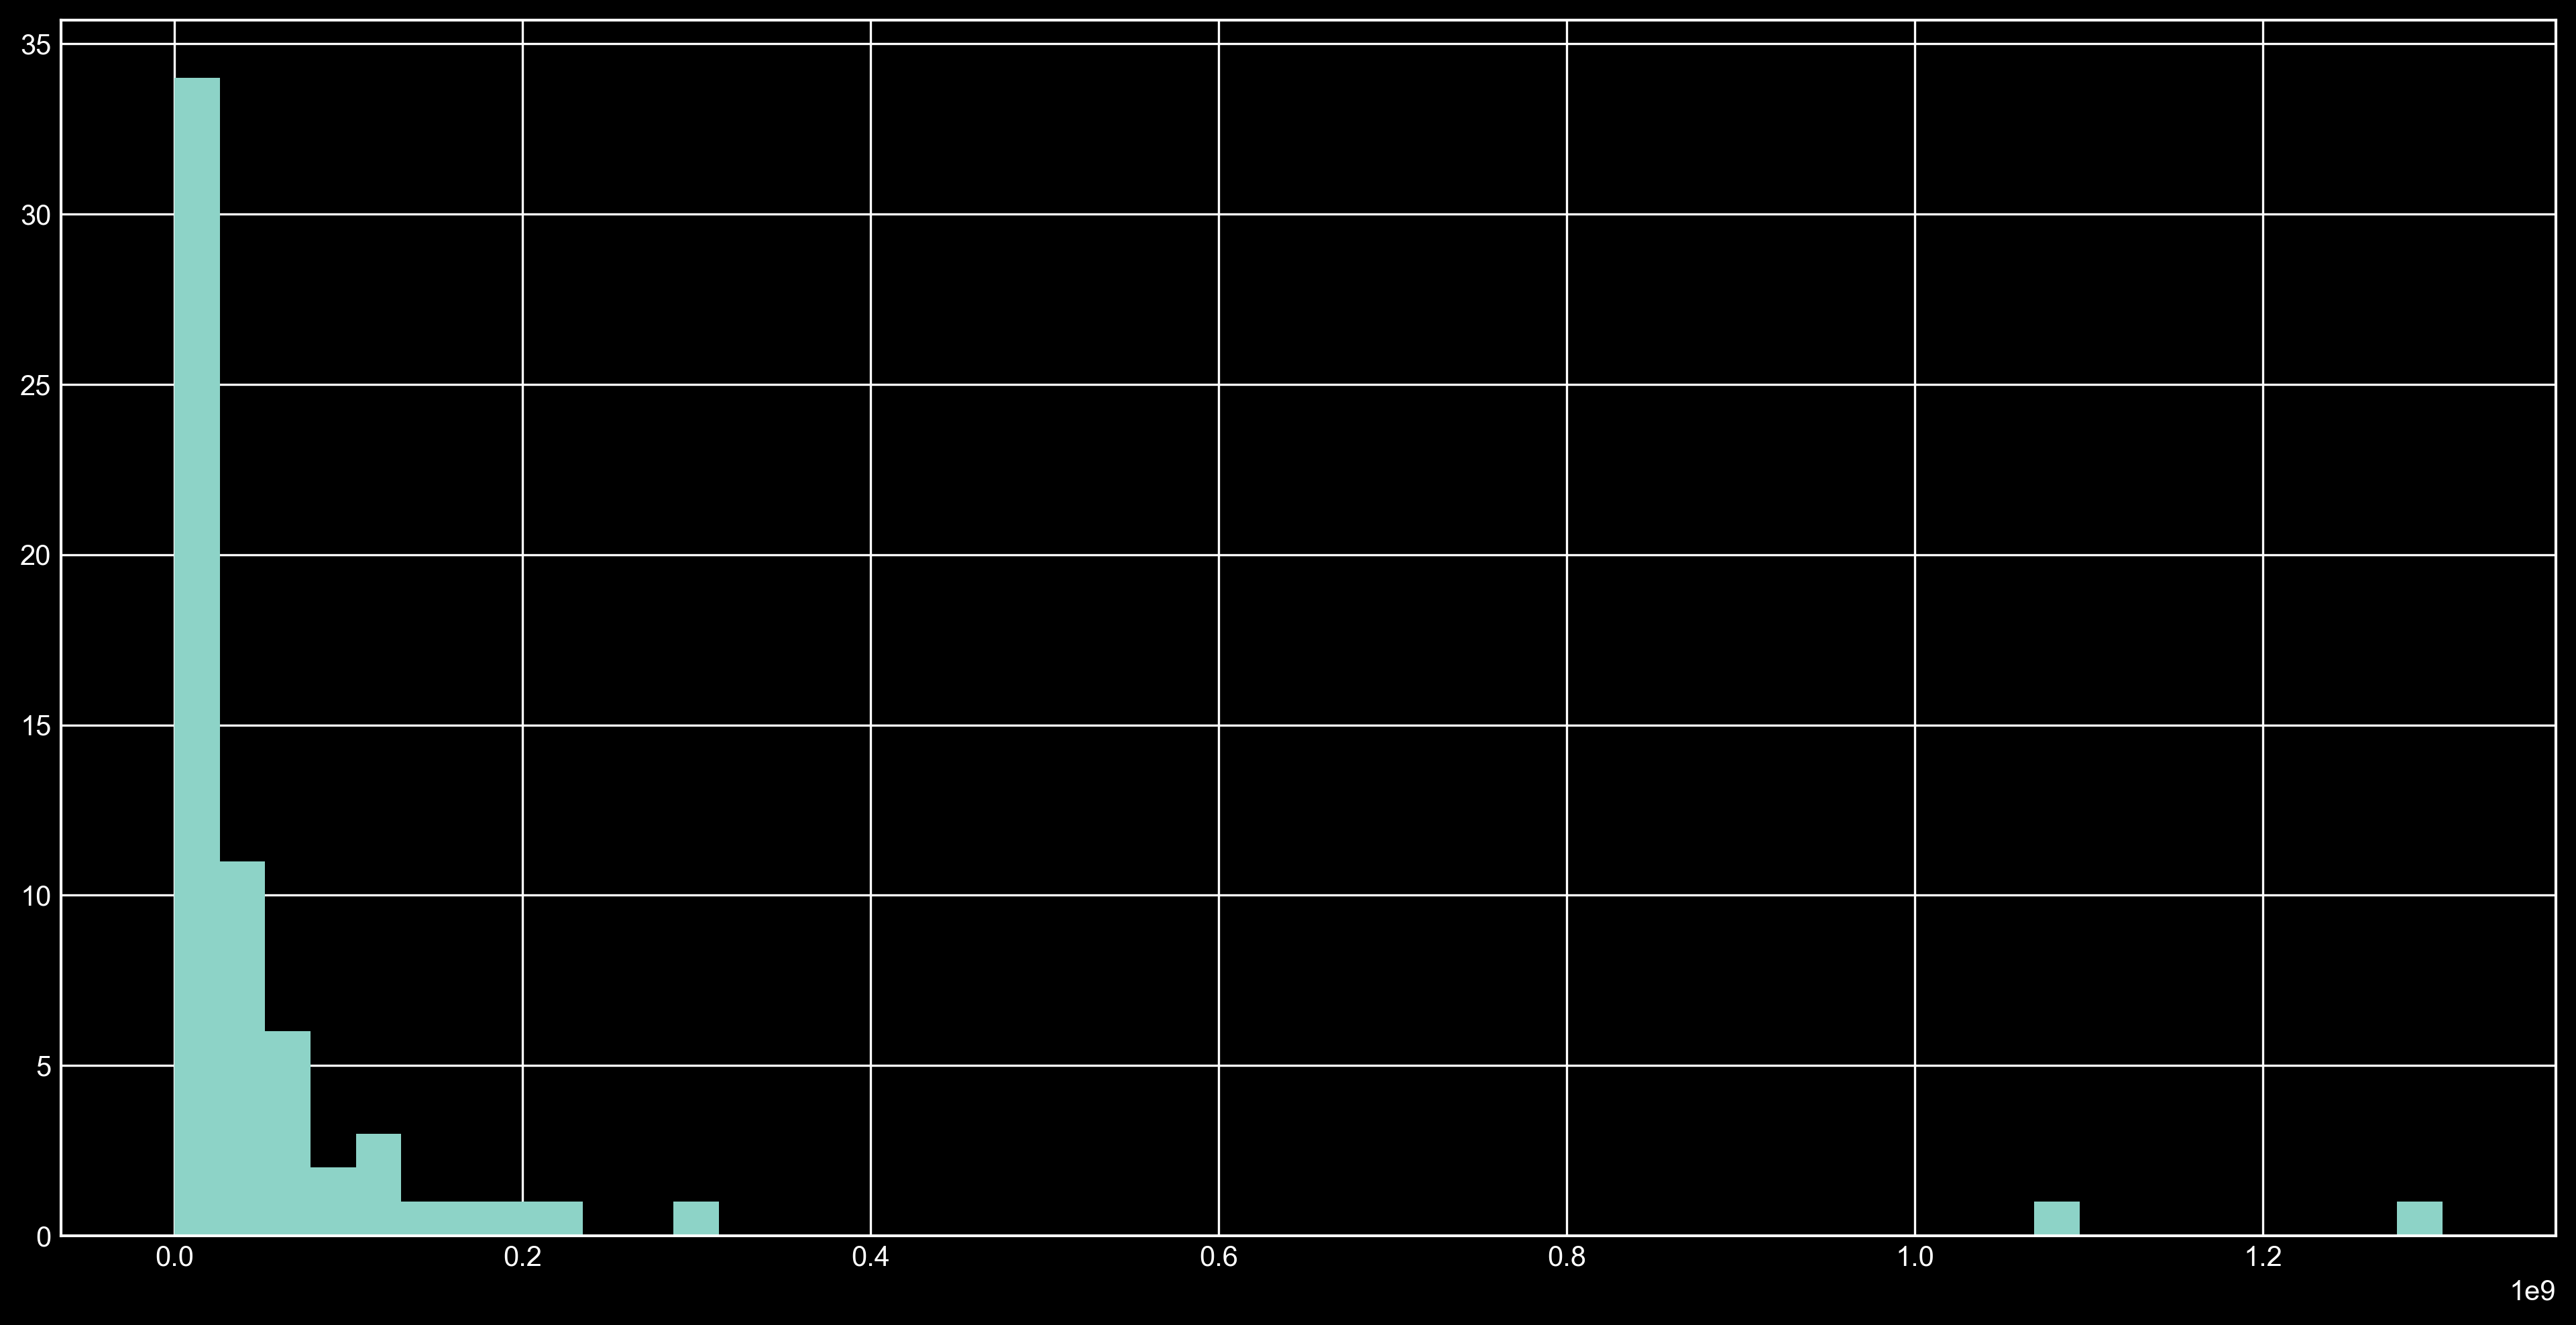

In [11]:
plt.style.use('dark_background') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], bins=50);

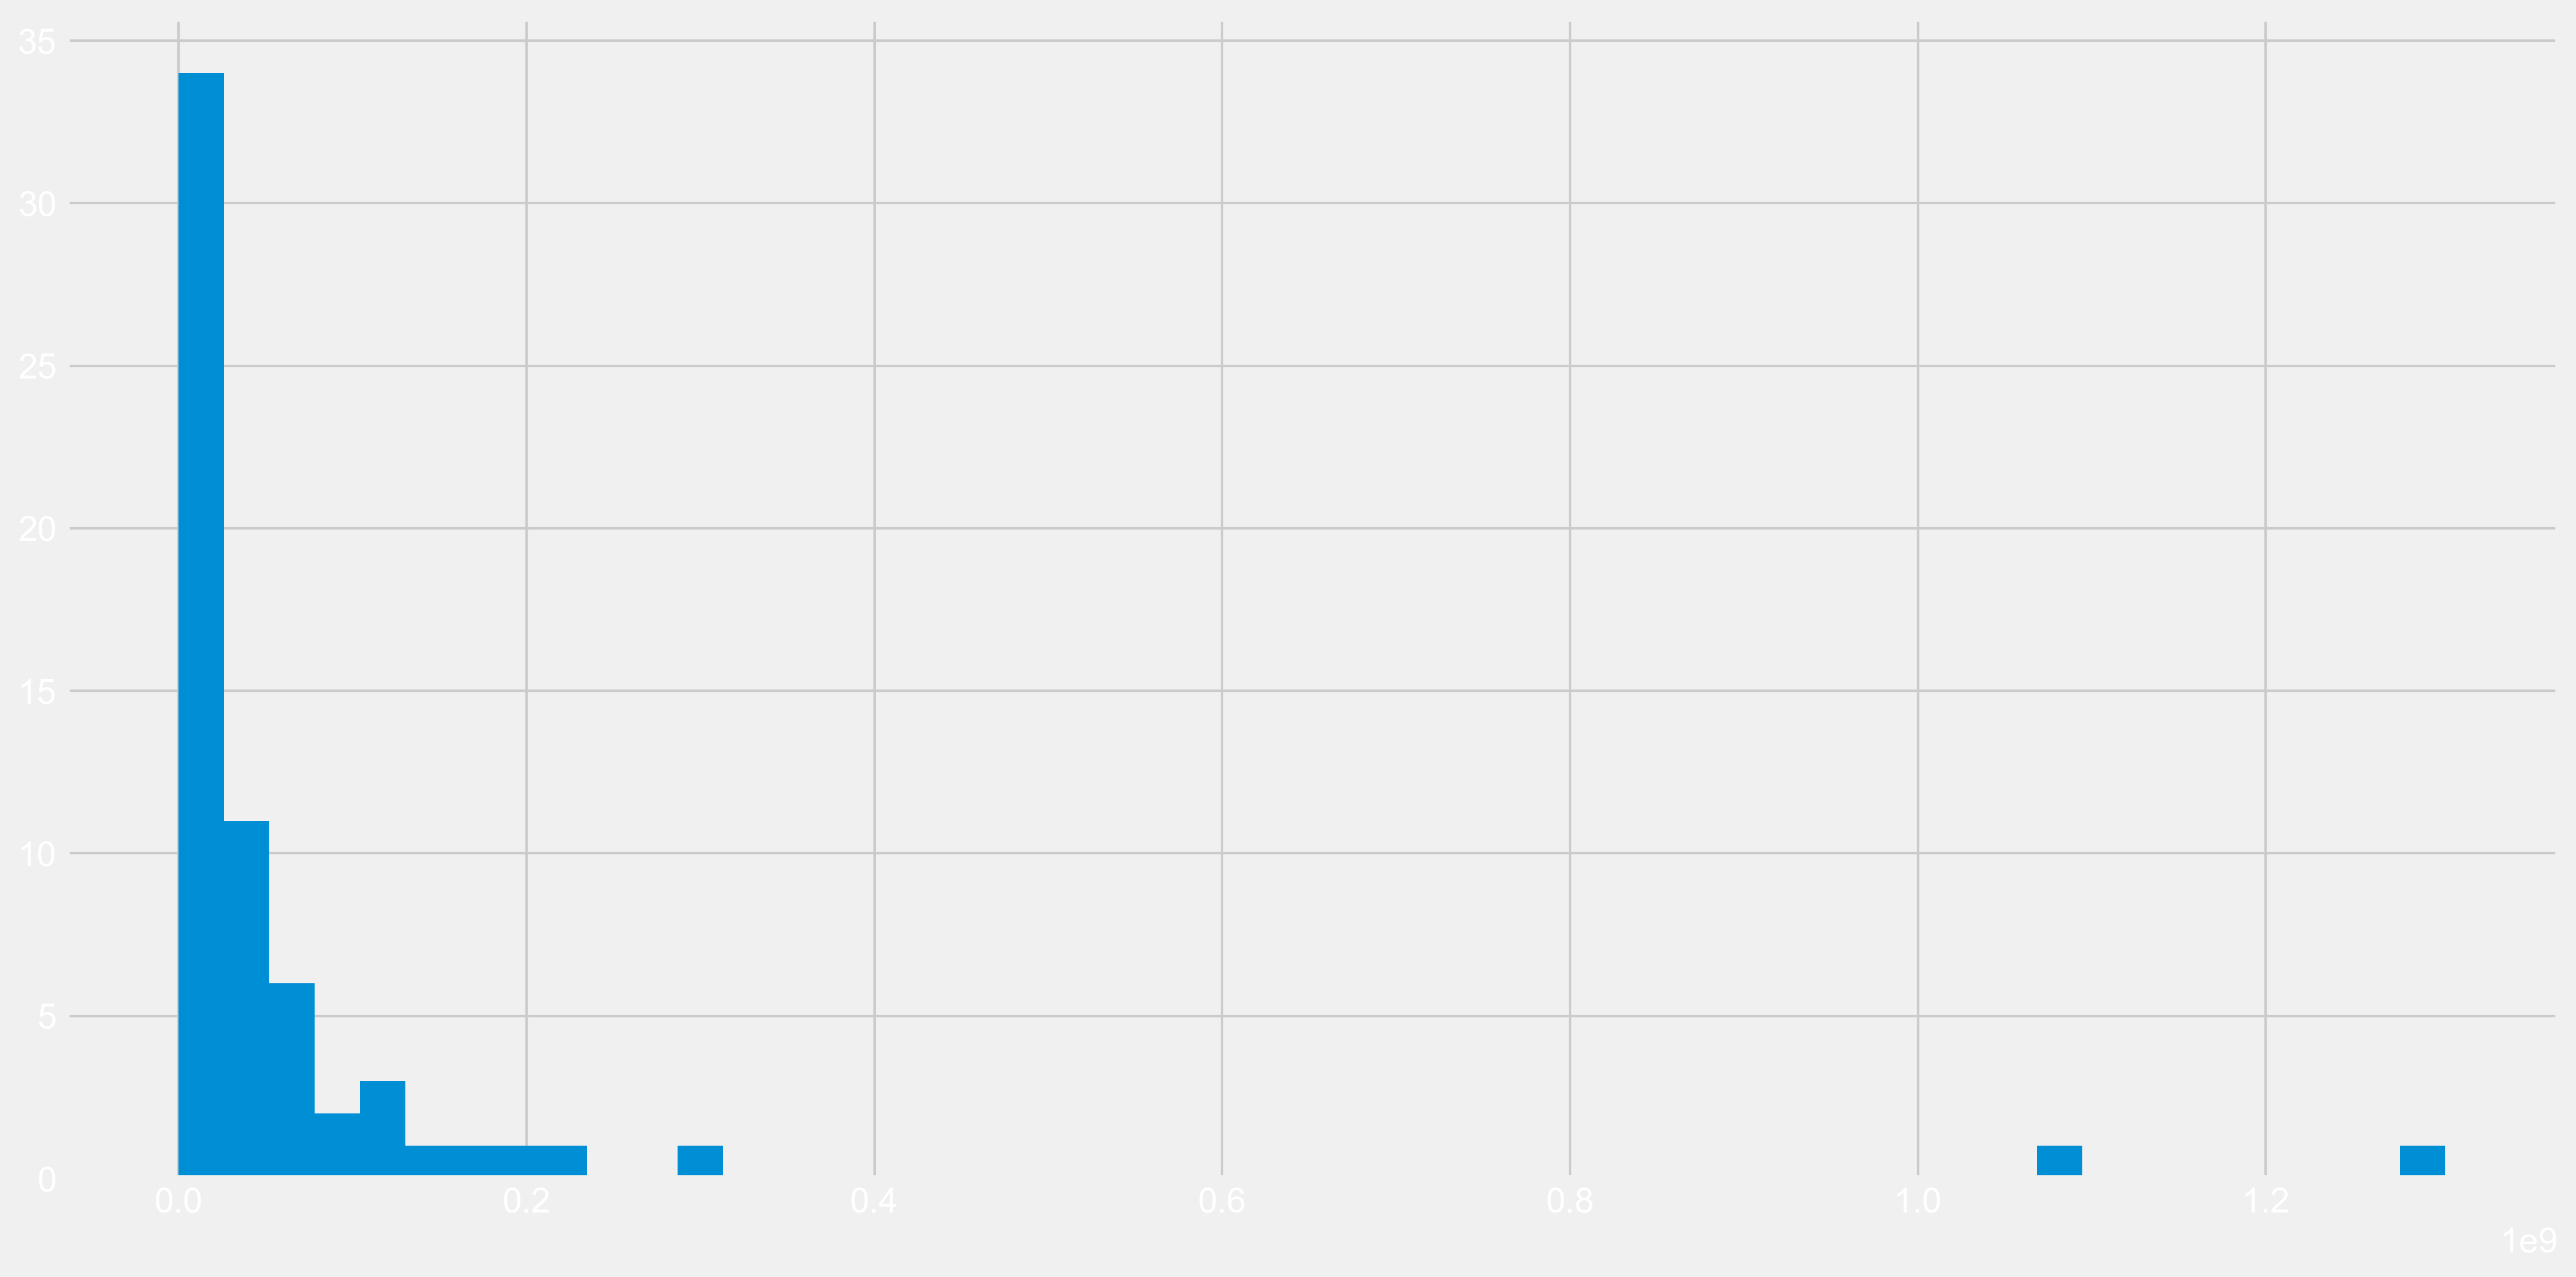

In [12]:
plt.style.use('fivethirtyeight') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], bins=50);

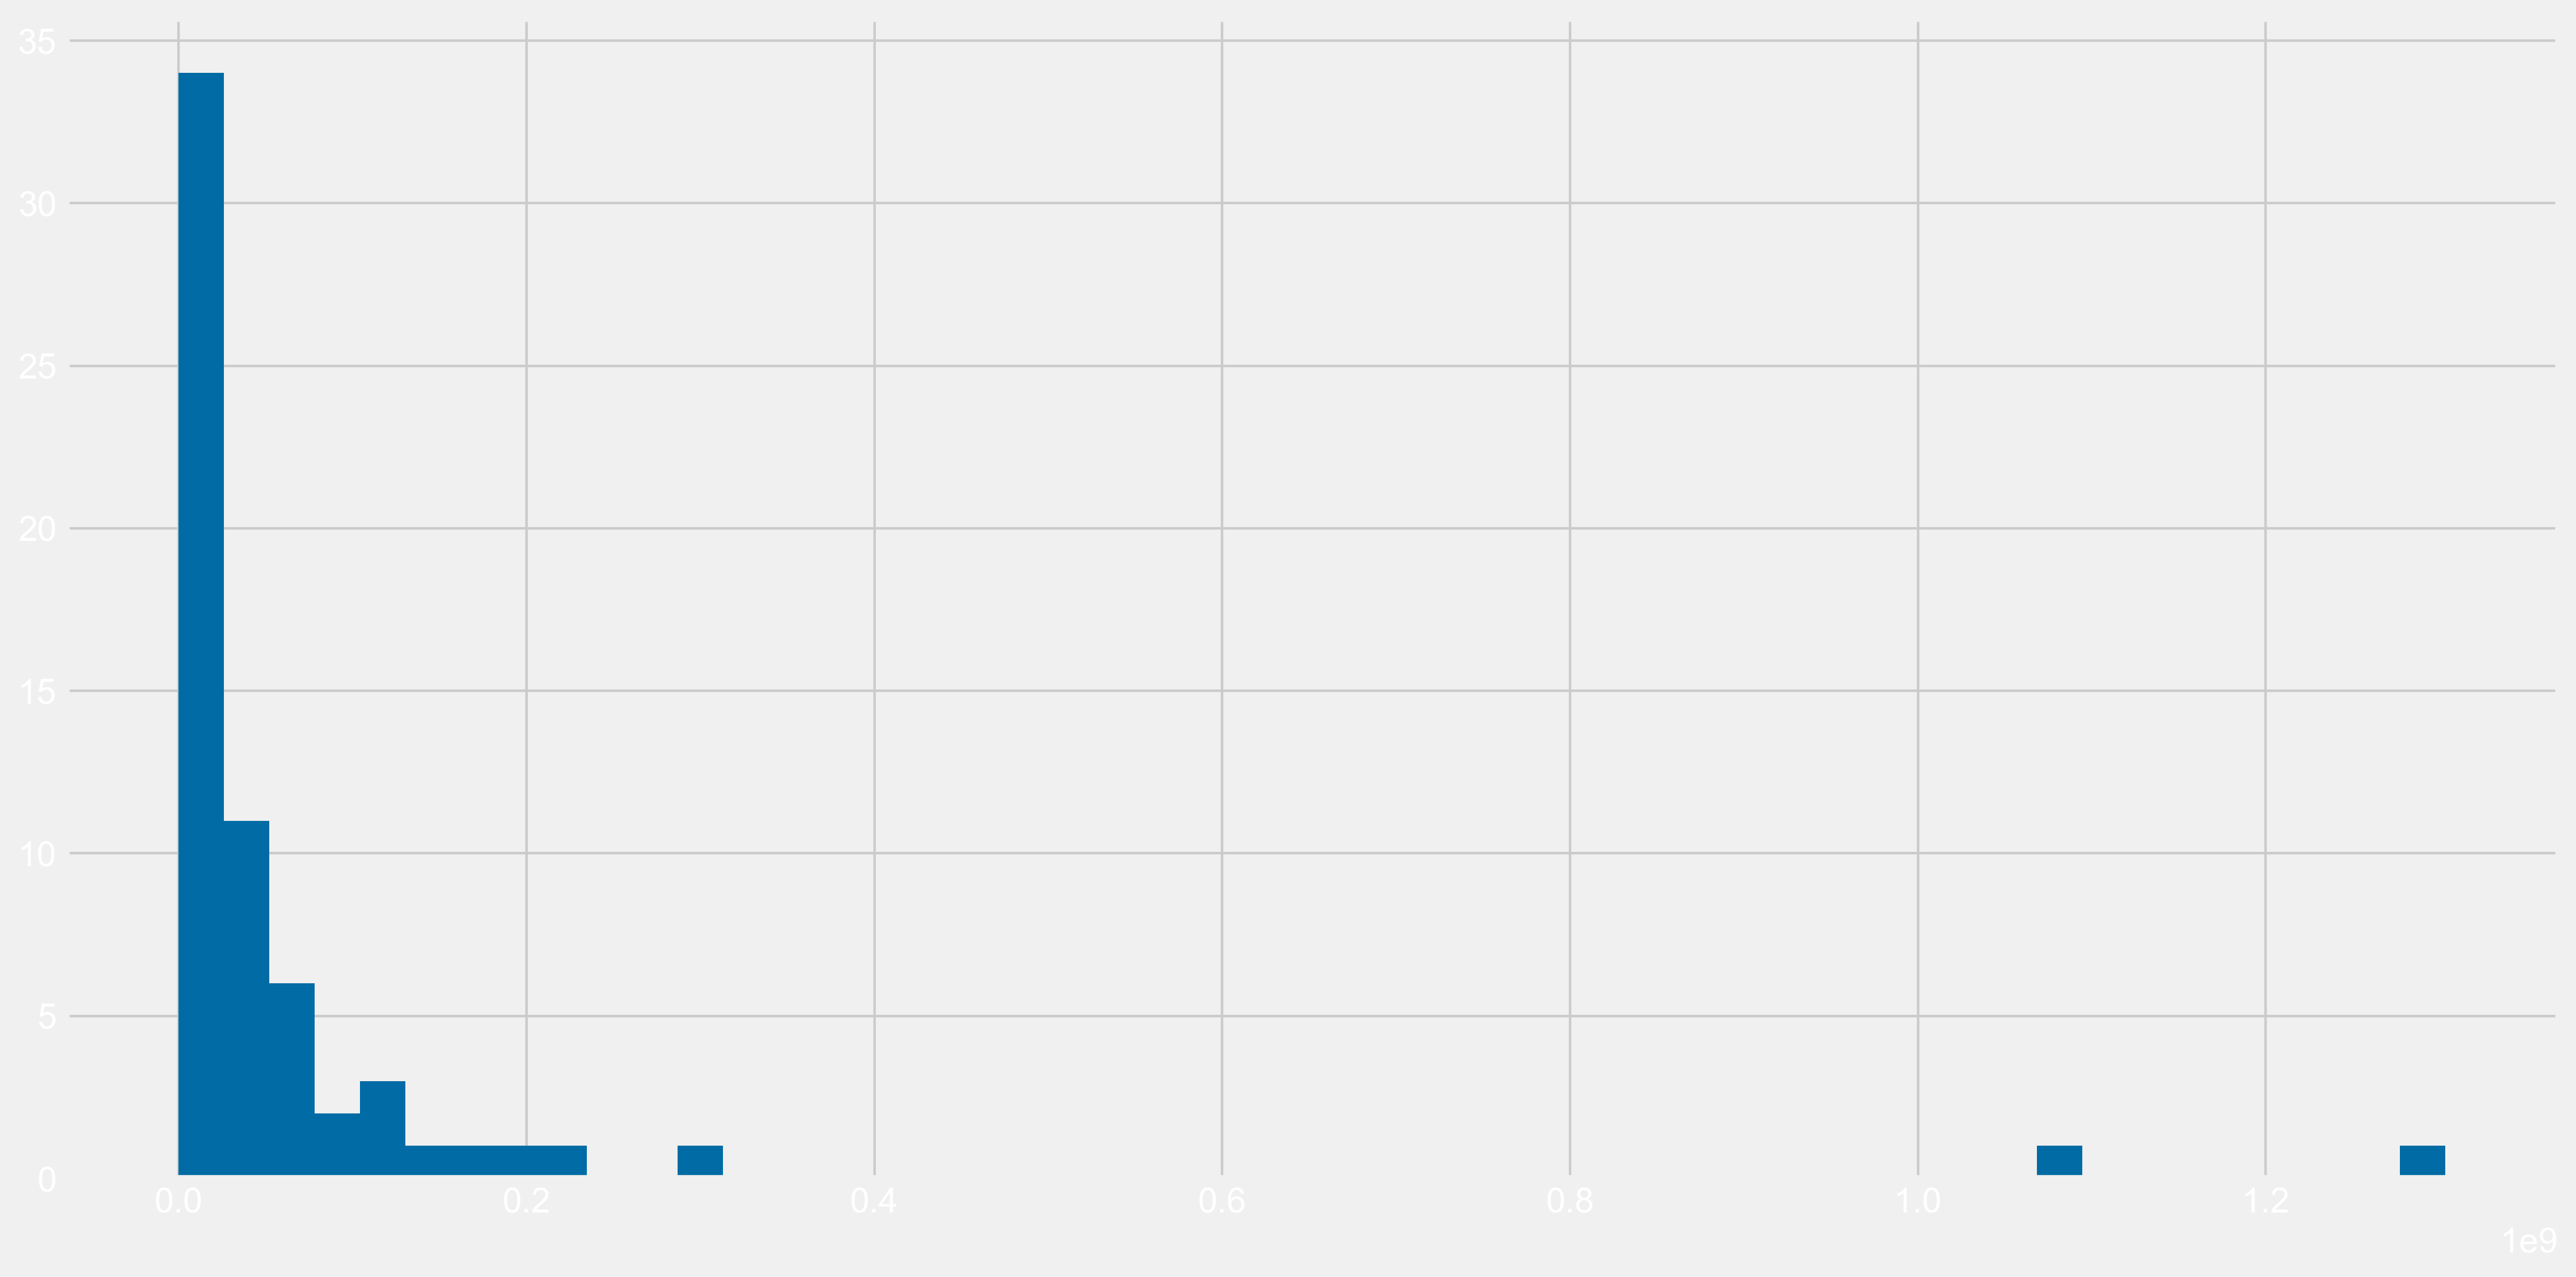

In [13]:
plt.style.use('tableau-colorblind10') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], bins=50);

A full list of the Matplotlib style sheets can be found here:
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

# Graph Types & Parameters

### Histograms

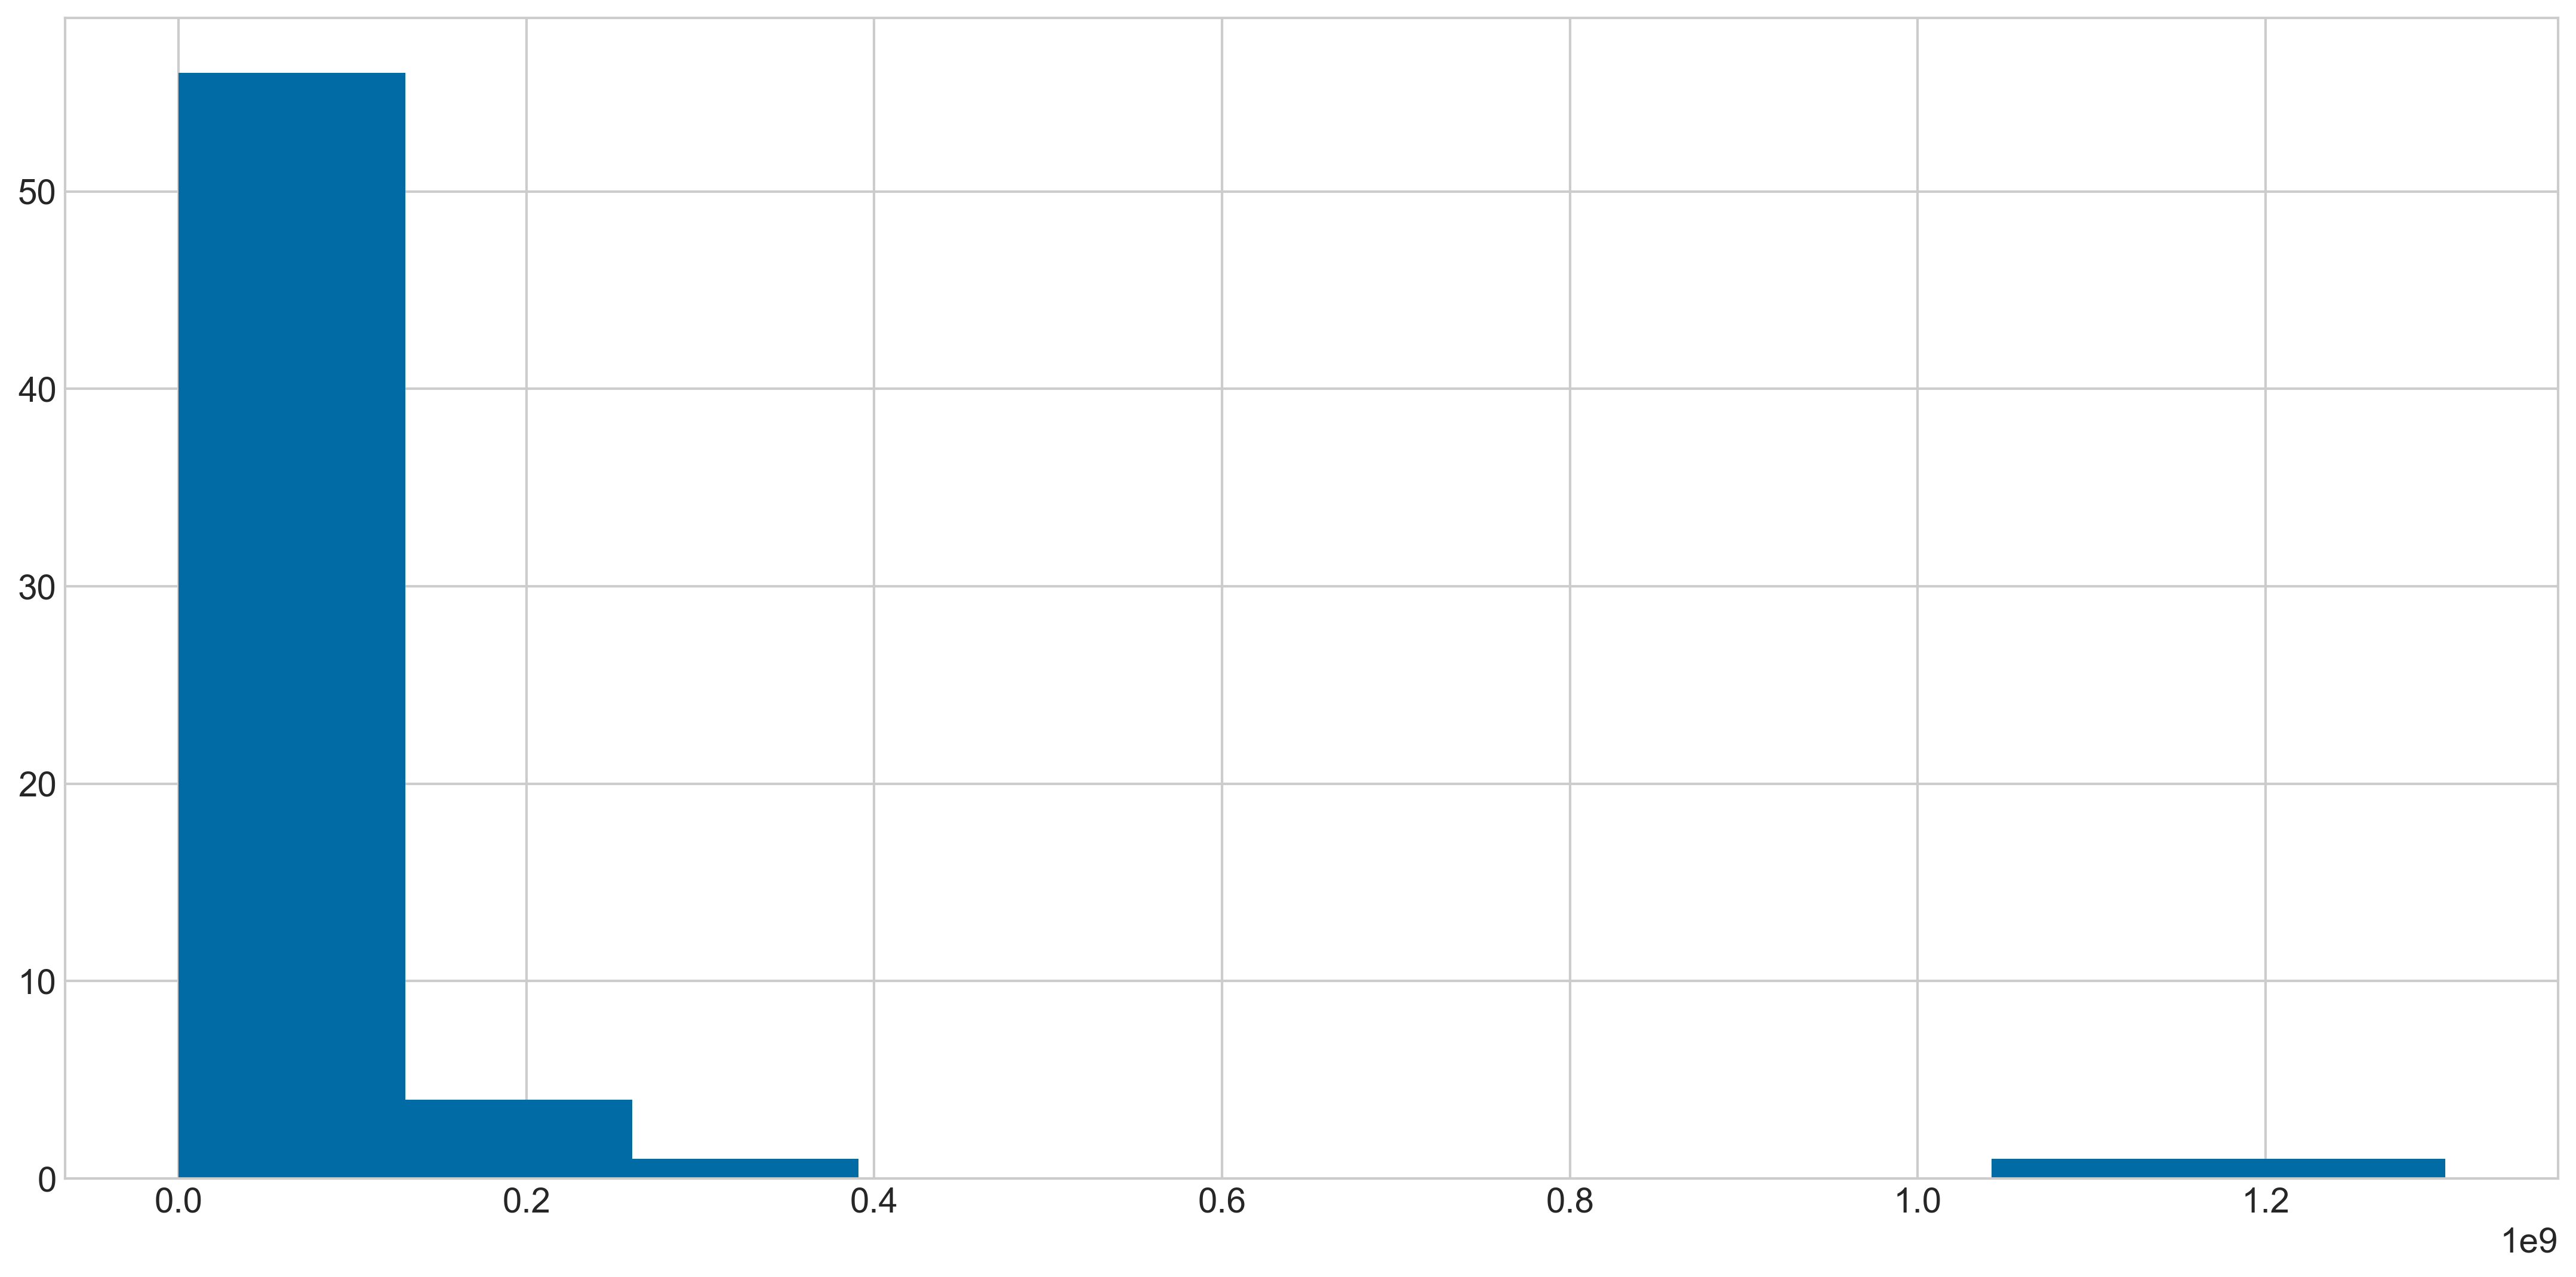

In [14]:
plt.style.use('seaborn-whitegrid') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop']);

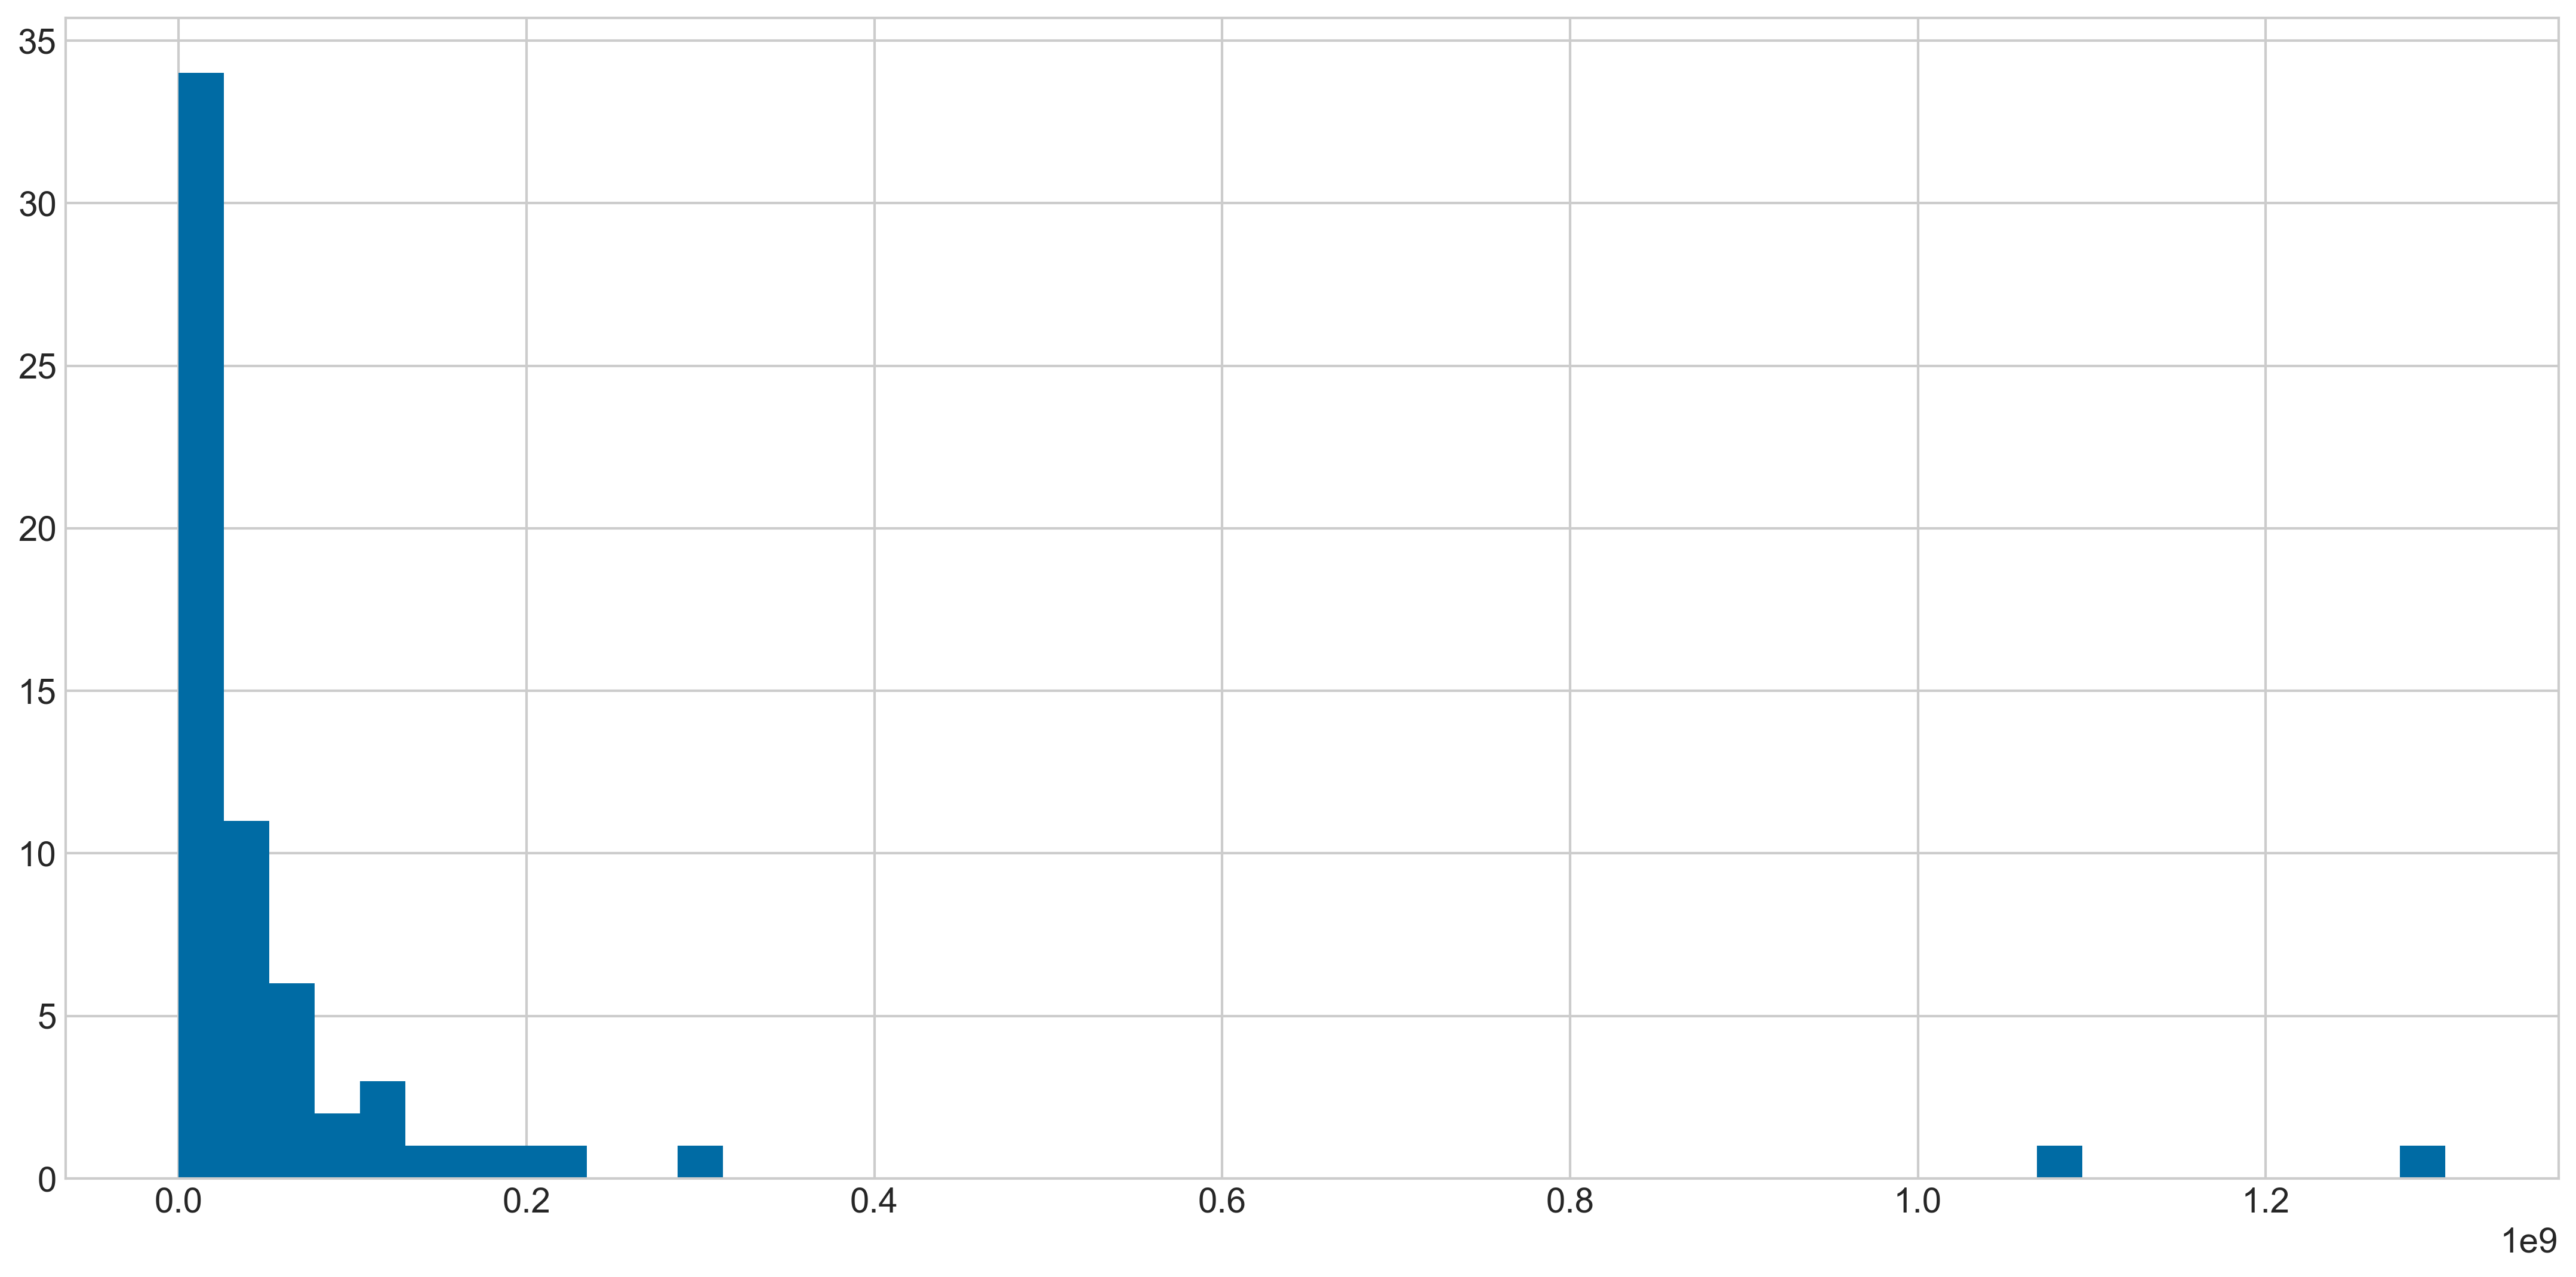

In [15]:
plt.style.use('seaborn-whitegrid') # Changes the style of the plot
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], 
         bins=50);

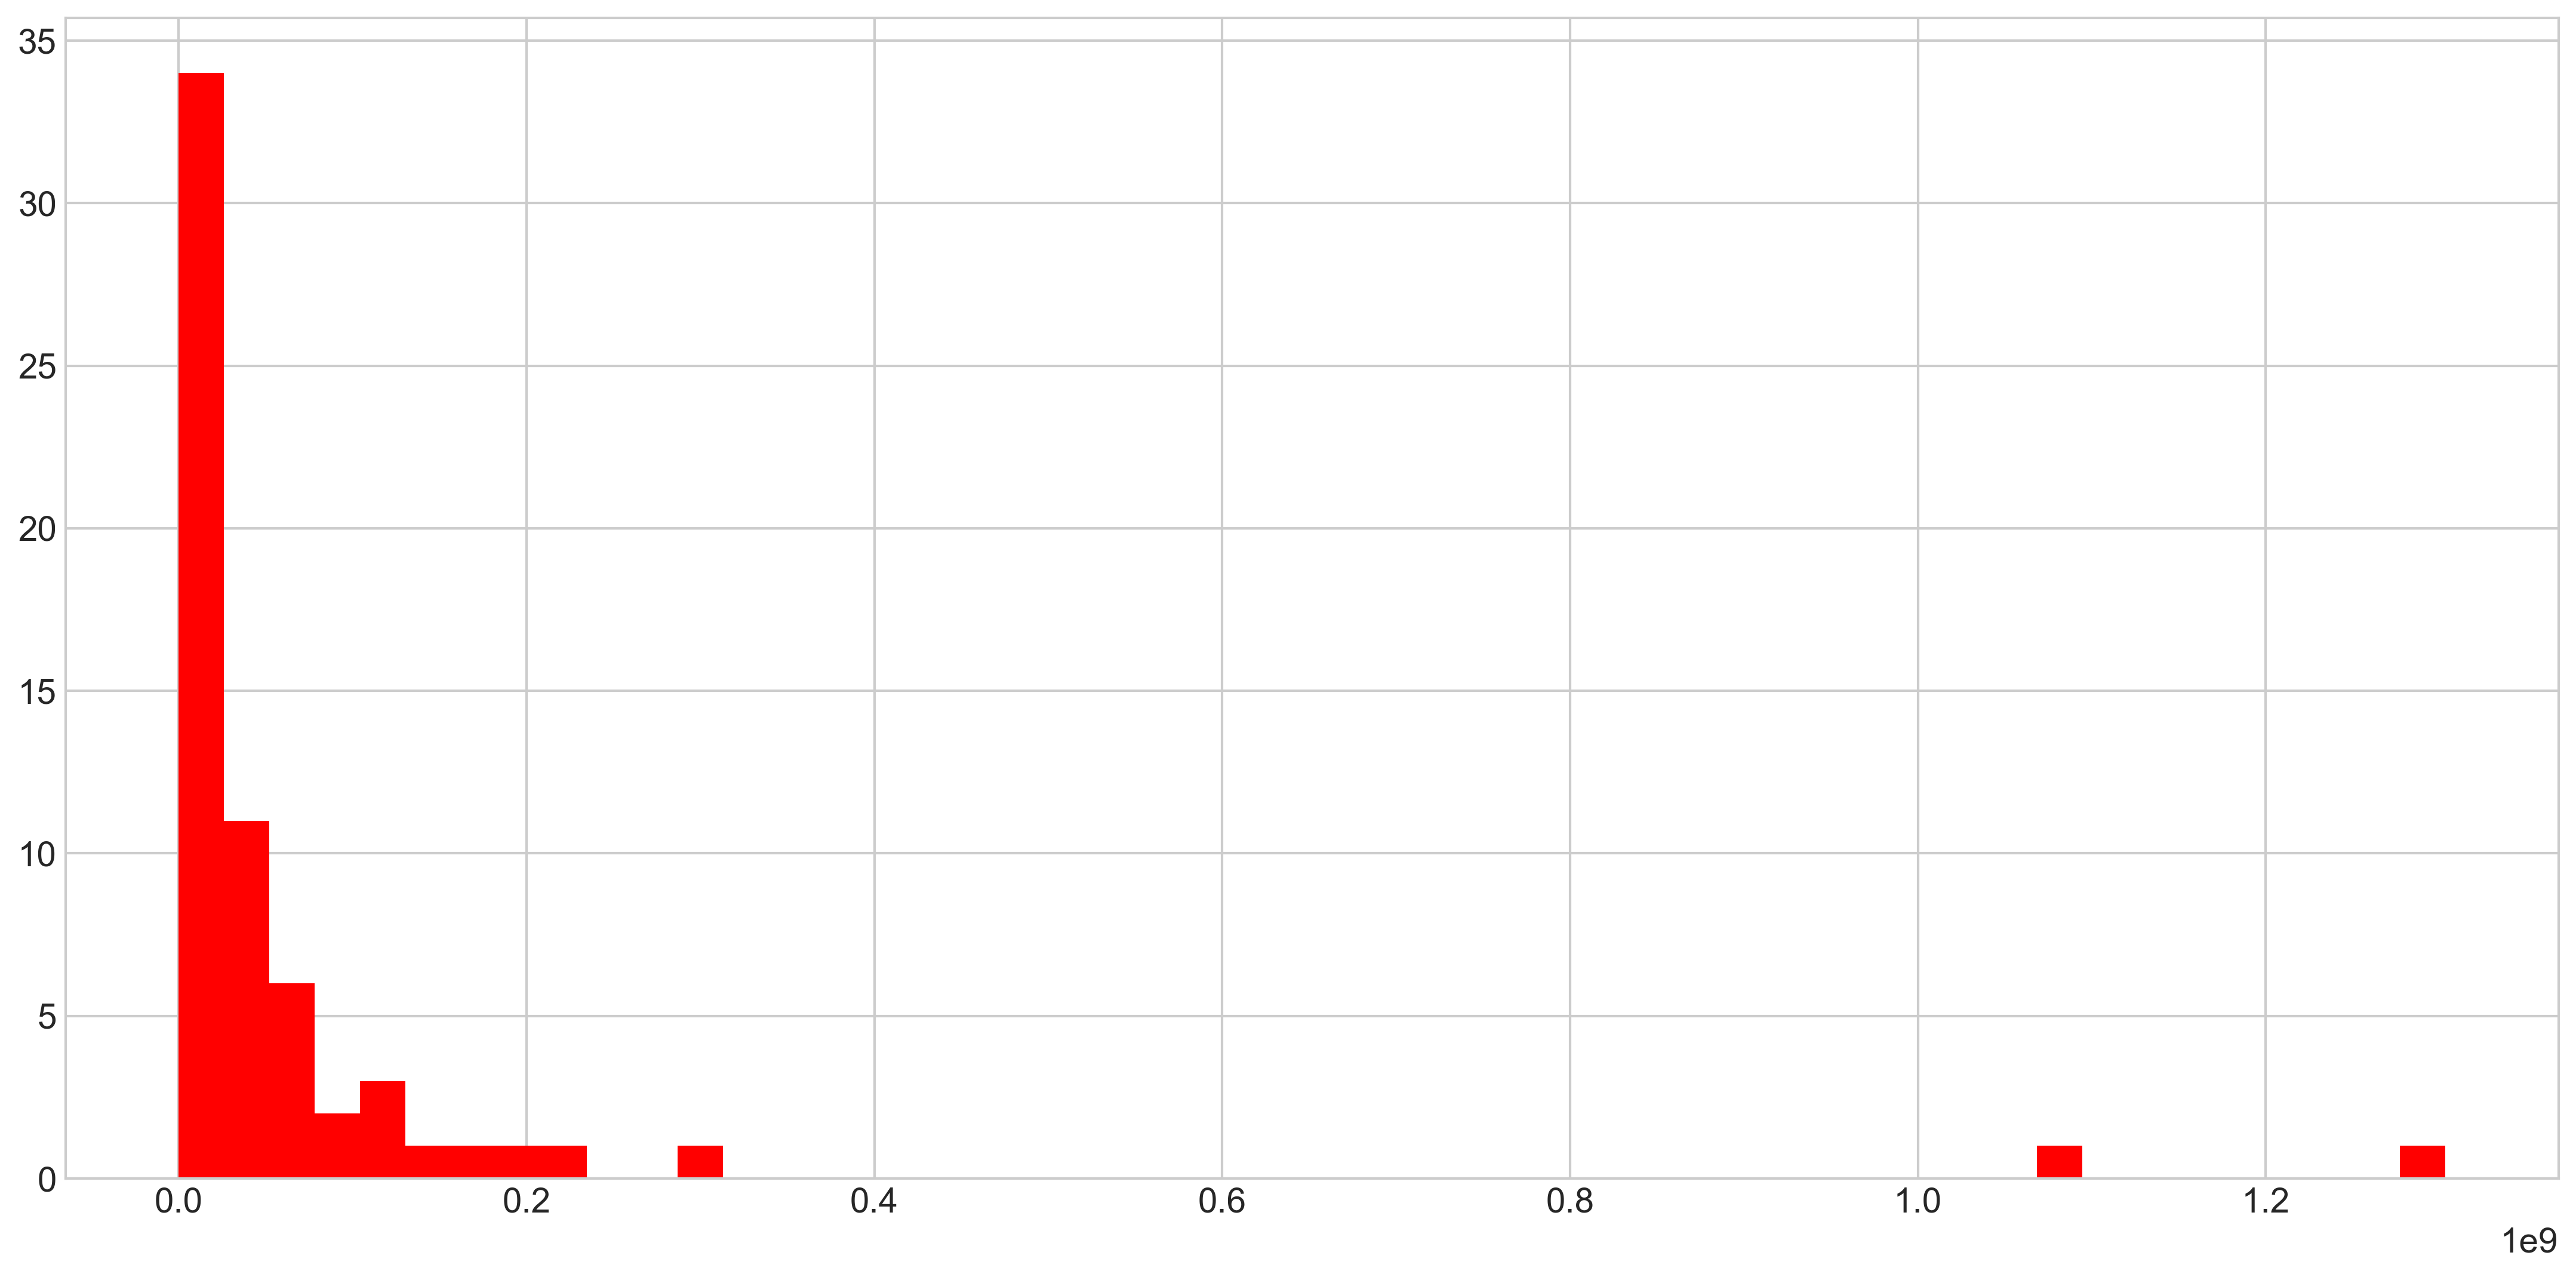

In [16]:
plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(16,8), dpi=300)
plt.hist(data[data['year']==2005]['pop'], 
         bins=50,
         color='red'); # Changes the color of the bars to red

### Scatterplots

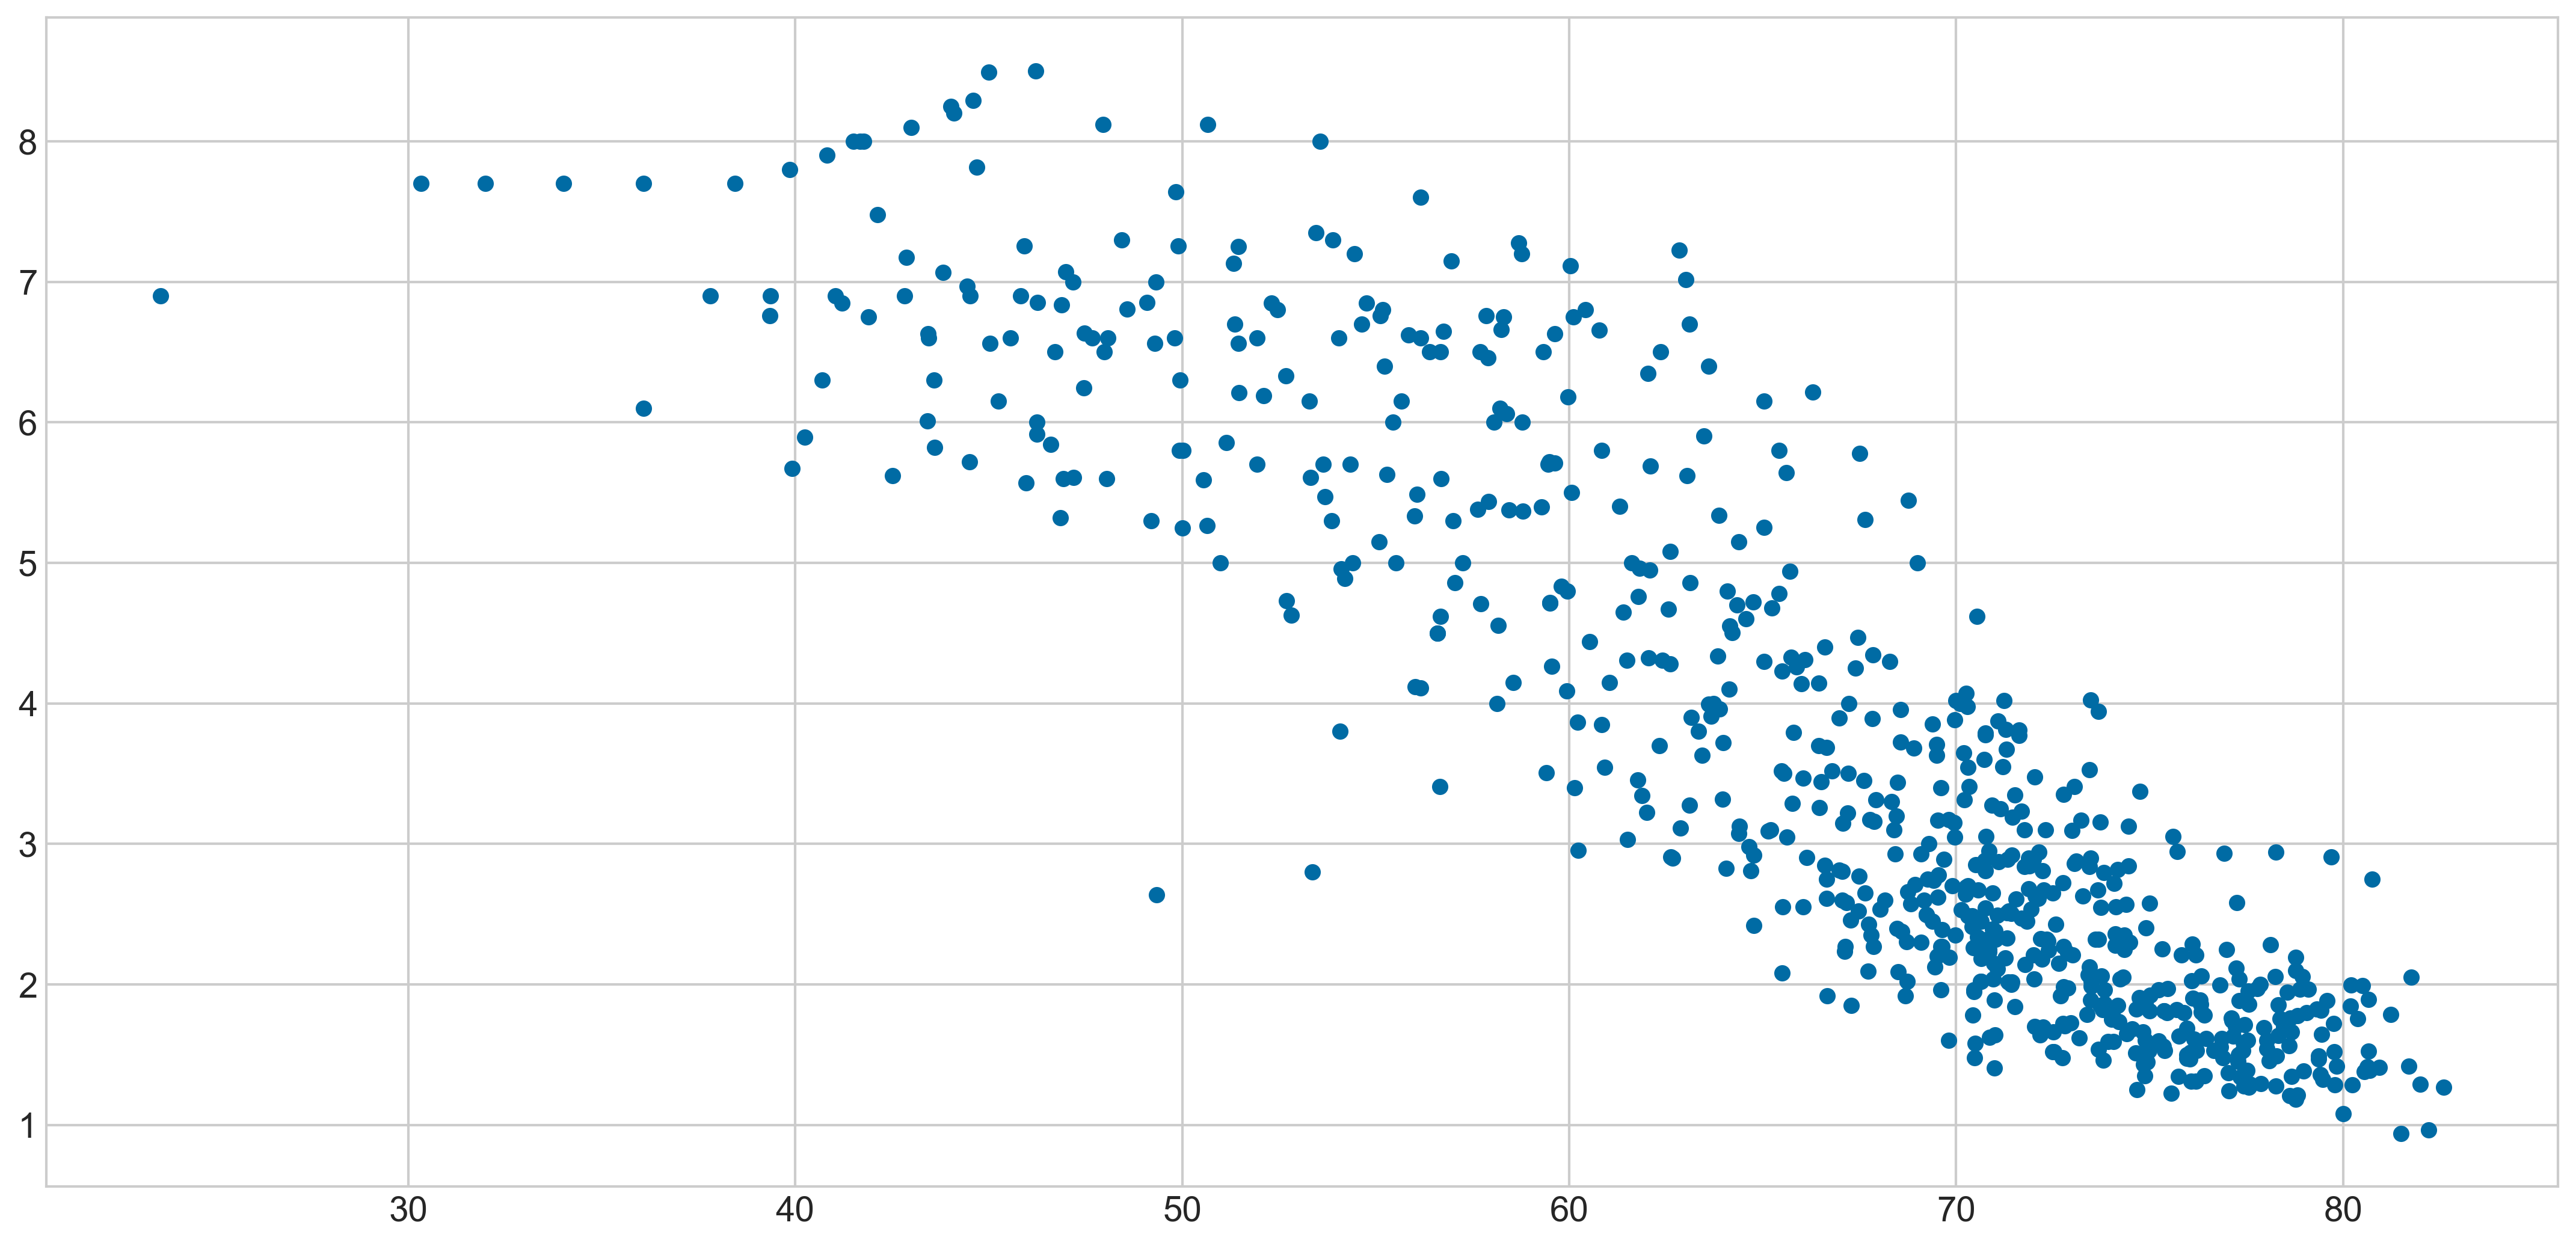

In [17]:
# Generic Scatterplot
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(16,8), dpi=300)
plt.scatter(x=data['life_expect'], # Select variable for x axis
            y=data['fertility']); # Select variable for y axis

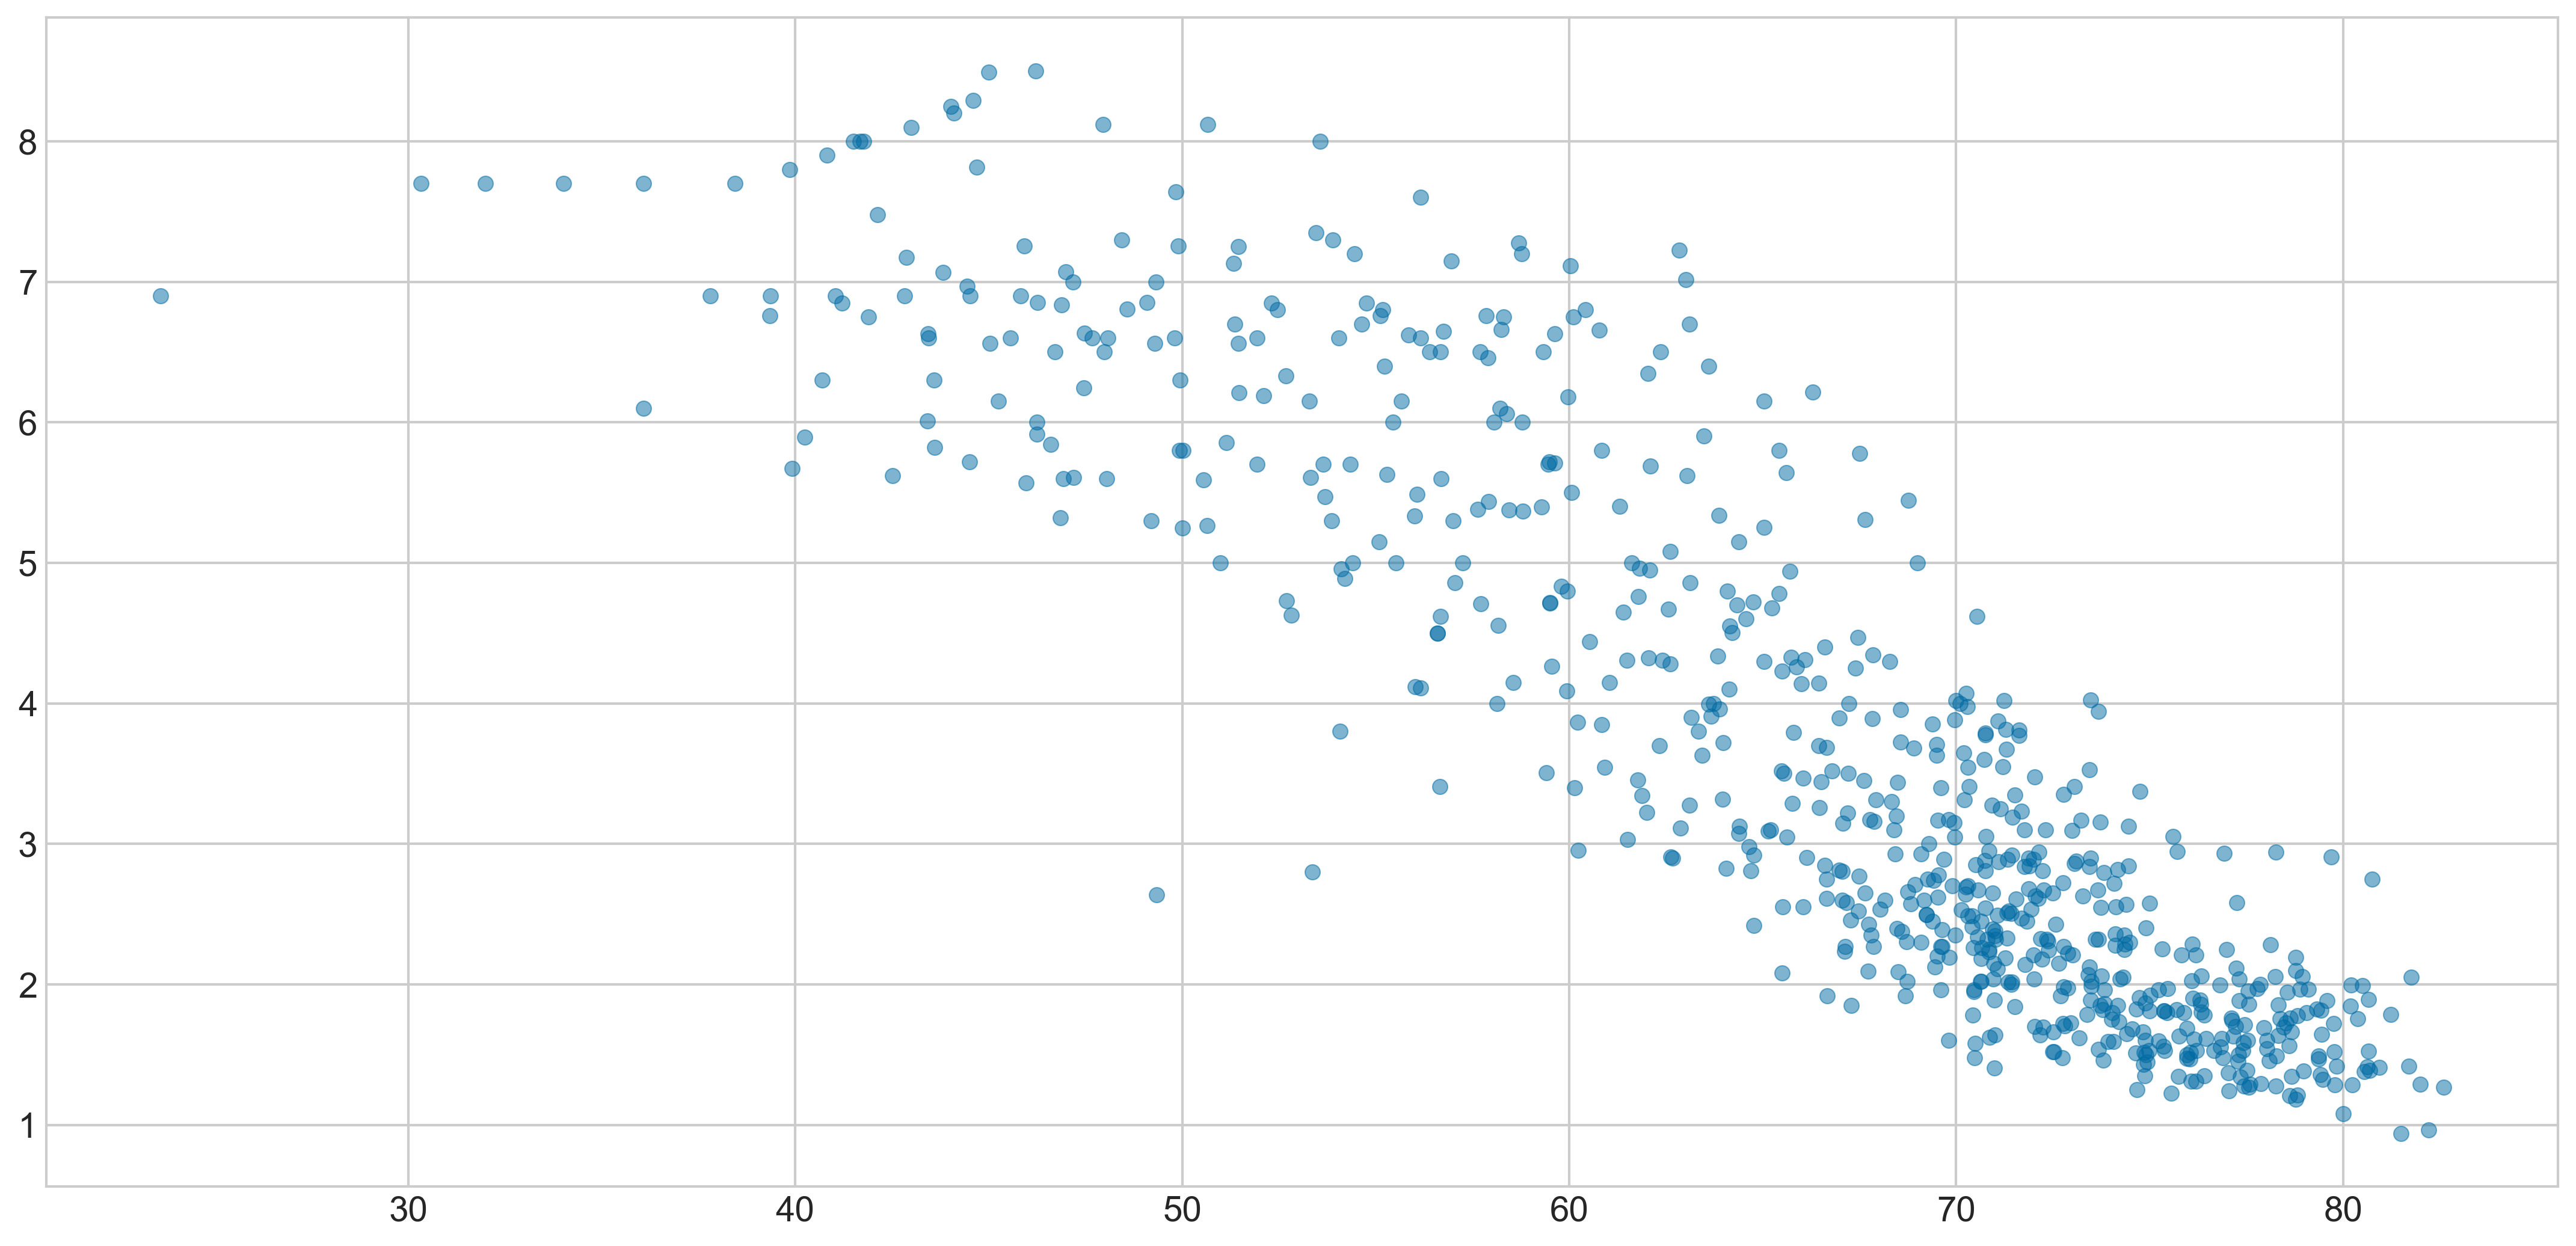

In [18]:
# Scatterplot with Transparency
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(16,8), dpi=300)
plt.scatter(x=data['life_expect'],
            y=data['fertility'],
            alpha=0.5); # Change point transparency

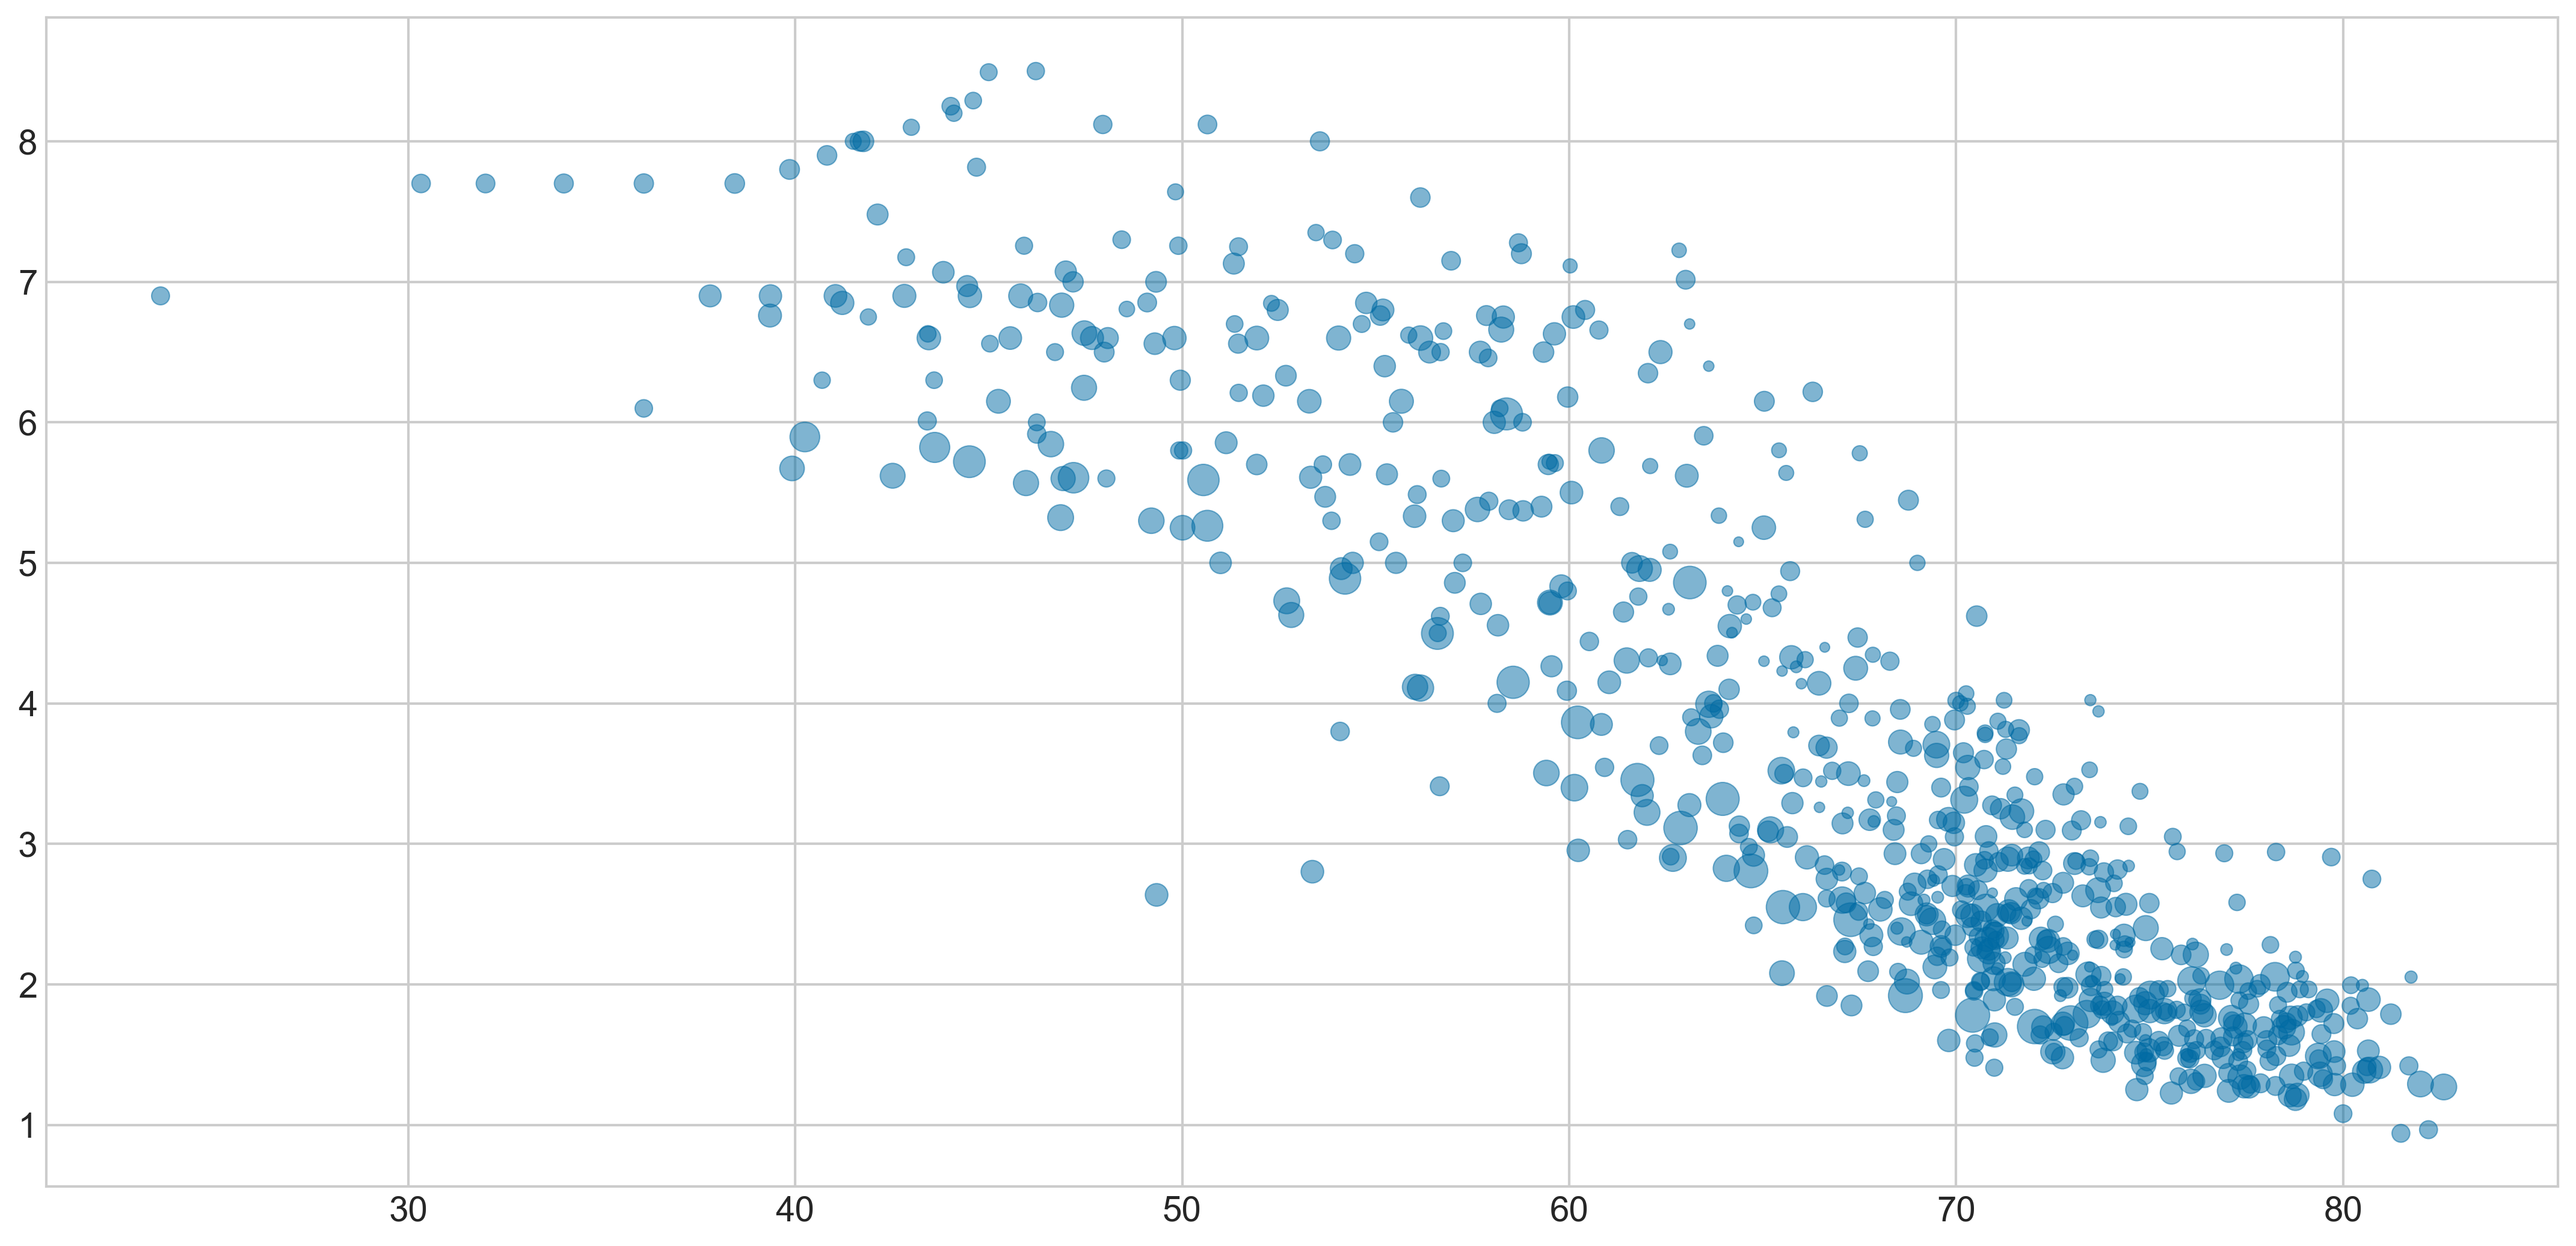

In [19]:
# Bubble with Transparency
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(16,8), dpi=300)
plt.scatter(x=data['life_expect'],
            y=data['fertility'], 
            alpha=0.5,
            s=data['pop']**(1/4)); # Change point size

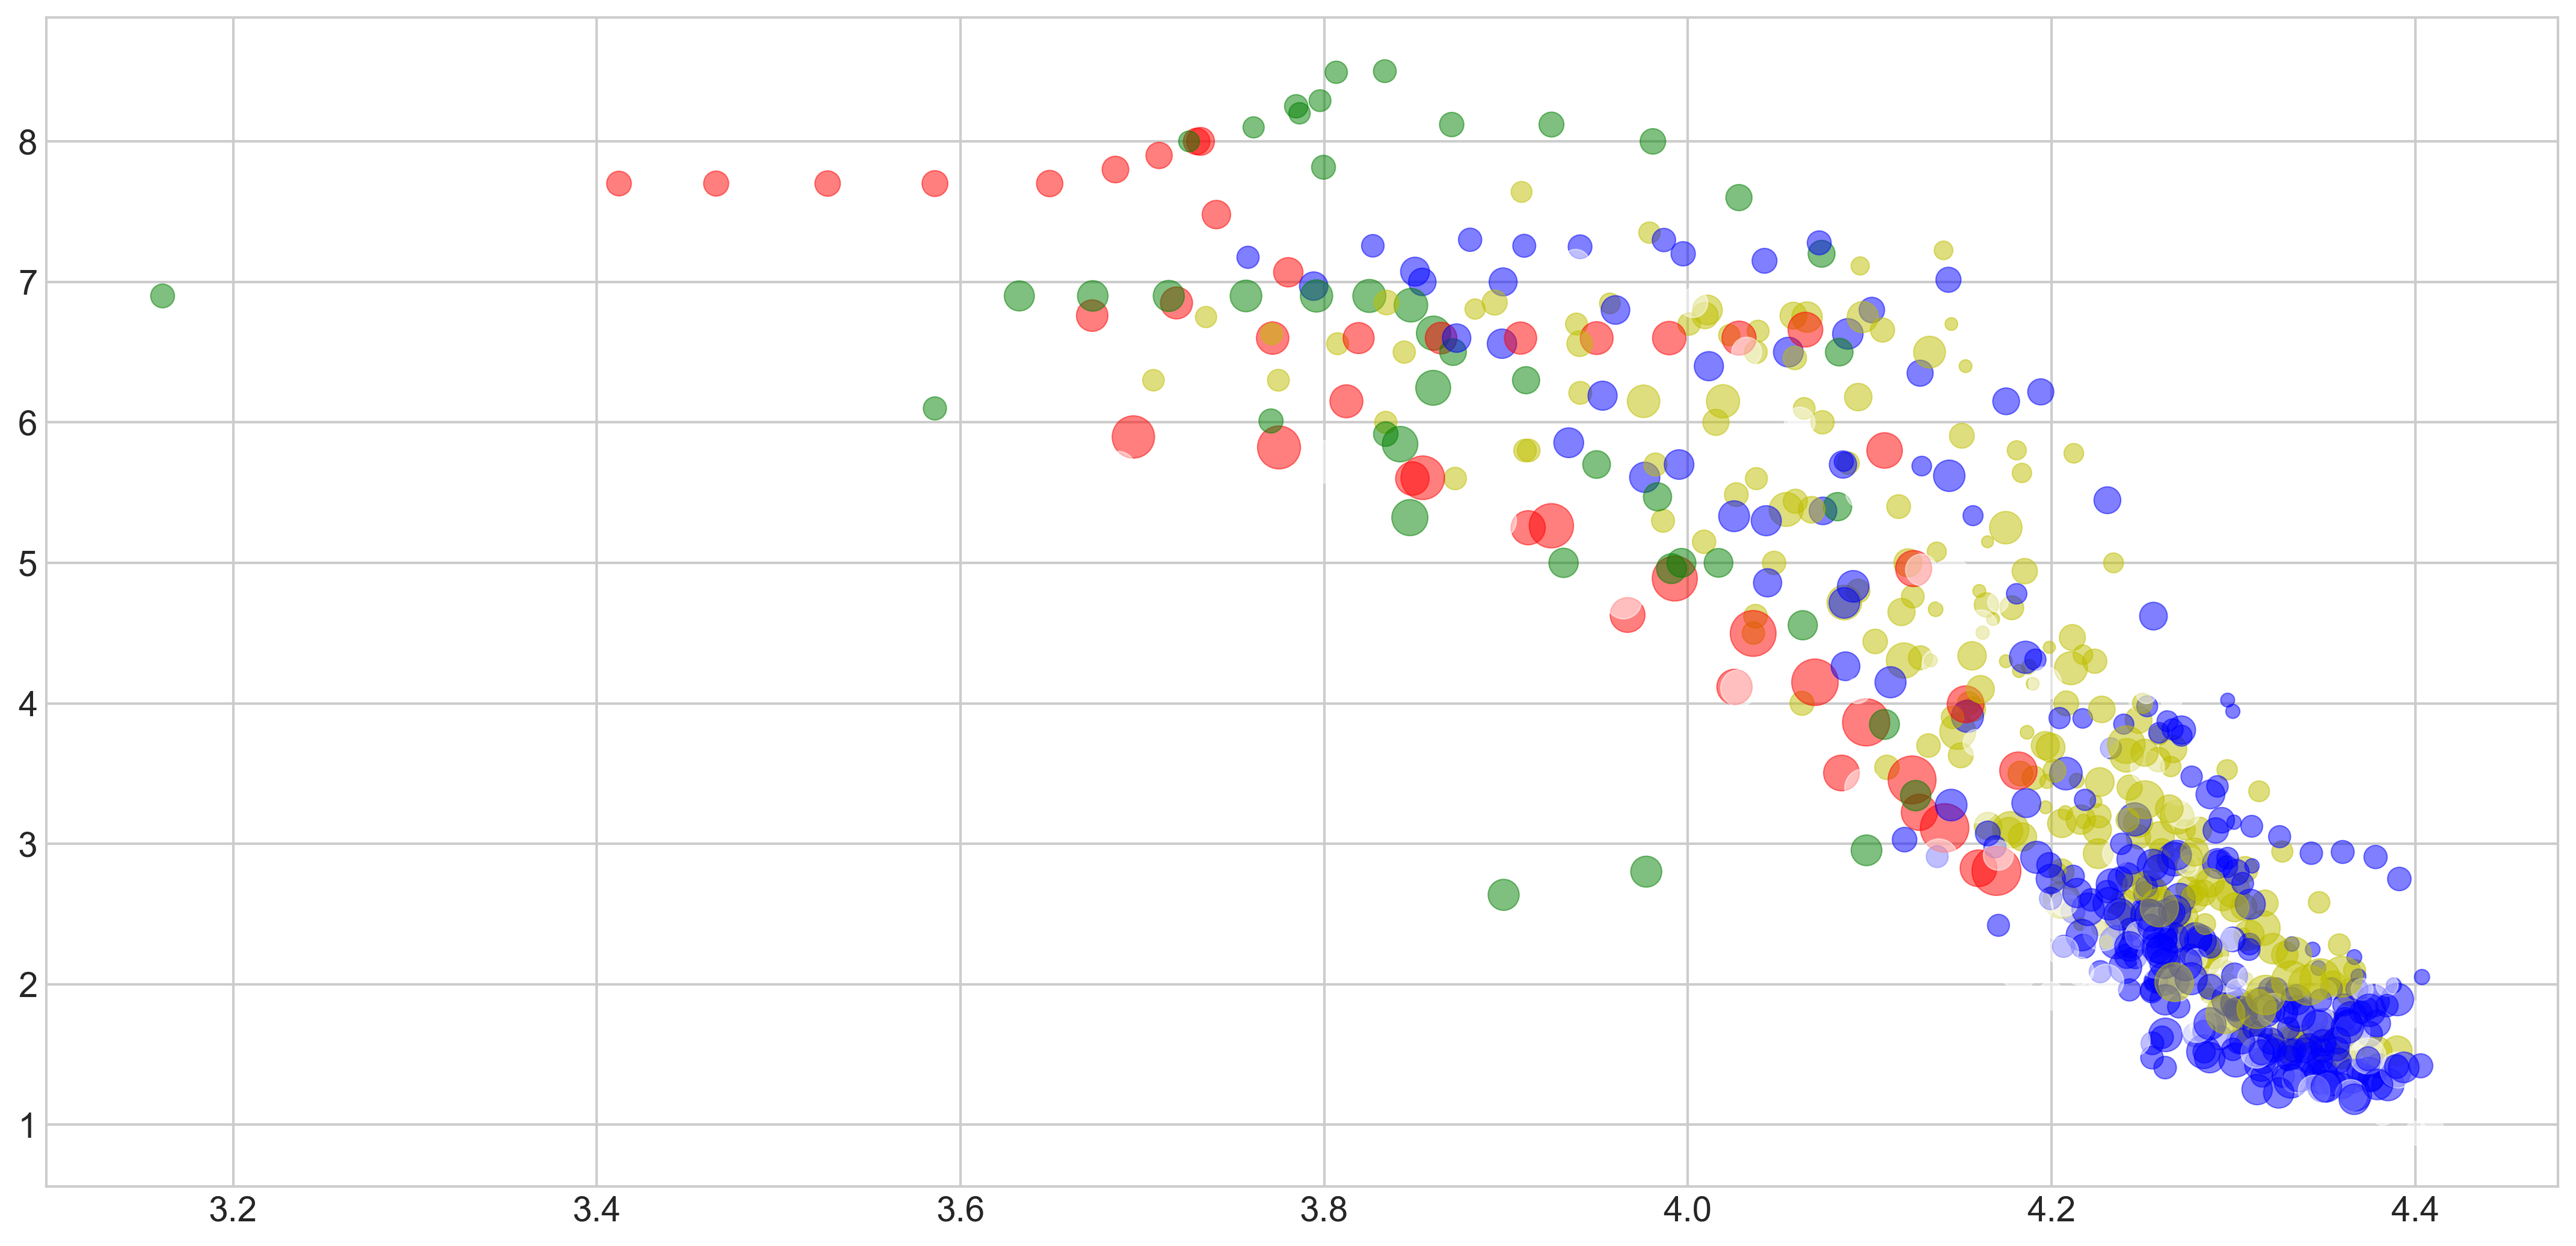

In [20]:
# Bubble with Transparency & Color

# Defining colors for each cluster
color_dict = {0:'r',
              1:'b',
              2:'g',
              3:'y',
              4:'w',
              5:'b'}

# Assigning colors to each cluster
data['cluster_color'] = [color_dict[x] for x in data['cluster']]

# Creating plot
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(16,8), dpi=300)
plt.scatter(x=np.log(data['life_expect']),
            y=data['fertility'], 
            alpha=0.5,
            s=data['pop']**(1/3.5),
            c=data['cluster_color']); # Assigns colors to points

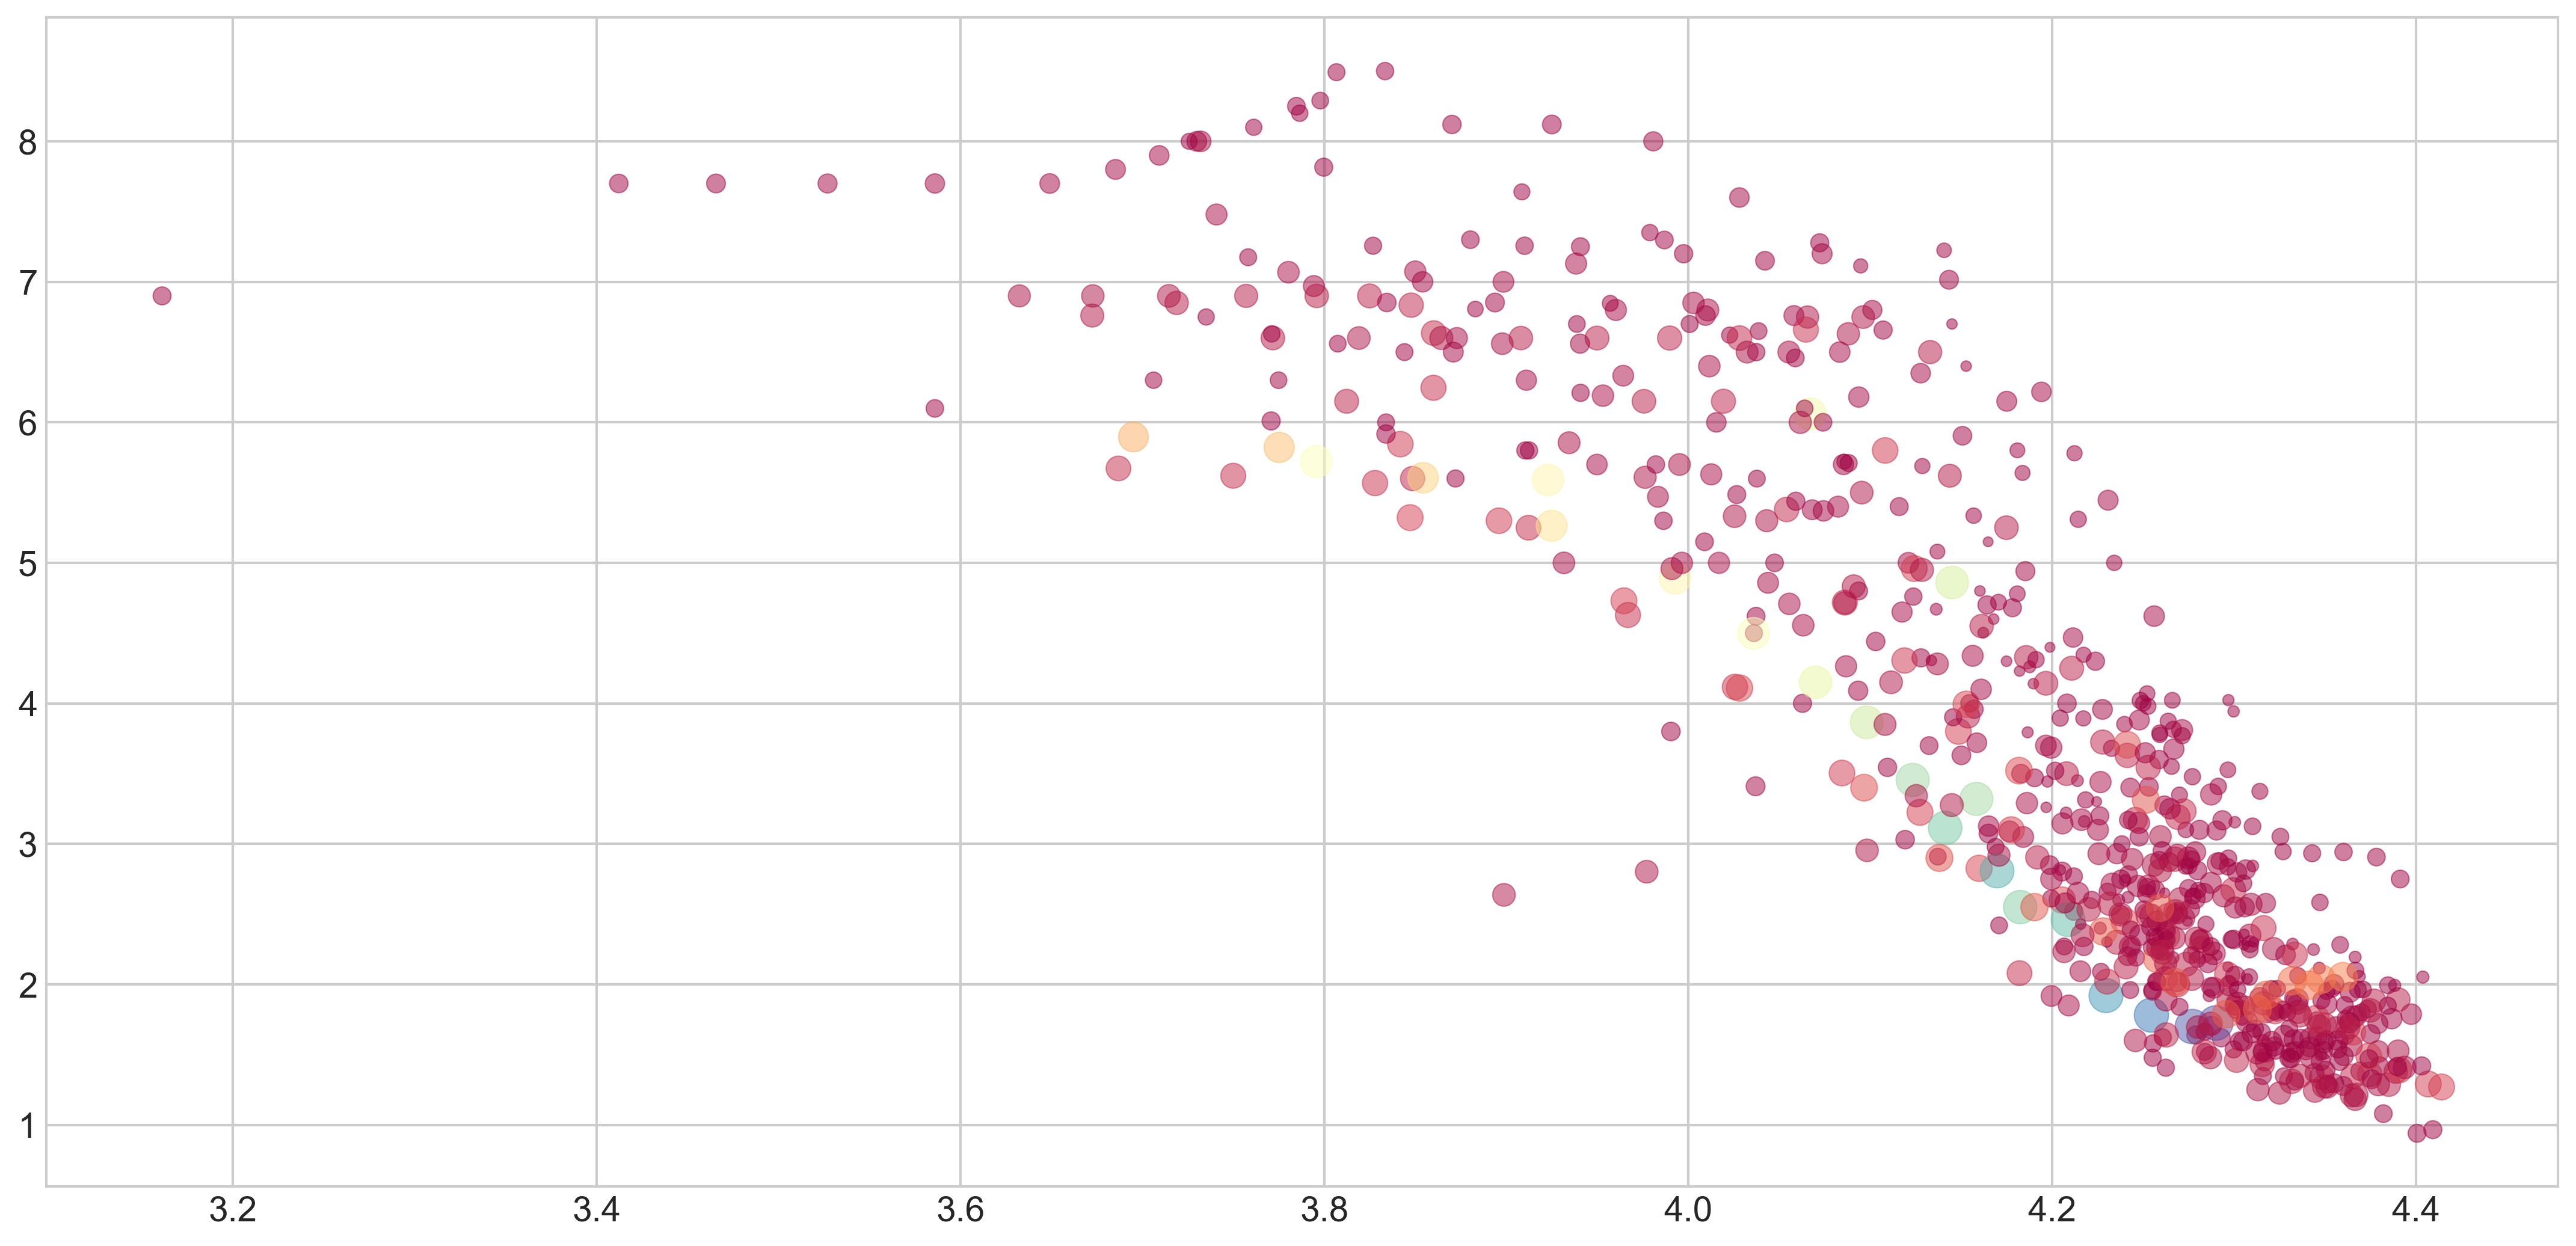

In [21]:
# Bubble with Transparency & Color

# Defining colors for each cluster
color_dict = {0:'r',
              1:'b',
              2:'g',
              3:'y',
              4:'w',
              5:'b'}

# Assigning colors to each cluster
data['cluster_color'] = [color_dict[x] for x in data['cluster']]

# Creating plot
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(16,8), dpi=300)
plt.scatter(x=np.log(data['life_expect']),
            y=data['fertility'], 
            alpha=0.5,
            s=data['pop']**(1/4),
            c = data['pop'],
            cmap='Spectral'); # Assign colors using cmap

# List of all example cmap values here: https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

### Hexbin Plots

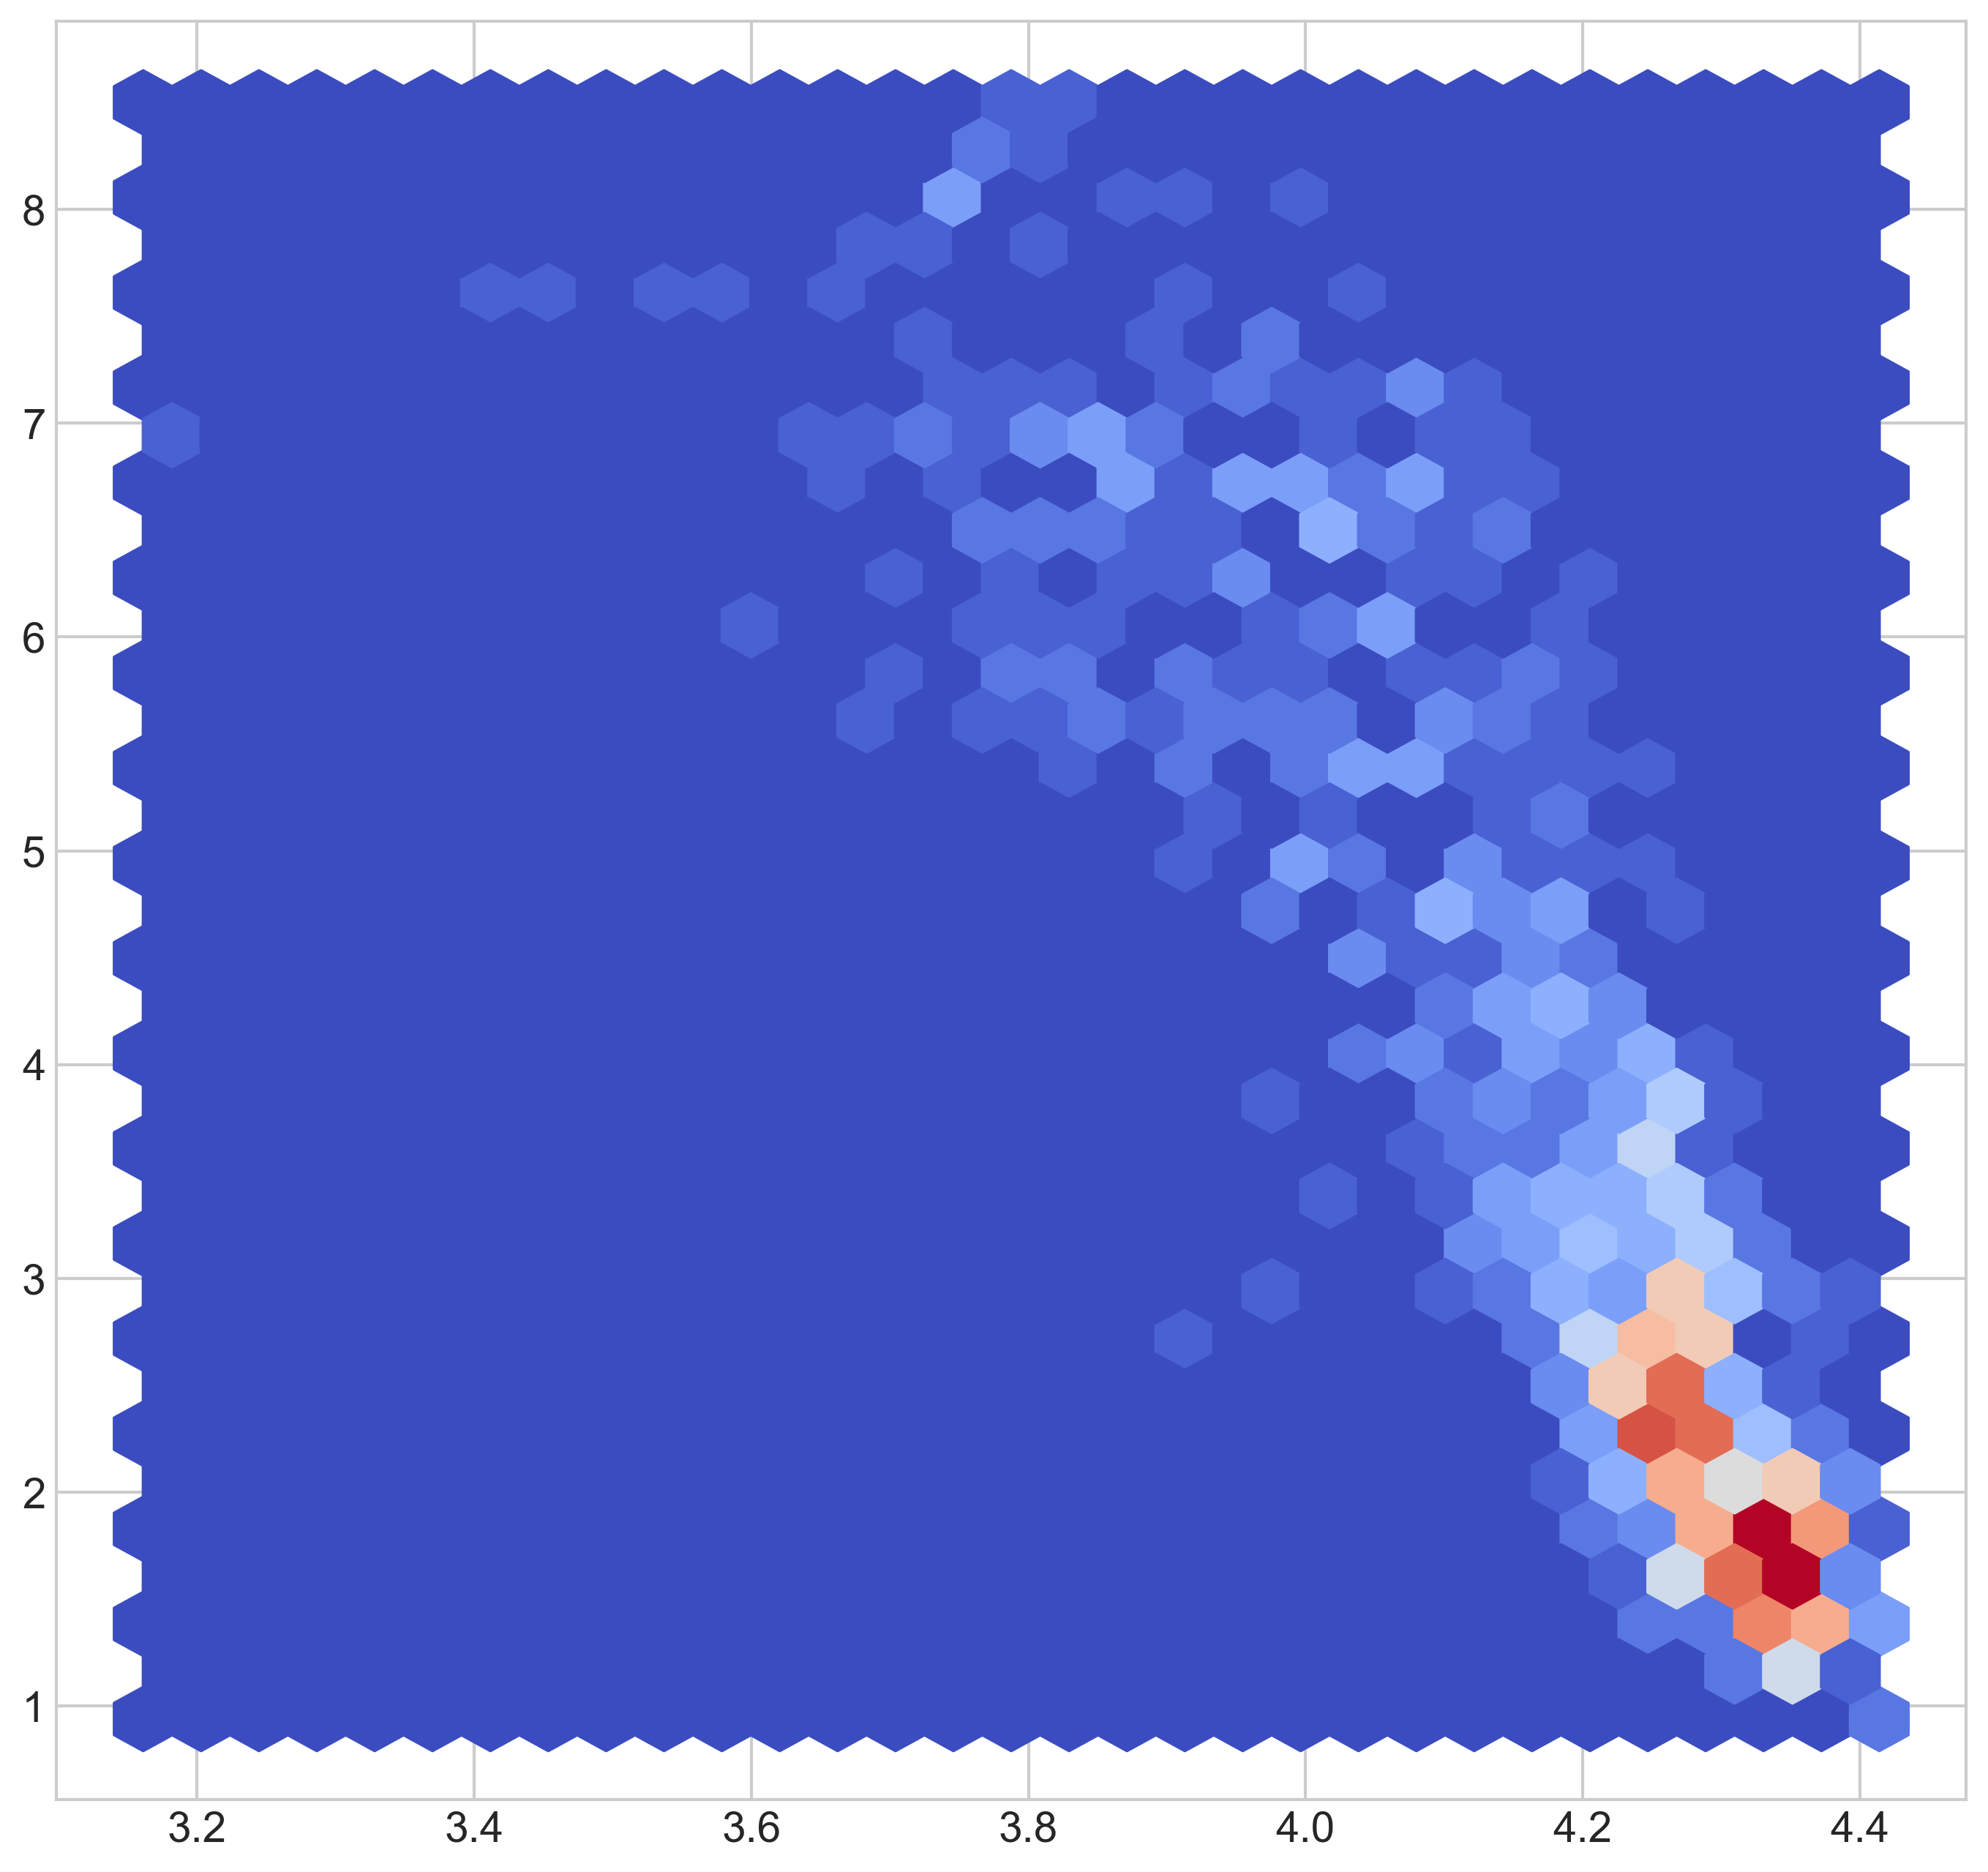

In [22]:
# Creating plot
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,10), dpi=300)
plt.hexbin(x=np.log(data['life_expect']),
           y=data['fertility'],
           gridsize=30, # Specify grid size (lower numbers produces larger cells)
           cmap='coolwarm'); # Specify colormap

### Line chart

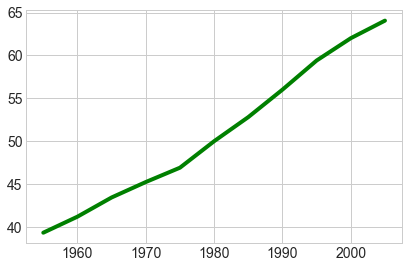

In [23]:
# Reading in & subsetting data
data = datasets.gapminder()
data = data[data['country']=='Bangladesh']

# Defining plot
plt.plot(data['year'], data['life_expect'], color='green');

# Layering Plots

### Line charts

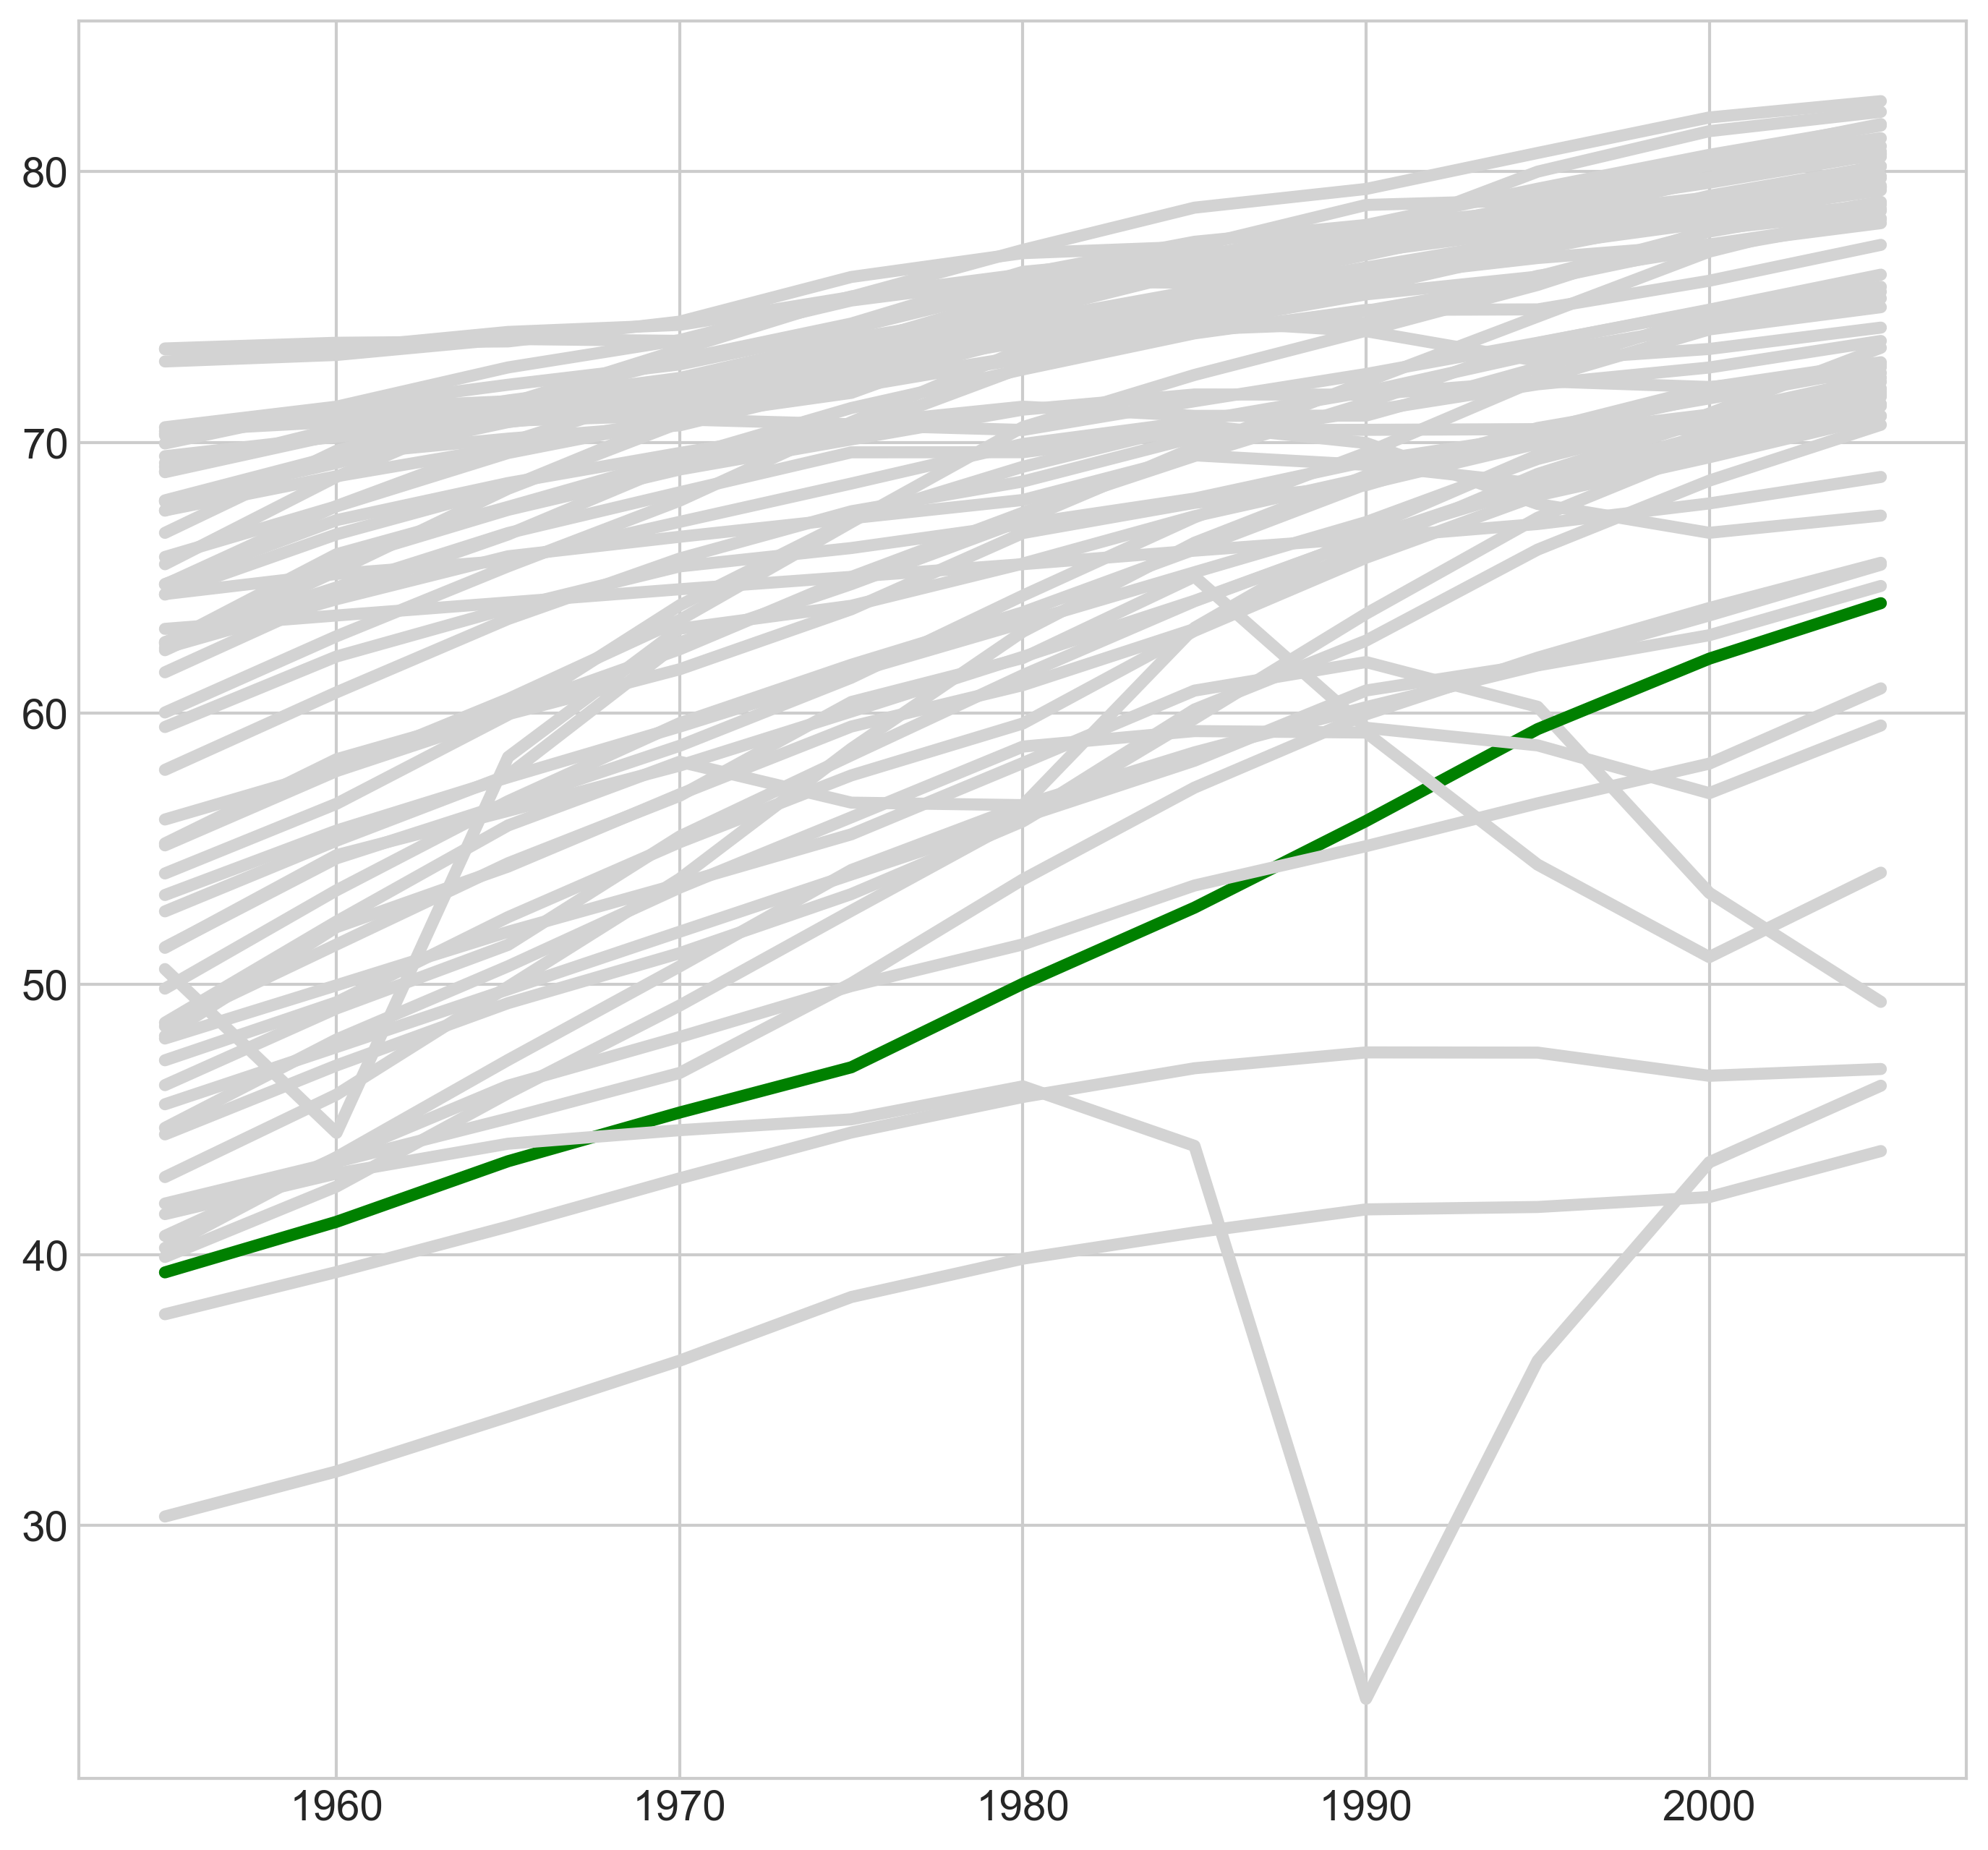

In [24]:
# Read in data
data = datasets.gapminder()

# Extract list of countries in our dataset
country_list = list(set(data['country']))

# Define plot characteristics
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,10), dpi=300)

# Create a for loop to plot multiple lines on top of each other
for c in country_list:
        
    if c =='Bangladesh':
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['life_expect'], color='green');

    else:
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['life_expect'], color='lightgrey');

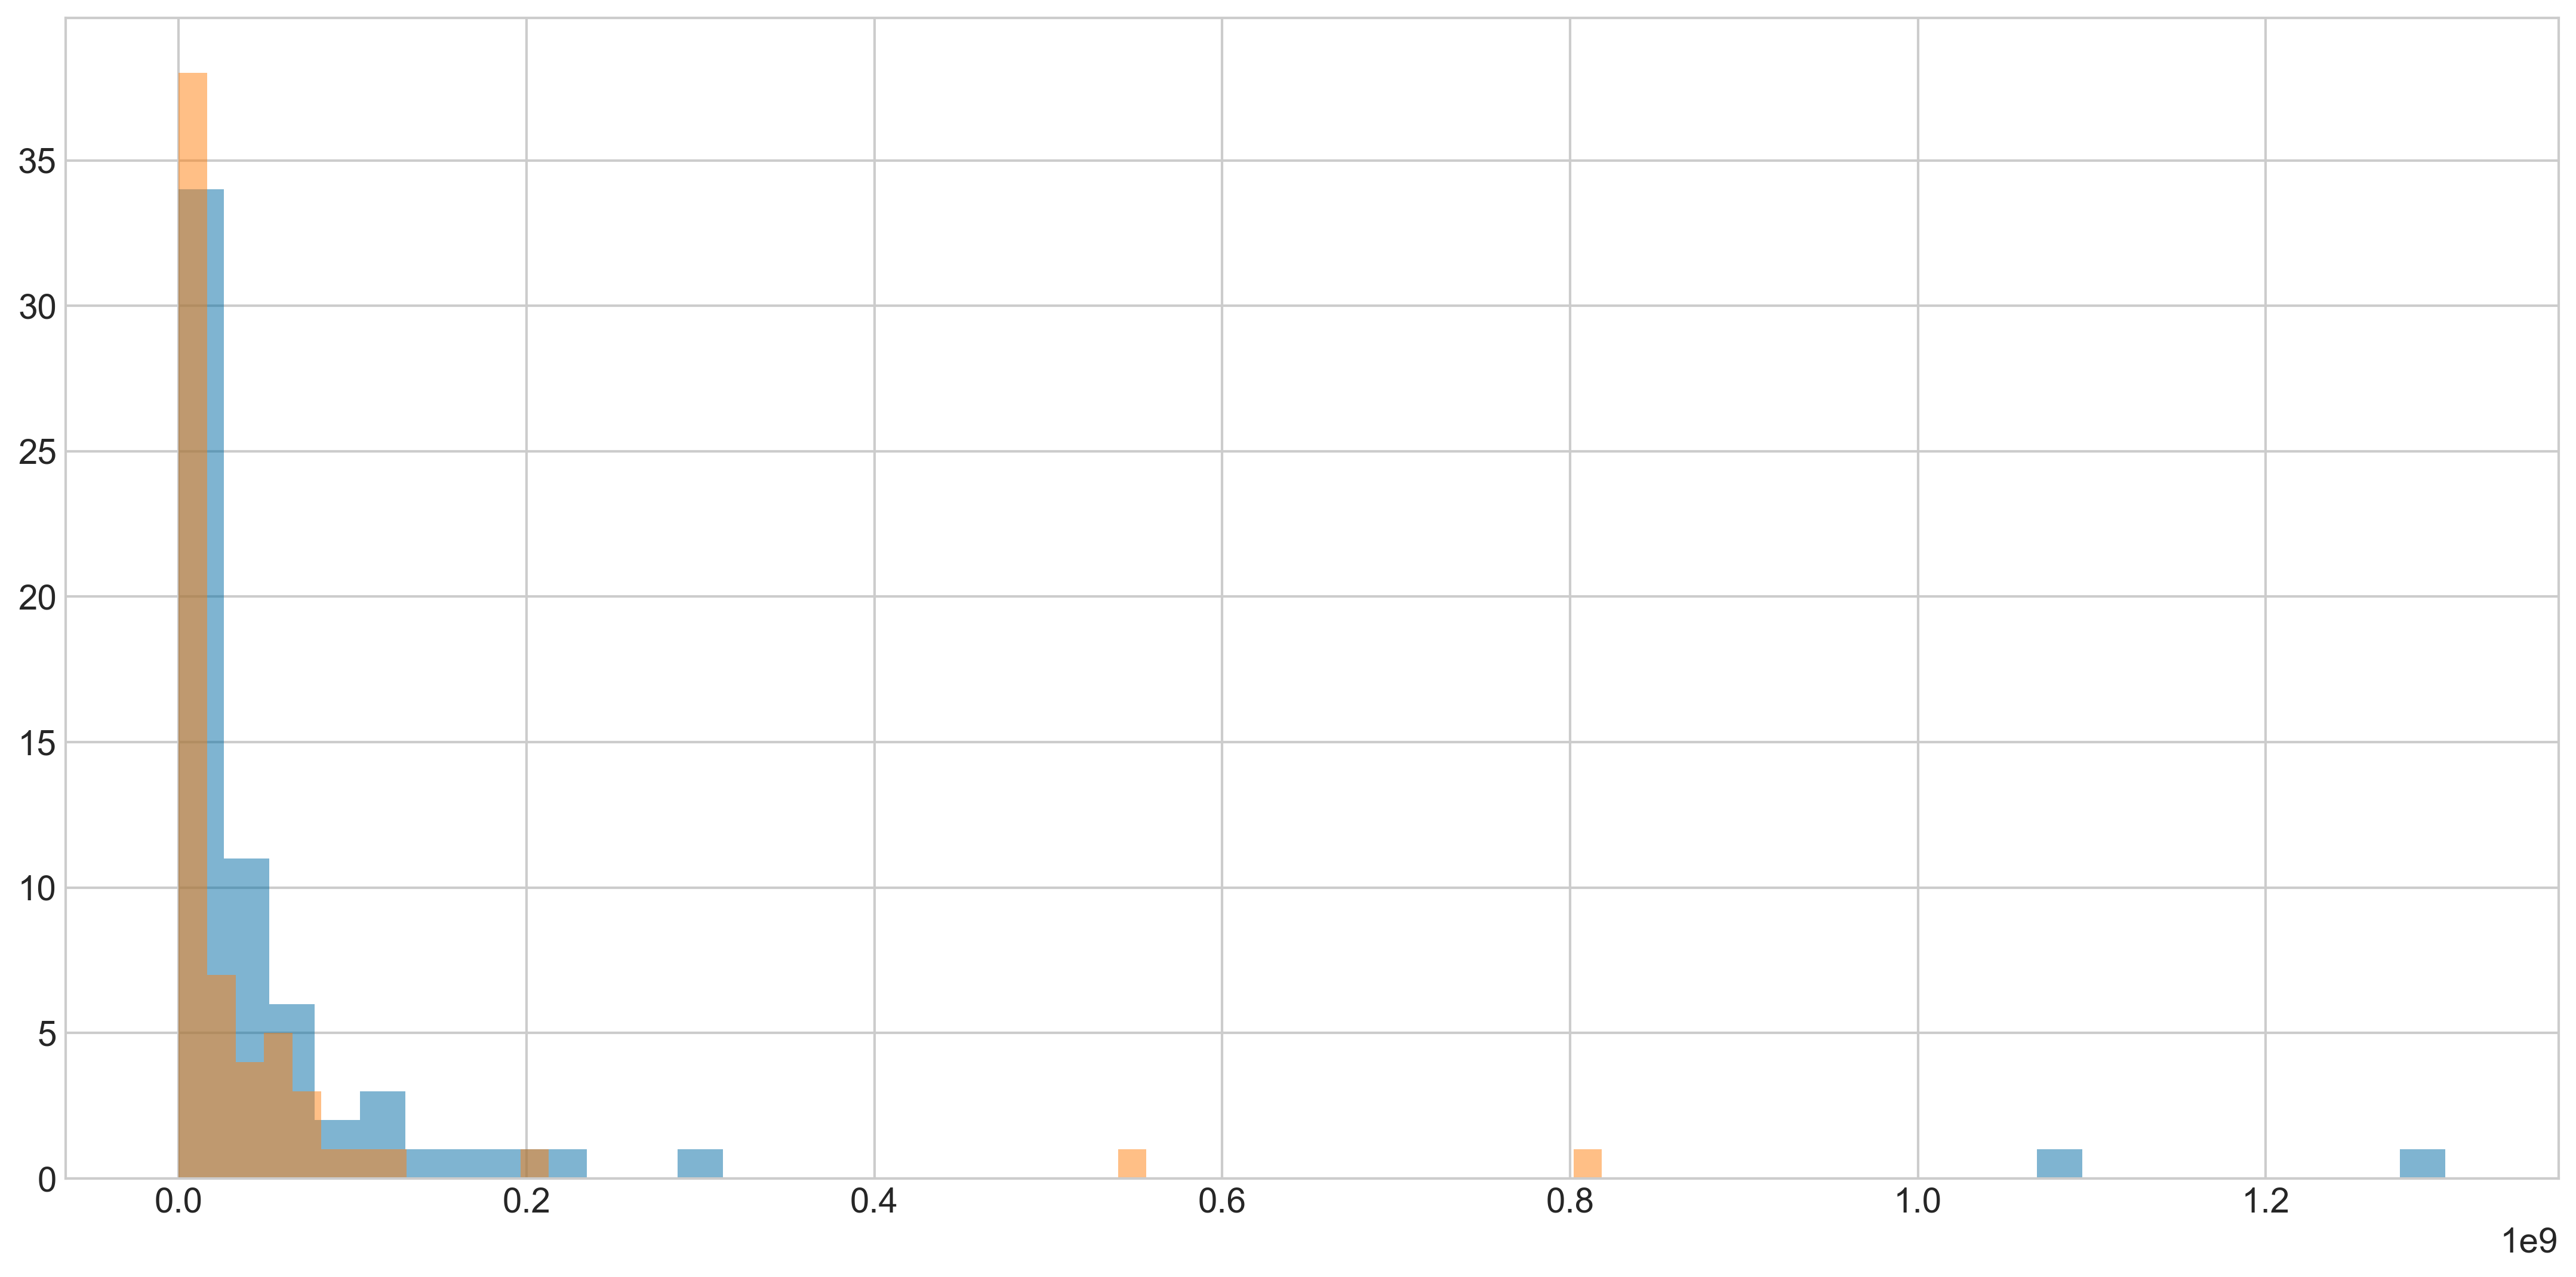

In [25]:
# Read in data
data = datasets.gapminder()

# Define plot characteristics
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(16,8), dpi=300)

# Plot multiple histograms on top of each other
plt.hist(data[data['year']==2005]['pop'], alpha=0.5, bins=50)
plt.hist(data[data['year']==1970]['pop'], alpha=0.5, bins=50);

# Adding Labels & Legends
### Legends

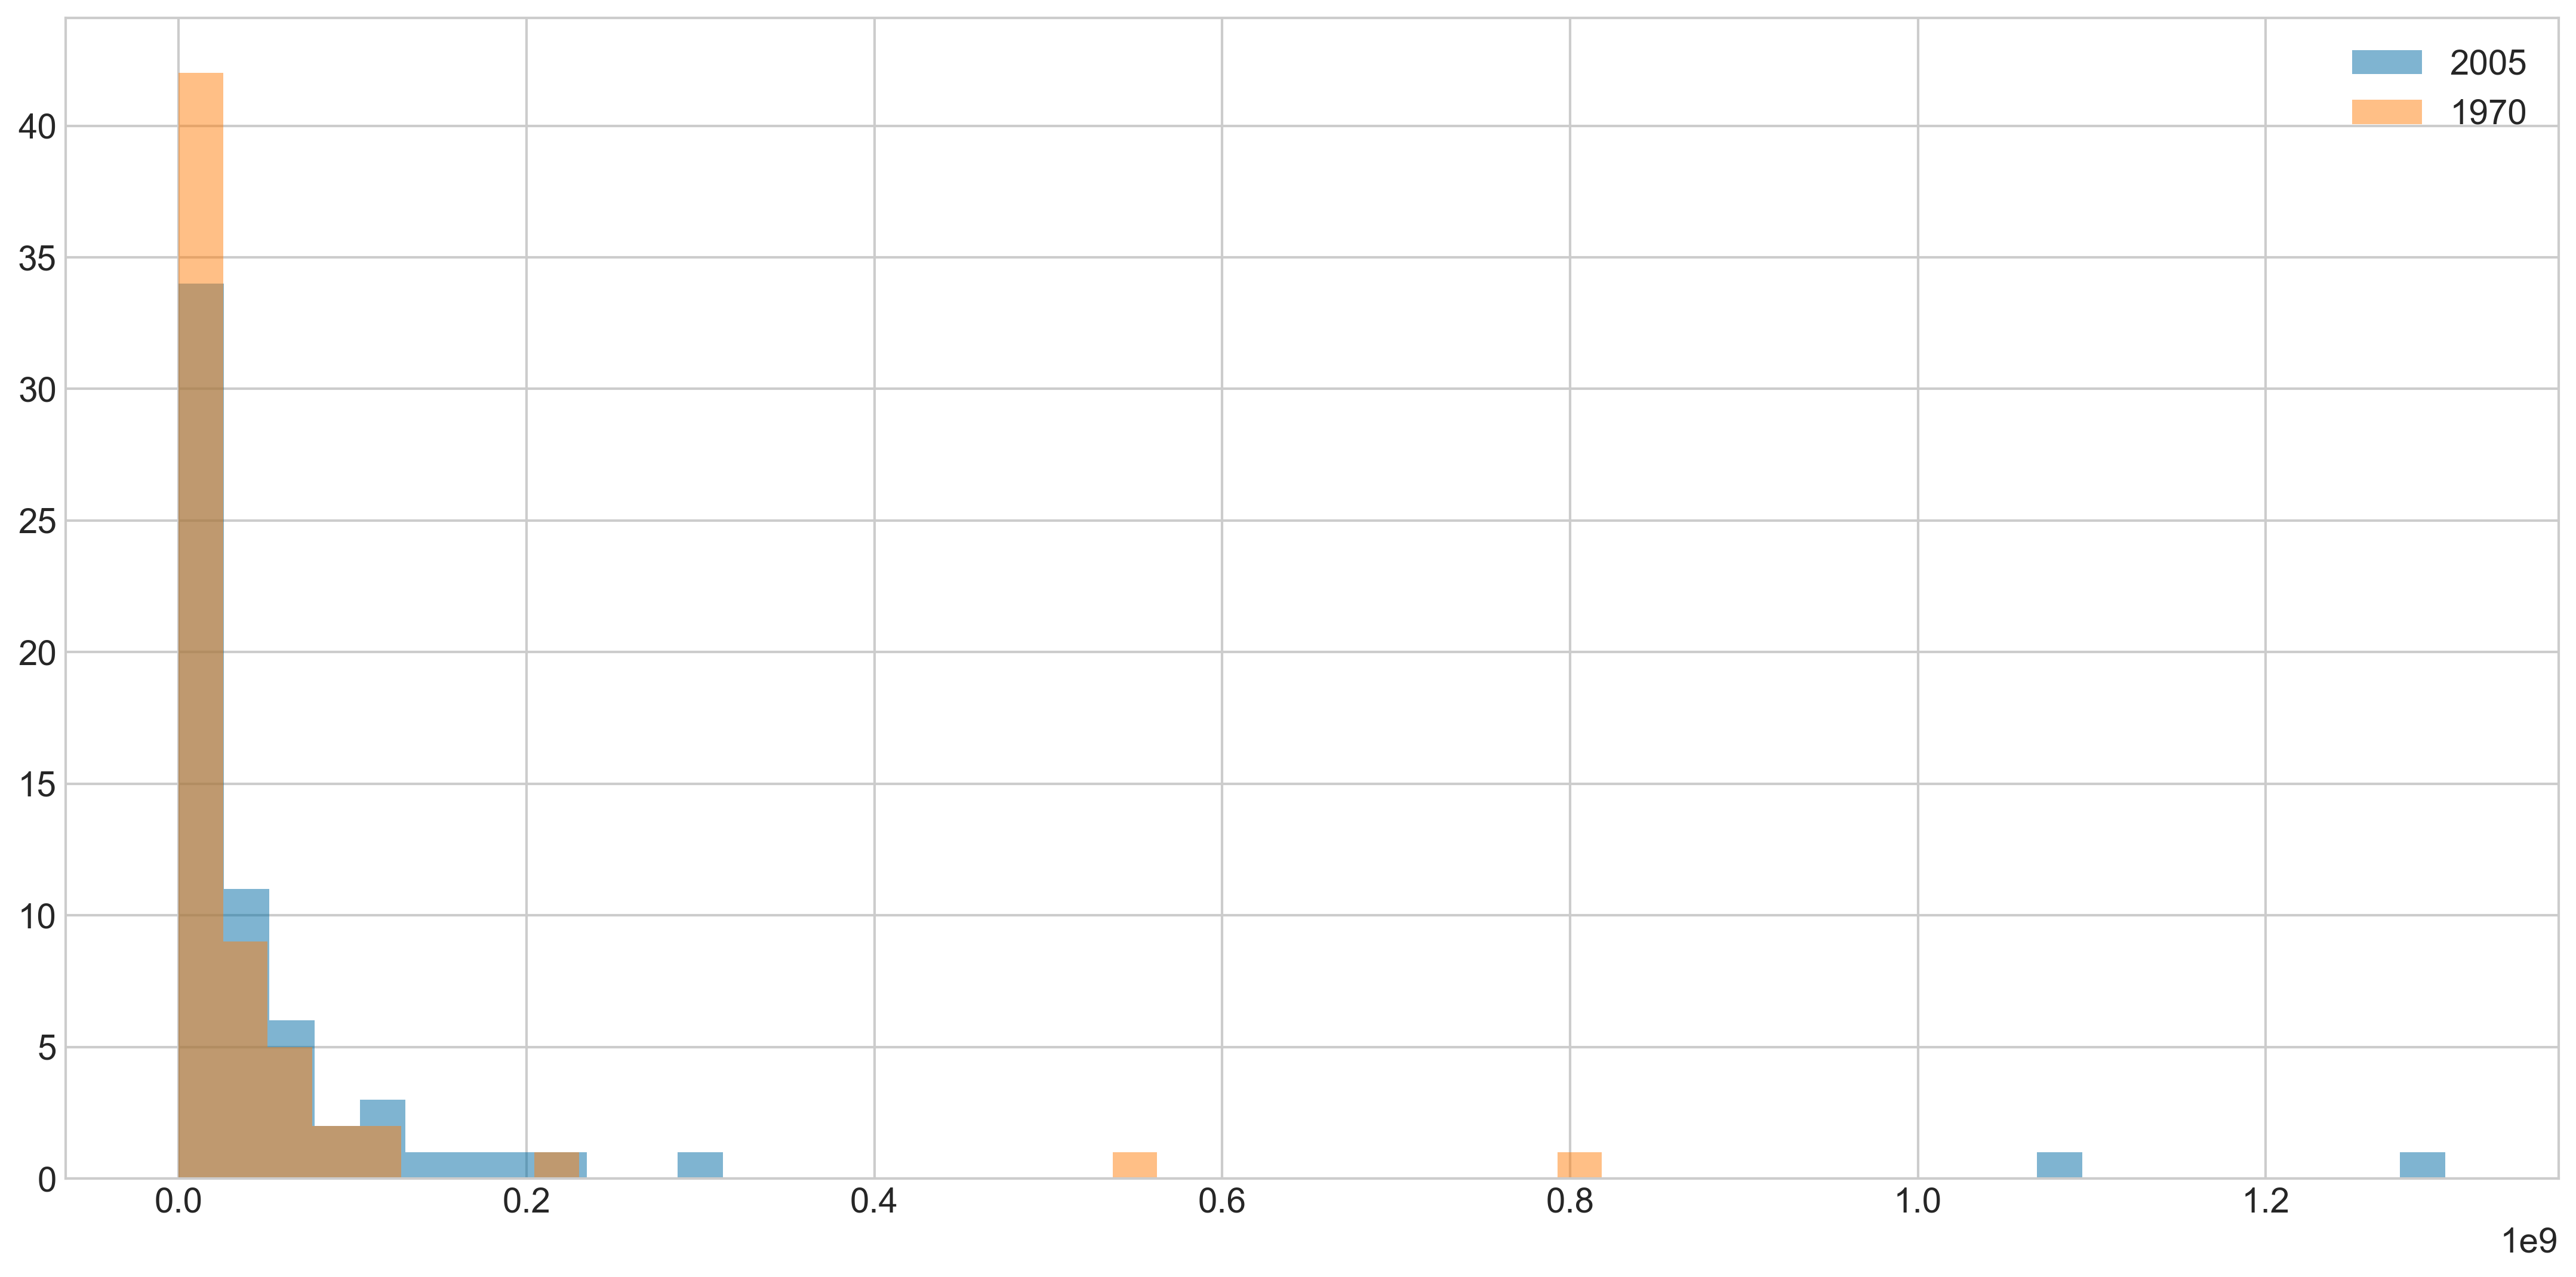

In [26]:
# Read in data
data = datasets.gapminder()

# Define plot characteristics
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(16,8), dpi=300)

# Plot multiple histograms on top of each other
plt.hist(data[data['year']==2005]['pop'], alpha=0.5, bins=50, label='2005'); # Assign legend label
plt.hist(data[data['year']==1970]['pop'], alpha=0.5, bins=32, label='1970'); # Assign legend label

plt.legend(); # Add in legend

Adding legends to plots can be more difficult depending on your input data. Recommend you check out this notebook for reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

### Titles & Labels

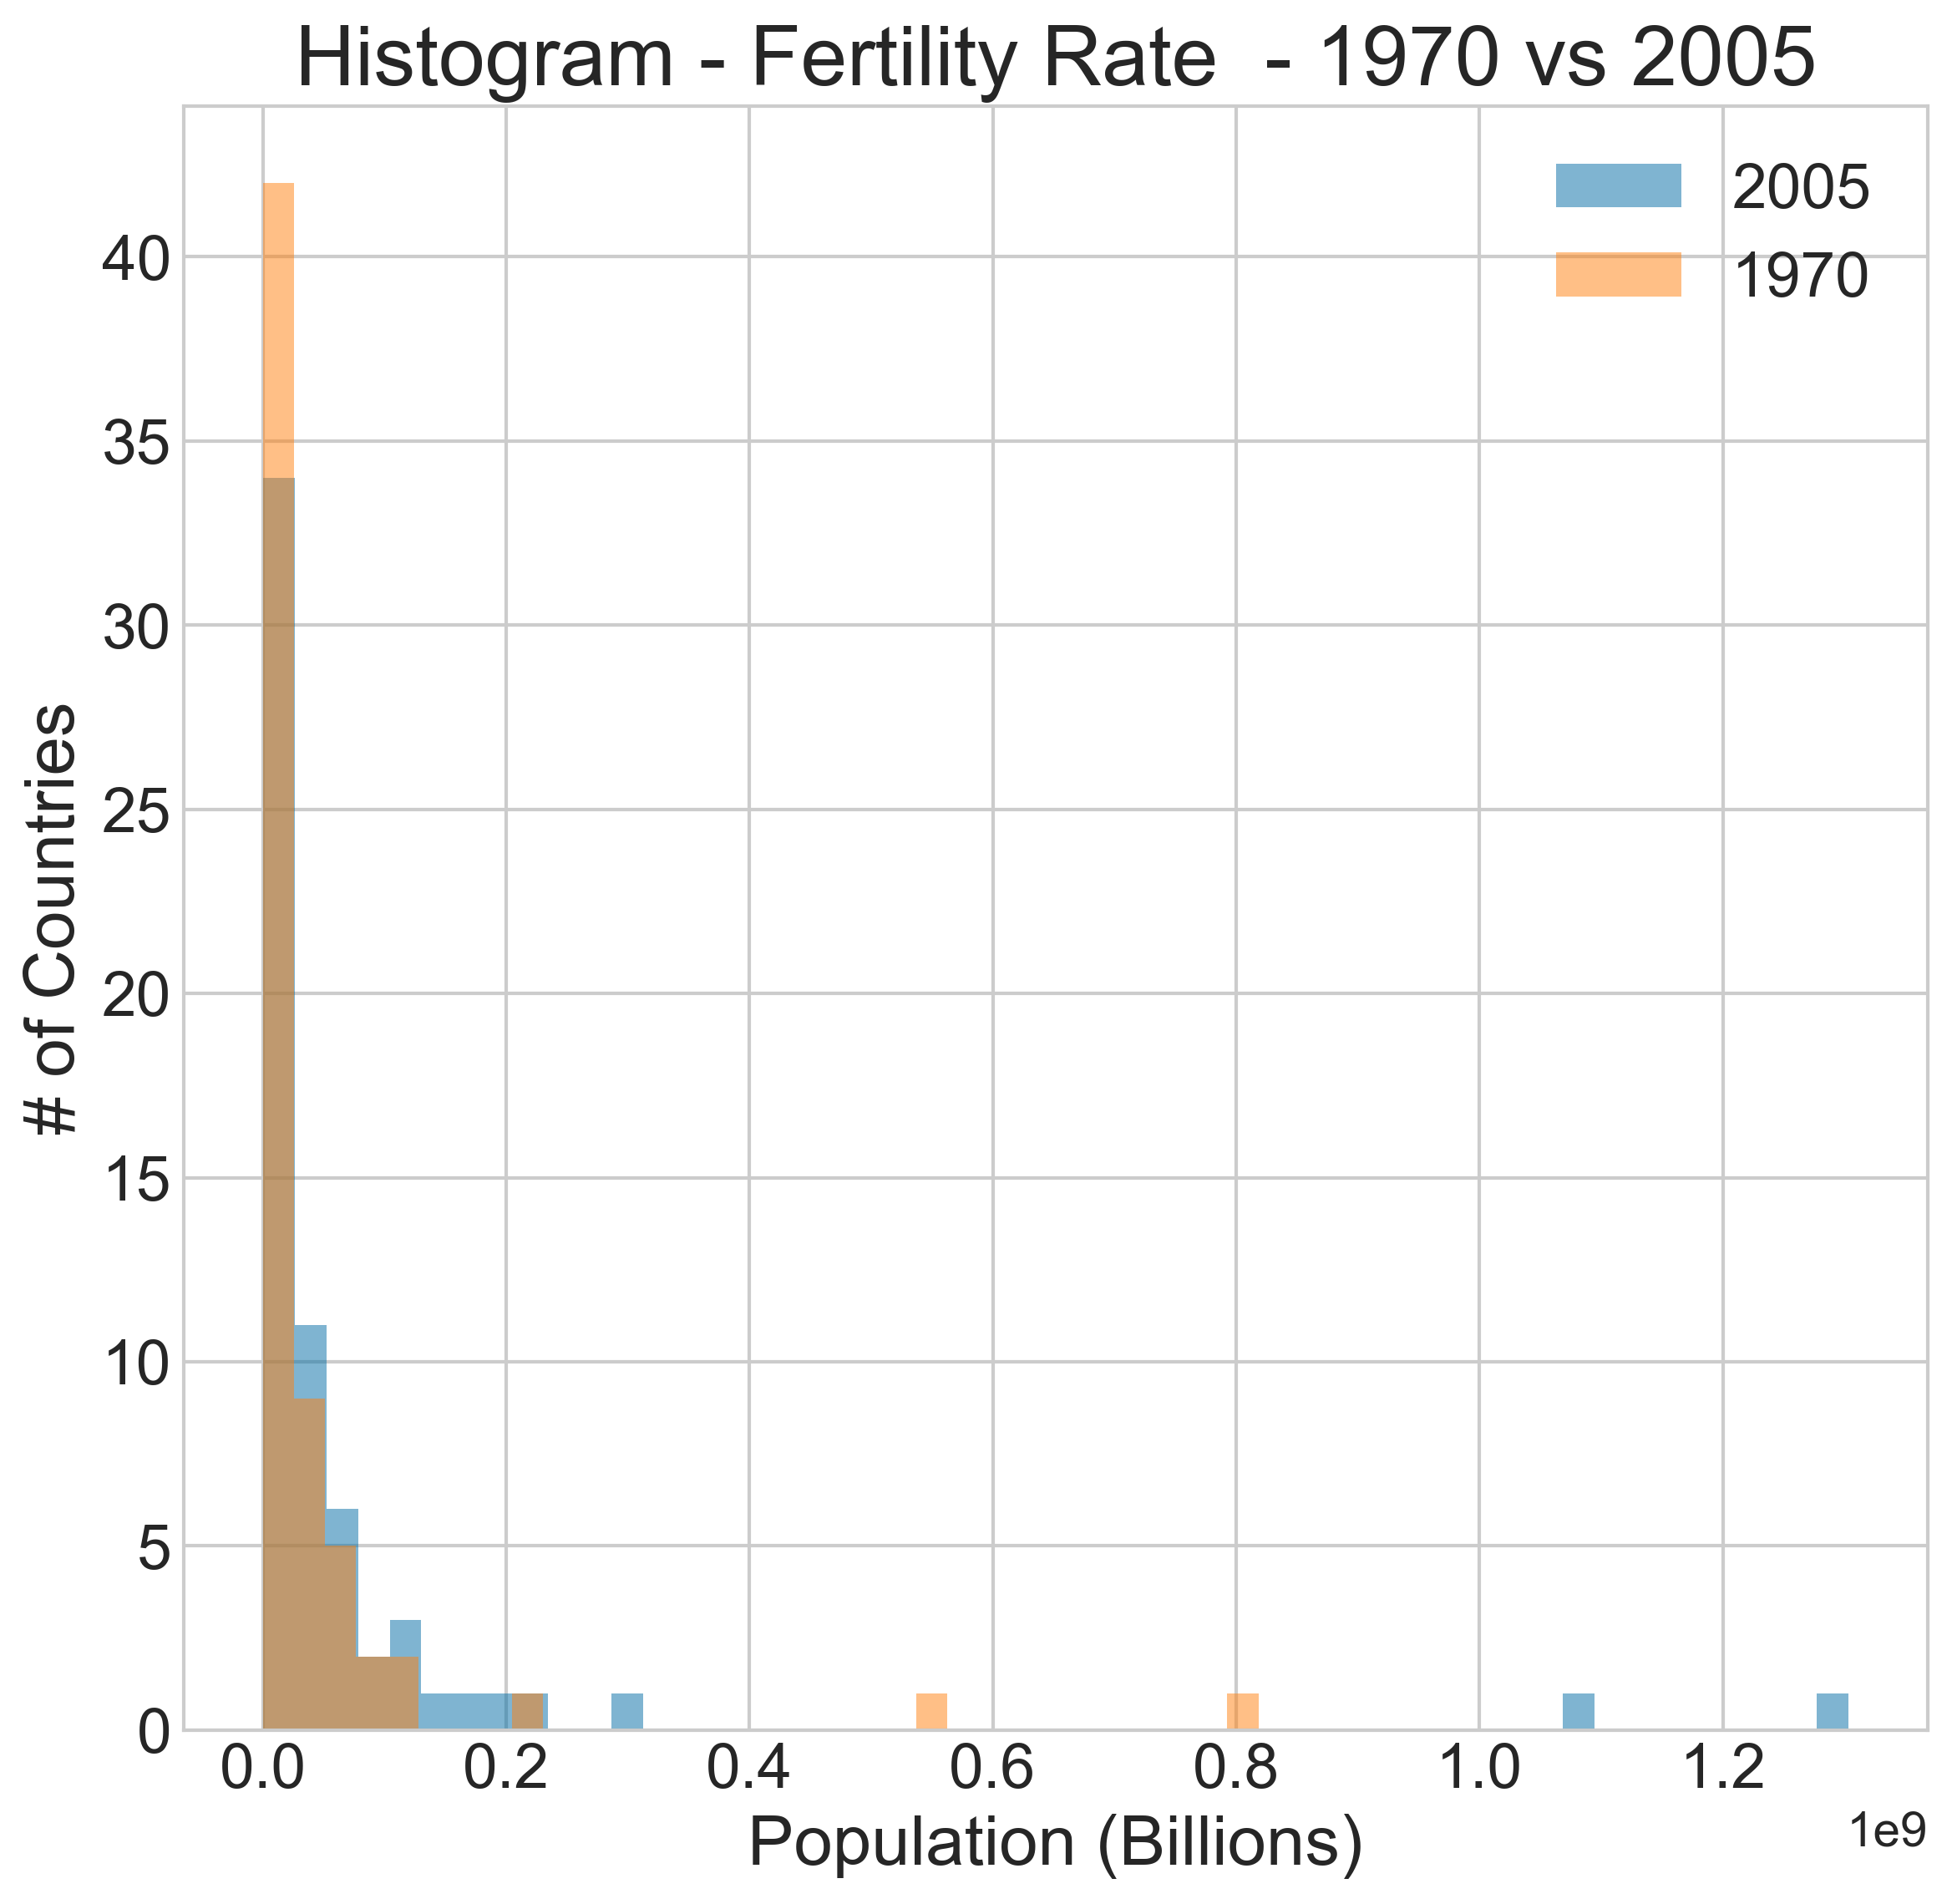

In [27]:
# Read in data
data = datasets.gapminder()

# Define plot characteristics
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(8,8), dpi=300)

# Plot multiple histograms on top of each other
plt.hist(data[data['year']==2005]['pop'], alpha=0.5, bins=50, label='2005'); # Assign legend label
plt.hist(data[data['year']==1970]['pop'], alpha=0.5, bins=32, label='1970'); # Assign legend label

plt.legend(fontsize=18); # Change legend font size

# Altering Plot Labels
plt.xlabel('Population (Billions)', fontsize=20) # Add x axis label
plt.ylabel('# of Countries', fontsize=20) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('Histogram - Fertility Rate  - 1970 vs 2005', fontdict = {'fontsize' : 24}); # Add plot title


# Plotting in Pandas

### Histogram

<Figure size 3000x3000 with 0 Axes>

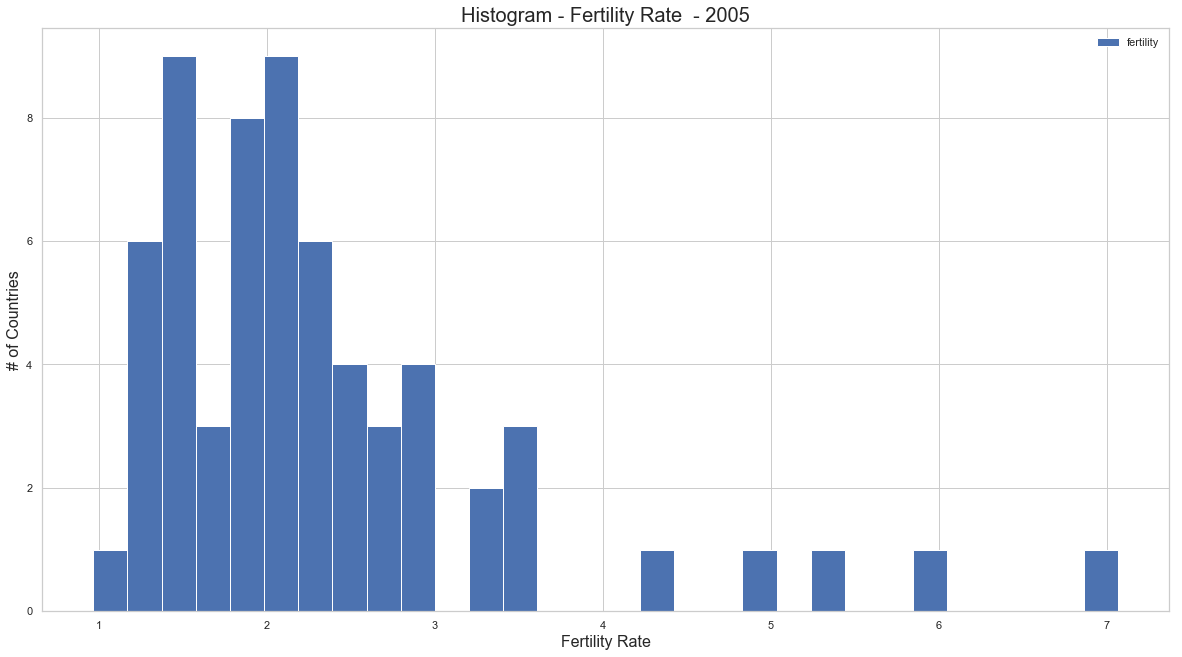

In [54]:
# Read in & subset data
data = datasets.gapminder()
data = data[data['year']==2005]

plt.figure(figsize=(10,10), dpi=300)

# Define plot
data.plot(y='fertility', kind='hist', bins=30, figsize=(18,10));

# Altering Plot Labels
plt.xlabel('Fertility Rate', fontsize=16)
plt.ylabel('# of Countries', fontsize=16)
plt.title('Histogram - Fertility Rate  - 2005', fontdict = {'fontsize' : 20});

### Kernel Density Estimate

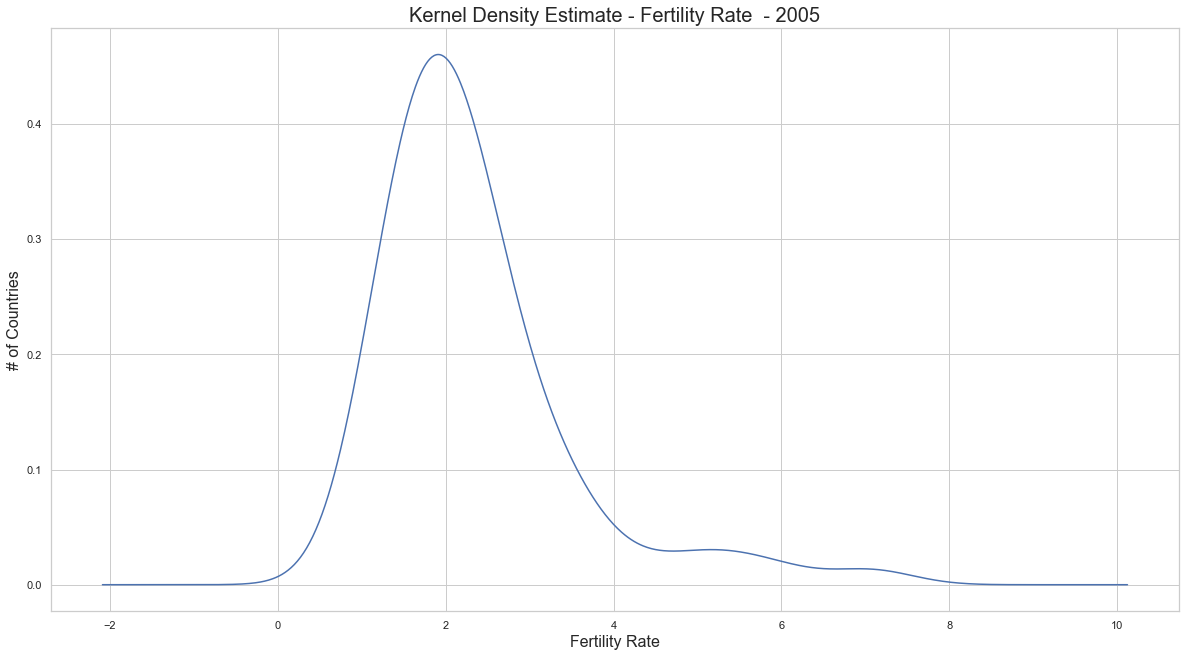

In [53]:
# Kernel Density Estimate is easier to create in pandas vs Matplotlib
data.plot(y='fertility', kind='kde', legend=False, figsize=(18,10));

# Altering Plot Labels
plt.xlabel('Fertility Rate', fontsize=16)
plt.ylabel('# of Countries', fontsize=16)
plt.title('Kernel Density Estimate - Fertility Rate  - 2005', fontdict = {'fontsize' : 20});

### Scatterplots

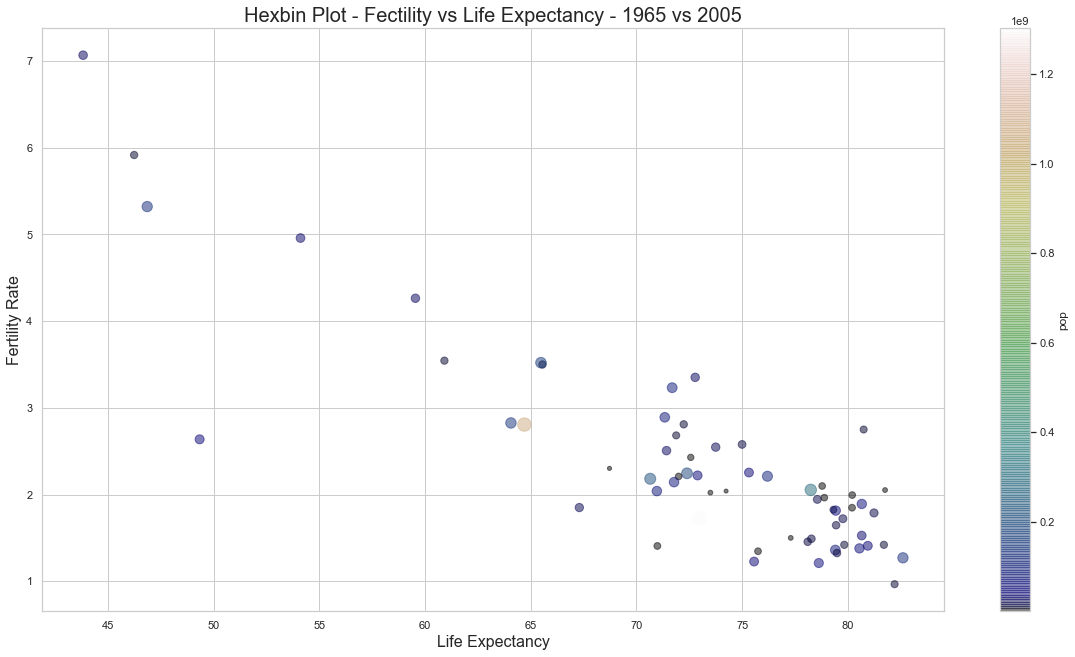

In [51]:
# Reading and subsetting data
data = datasets.gapminder()
data = data[data['year']==2005]

# Defining plot
data.plot(x='life_expect',
          y='fertility',
          kind='scatter',
          alpha=0.5,
          s=data['pop']**(1/4),
          c='pop',
          cmap='gist_earth',
          figsize=(18,10));

# Altering Plot Labels
plt.xlabel('Life Expectancy', fontsize=16)
plt.ylabel('Fertility Rate', fontsize=16)
plt.title('Hexbin Plot - Fectility vs Life Expectancy - 1965 vs 2005', fontdict = {'fontsize' : 20});

### Hexbin Plots

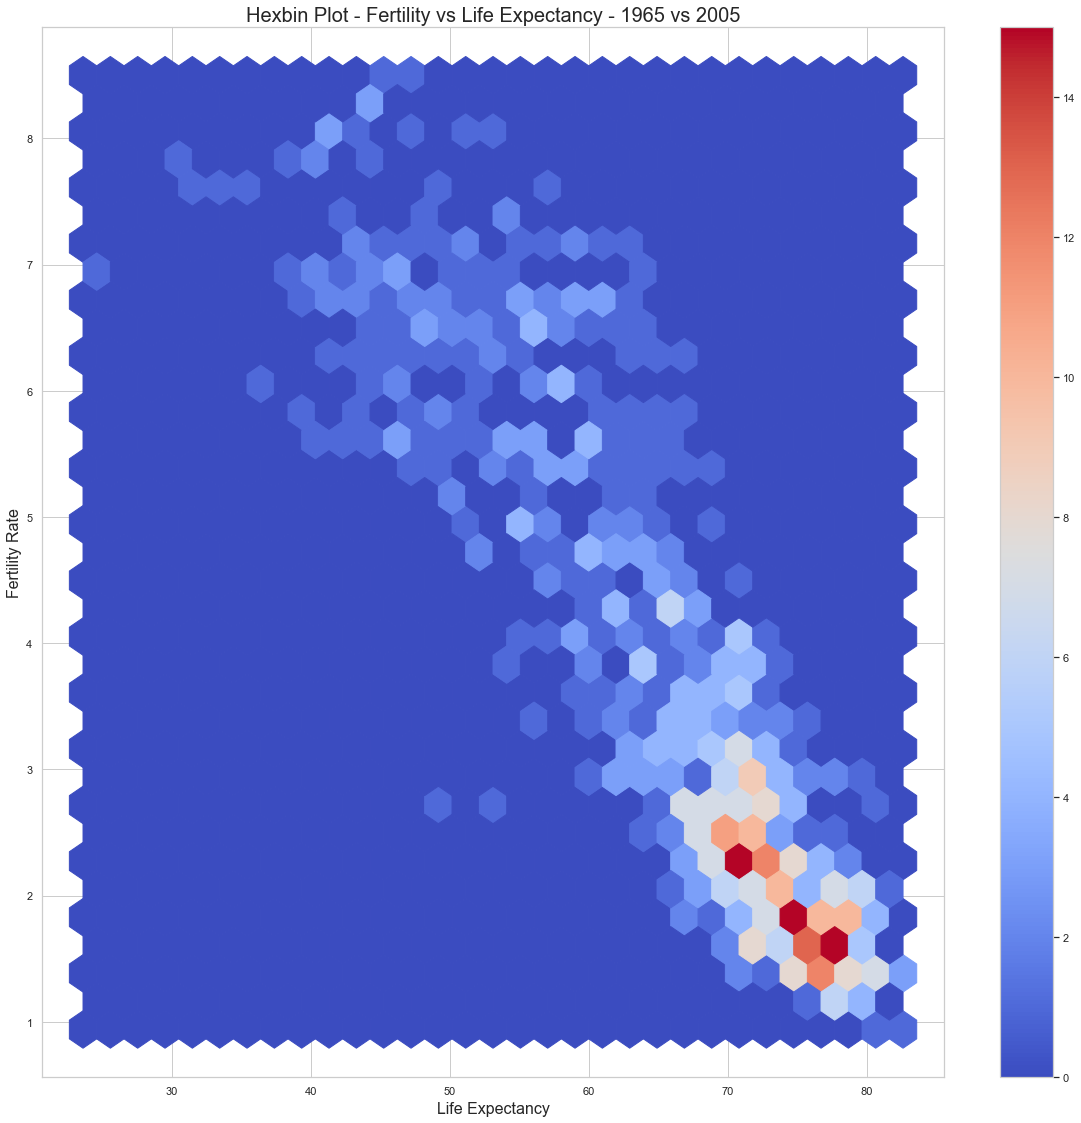

In [56]:
# Read in dataset
data = datasets.gapminder()

# Define plot
data.plot(x='life_expect',
          y='fertility',
          kind='hexbin',
          gridsize=30,
          cmap='coolwarm',
          figsize=(18,18));

# Altering Plot Labels
plt.xlabel('Life Expectancy', fontsize=16)
plt.ylabel('Fertility Rate', fontsize=16)
plt.title('Hexbin Plot - Fertility vs Life Expectancy - 1965 vs 2005', fontdict = {'fontsize' : 20});

### Line Plots

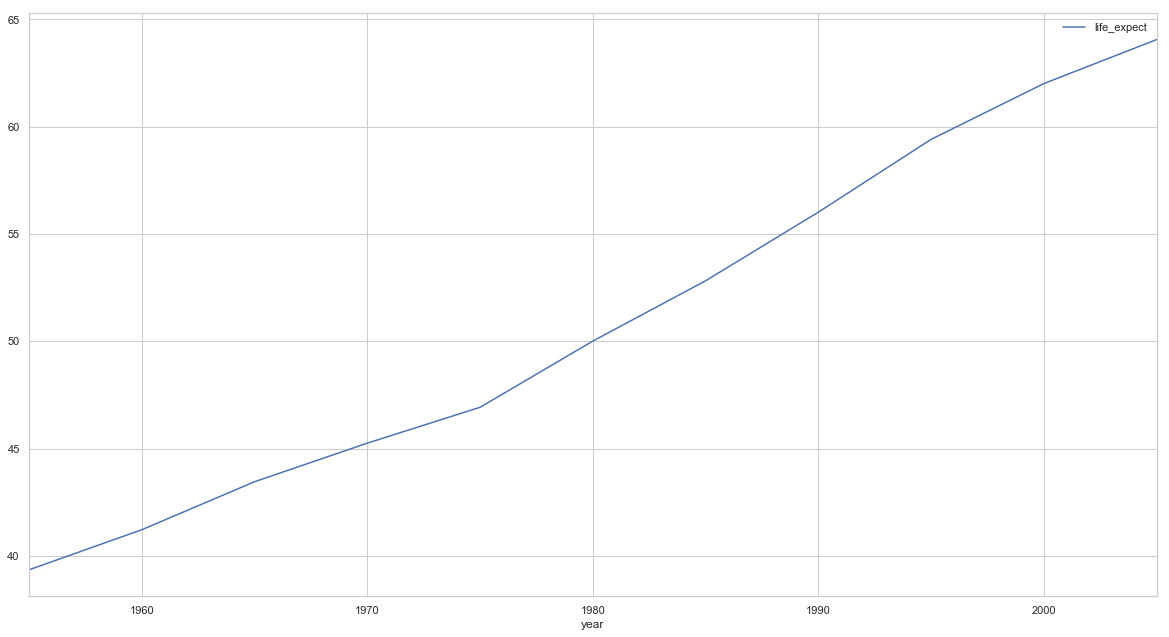

In [58]:
data = datasets.gapminder()
data[data['country']=='Bangladesh'].plot(x='year',y='life_expect', figsize=(18,10));

### Combining Multiple Plots

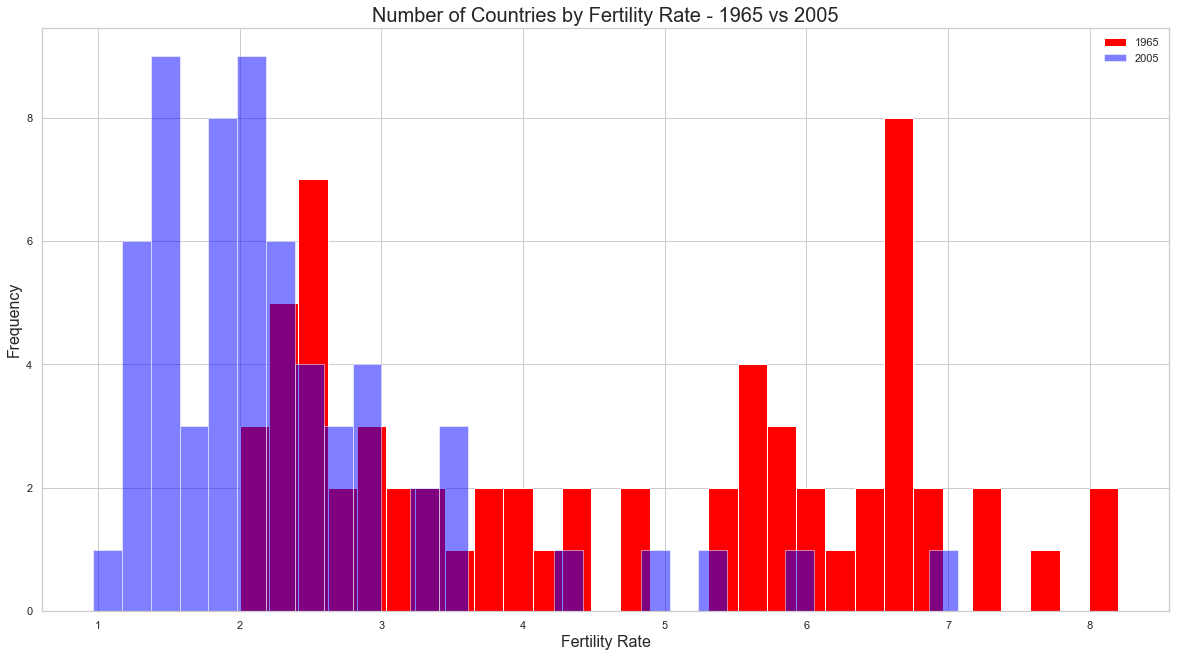

In [59]:
# Read in dataset
data = datasets.gapminder()

# Produce histogram #1 and save as 'ax'
ax = data[data['year']==1965].plot(y='fertility', kind='hist', bins=30, color='red', figsize=(18,10))

# Produce histogram #2 and layer it on top of the first histogram
data[data['year']==2005].plot(ax=ax, y='fertility', kind='hist', bins=30, alpha=0.5, color='blue', figsize=(18,10))

# Add a legend
ax.legend(["1965", "2005"]);

# Altering Plot Labels
plt.xlabel('Fertility Rate', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Number of Countries by Fertility Rate - 1965 vs 2005', fontdict = {'fontsize' : 20});

# Plotting in Seaborn

### Line plot

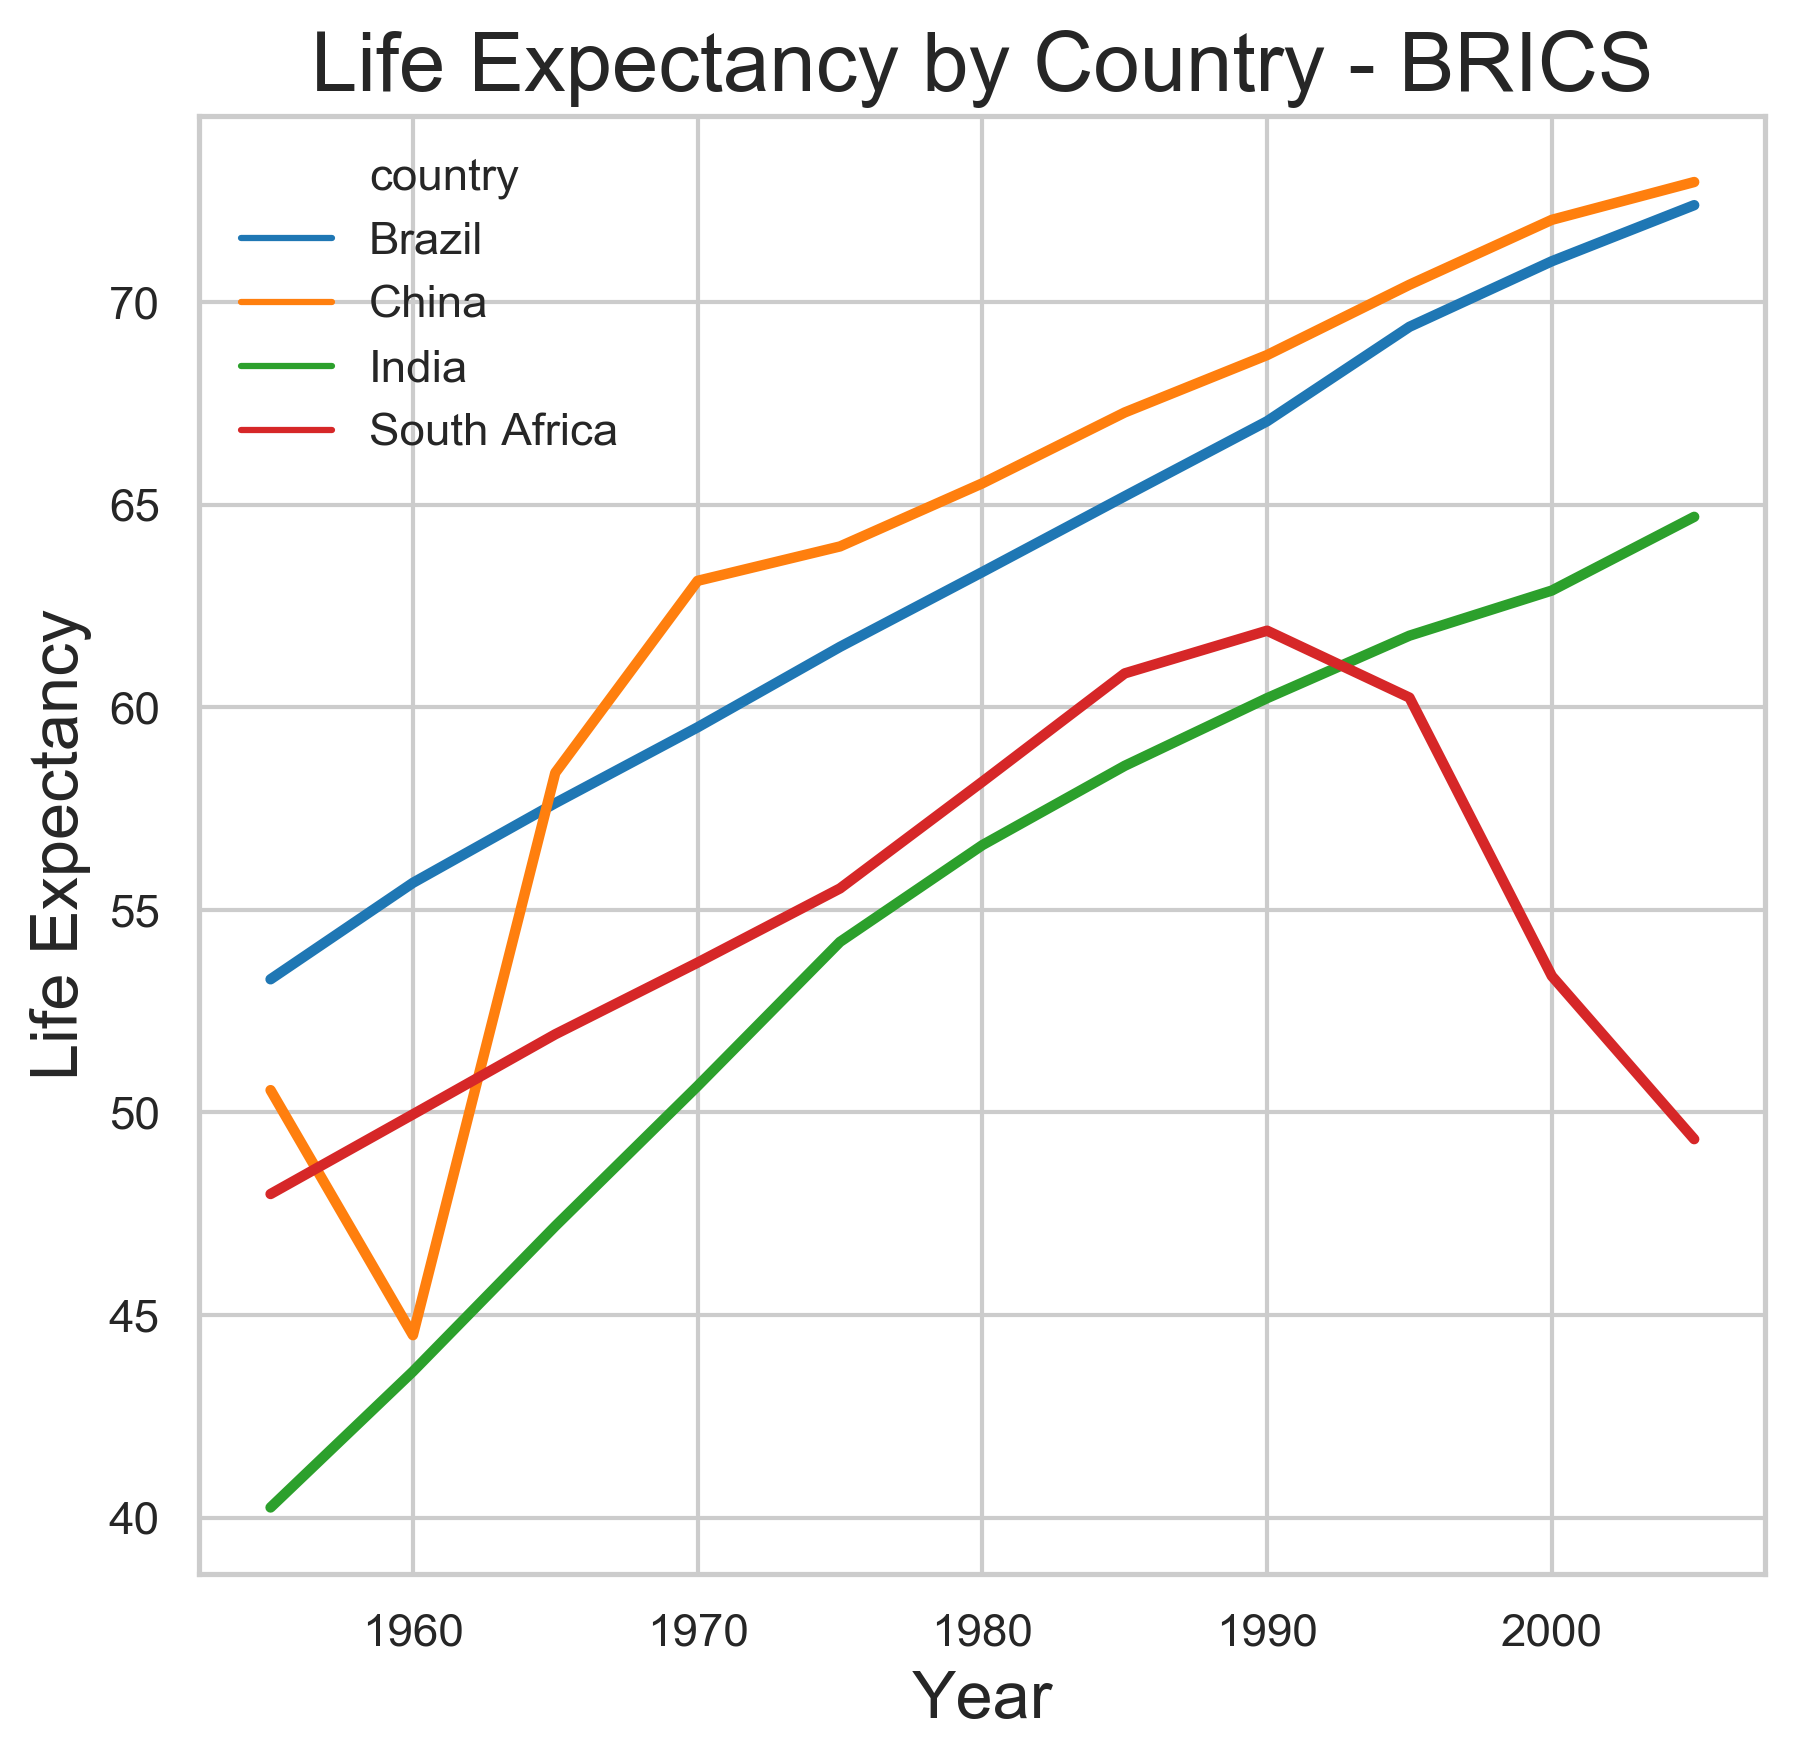

In [49]:
# Define and Select Dataset
data = datasets.gapminder()
data = data[data['country'].isin(['India', 'China', 'Brazil', 'Russia', 'South Africa'])]

# Create Plot
plt.figure(figsize=(6,6), dpi=300)
sns.lineplot(data=data, 
             x='year', 
             y='life_expect', 
             palette="tab10", 
             linewidth=2.5, 
             hue='country')

# Altering Plot Labels
plt.xlabel('Year', fontsize=16)
plt.ylabel('Life Expectancy', fontsize=16)
plt.title('Life Expectancy by Country - BRICS', fontdict = {'fontsize' : 20});

### Scatterplot

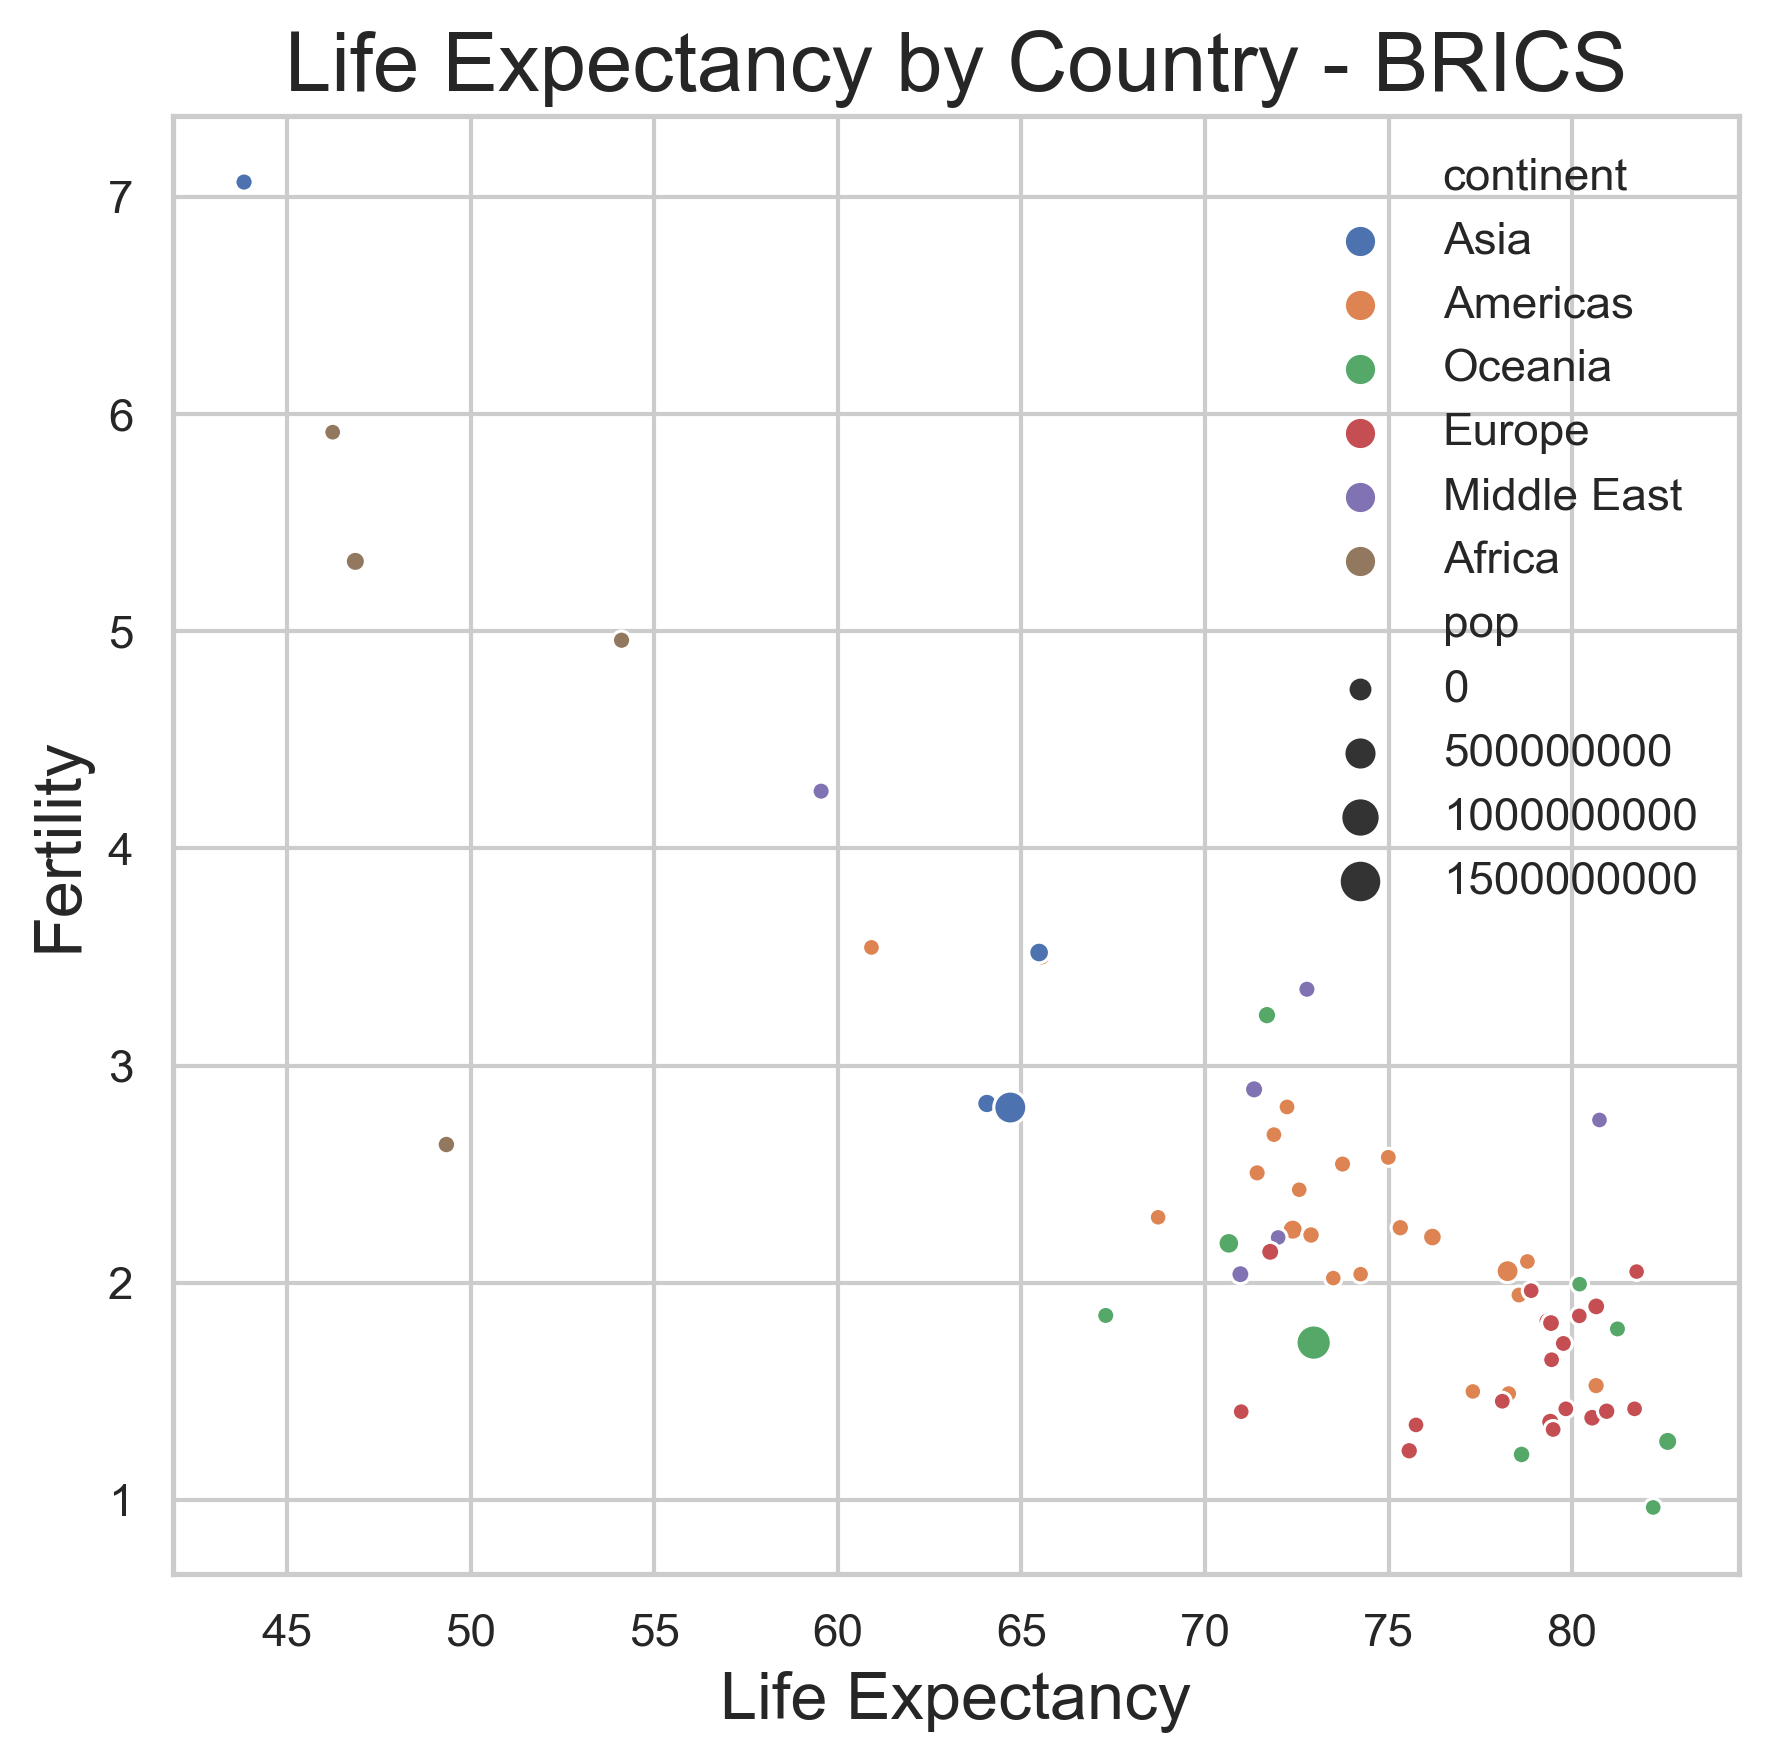

In [48]:
# Reading in and subsetting data
data = datasets.gapminder()
data = data[data['year']==2005]

# Assign continent labels to each record
continent_dict = {0:'Asia',
                  1:'Europe',
                  2:'Africa',
                  3:'Americas',
                  4:'Oceania',
                  5:'Middle East'}

data['continent'] = [continent_dict[x] for x in data['cluster']]

# Define plot
plt.figure(figsize=(6,6), dpi=300)
g = sns.scatterplot(data=data, 
                    x='life_expect', 
                    y='fertility', 
                    hue='continent', 
                    legend='brief', 
                    size='pop')

# Altering Plot Labels
plt.xlabel('Life Expectancy', fontsize=16)
plt.ylabel('Fertility', fontsize=16)
plt.title('Life Expectancy by Country - BRICS', fontdict = {'fontsize' : 20});

### Joint Plot - Regression

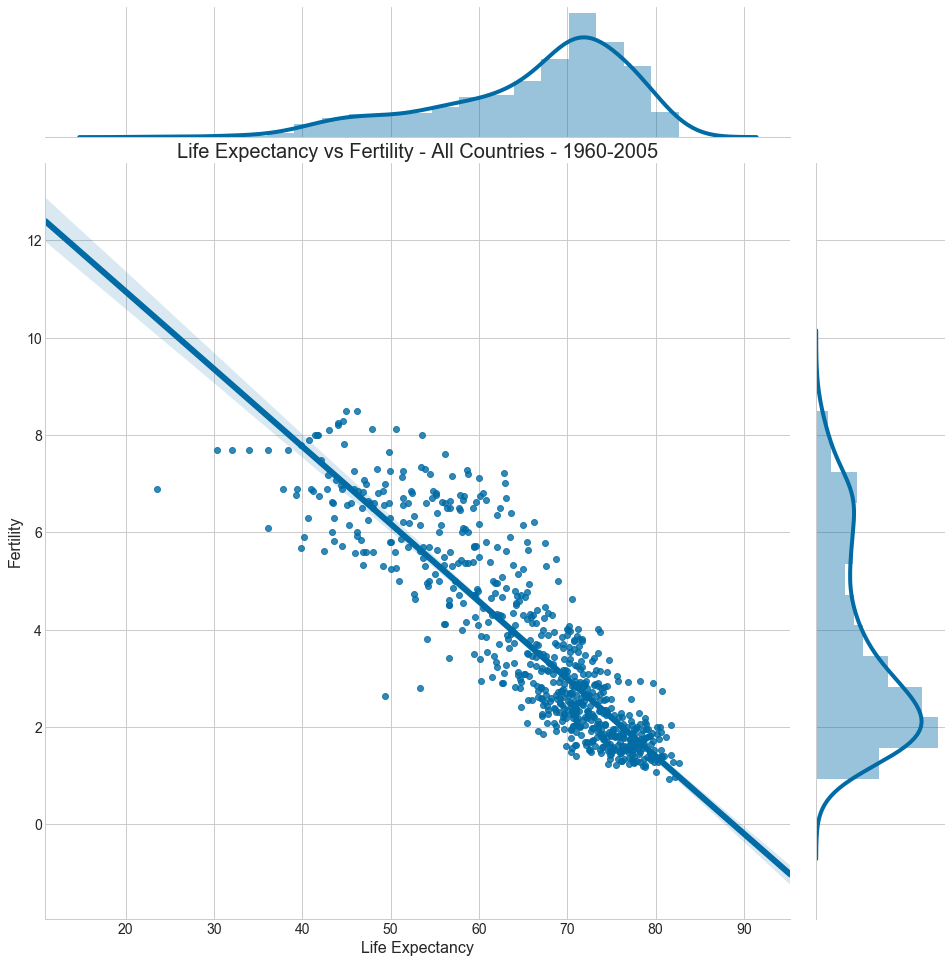

In [36]:
# Reading in data
data = datasets.gapminder()

# Definign plot
g = sns.jointplot(data=data, 
                    x='life_expect', 
                    y='fertility',
                    kind='reg');

# Setting plot size
g.fig.set_size_inches(15,15)

# Altering Plot Labels
plt.xlabel('Life Expectancy', fontsize=16)
plt.ylabel('Fertility', fontsize=16)
plt.title('Life Expectancy vs Fertility - All Countries - 1960-2005', fontdict = {'fontsize' : 20});

### Joint Plot - Kernel Density Estimate

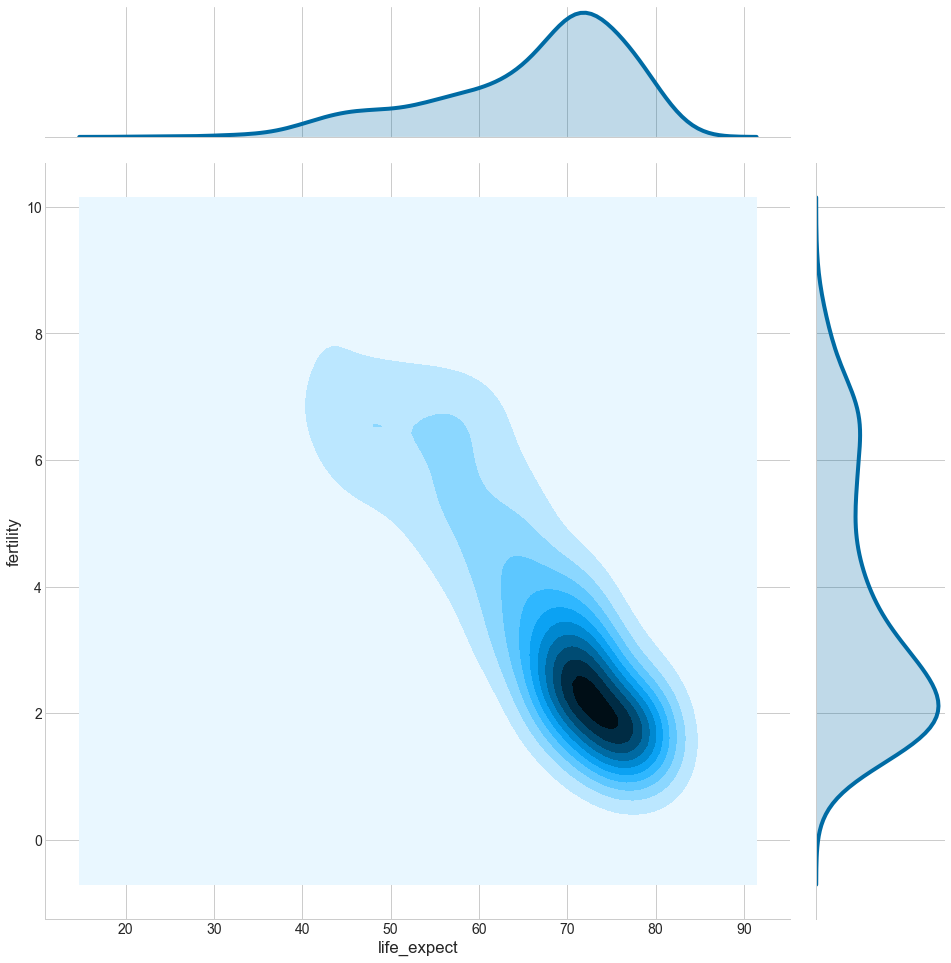

In [37]:
# Reading in data
data = datasets.gapminder()

# Defining plot
g = sns.jointplot(data=data, 
                    x='life_expect', 
                    y='fertility',
                    kind='kde');

# Setting plot size
g.fig.set_size_inches(15,15)


### Swarmplot

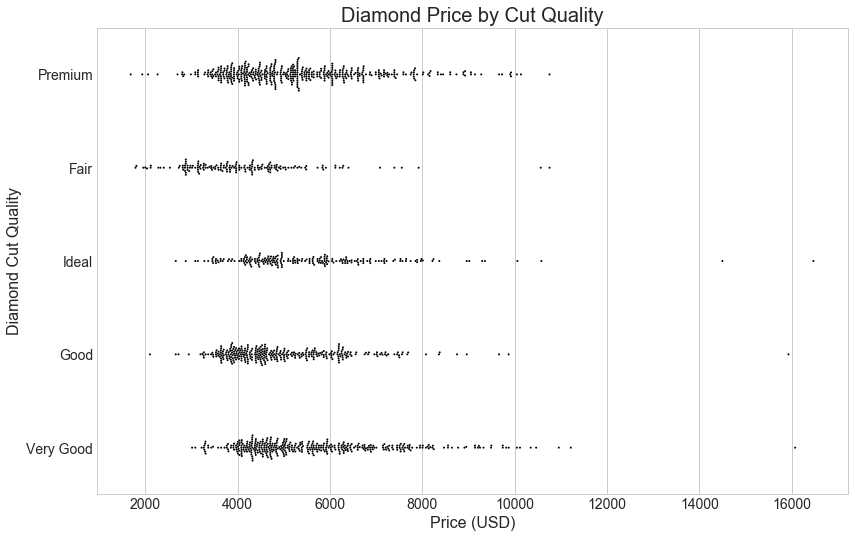

In [38]:
# Read in dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
data = pd.read_csv(url)

# Subset to only diamonds with carat = 1
data = data[data['carat']==1]

# Set the desired plot size for your graph
plt.figure(figsize=(12, 8))

# Add a Seaborn Swarmplot
sns.swarmplot(x="price", y="cut", data=data,
            size=2, color='black');

# Altering Plot Labels
plt.xlabel('Price (USD)', fontsize=16)
plt.ylabel('Diamond Cut Quality', fontsize=16)
plt.title('Diamond Price by Cut Quality', fontdict = {'fontsize' : 20});

### Layering - Boxplot & Swarmplot

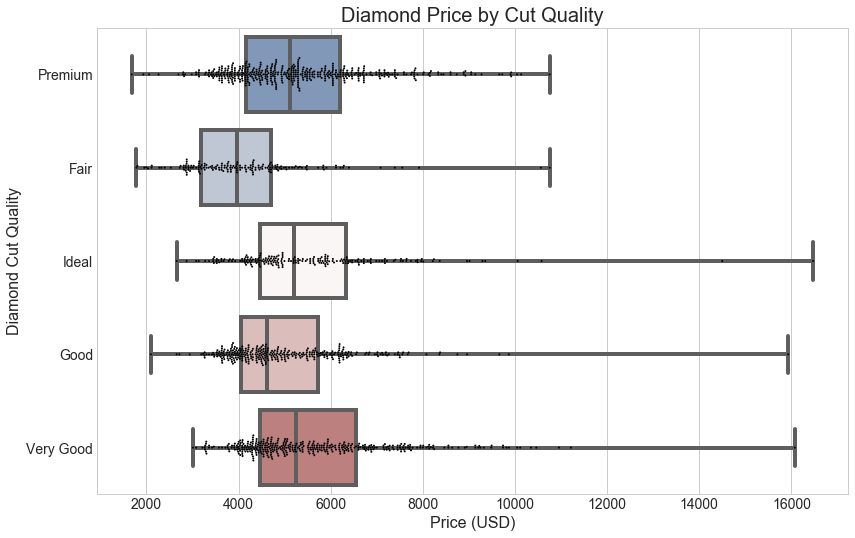

In [39]:
# Read in dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
data = pd.read_csv(url)

# Subset to only diamonds with carat = 1
data = data[data['carat']==1]

# Set the desired plot size for your graph
plt.figure(figsize=(12, 8))

# Create a Seaborn Boxplot
sns.boxplot(x="price", y="cut", data=data,
            whis="range", palette="vlag");

# Add a Seaborn Swarmplot
sns.swarmplot(x="price", y="cut", data=data,
            size=2, color='black');

# Altering Plot Labels
plt.xlabel('Price (USD)', fontsize=16)
plt.ylabel('Diamond Cut Quality', fontsize=16)
plt.title('Diamond Price by Cut Quality', fontdict = {'fontsize' : 20});

### Heat Table

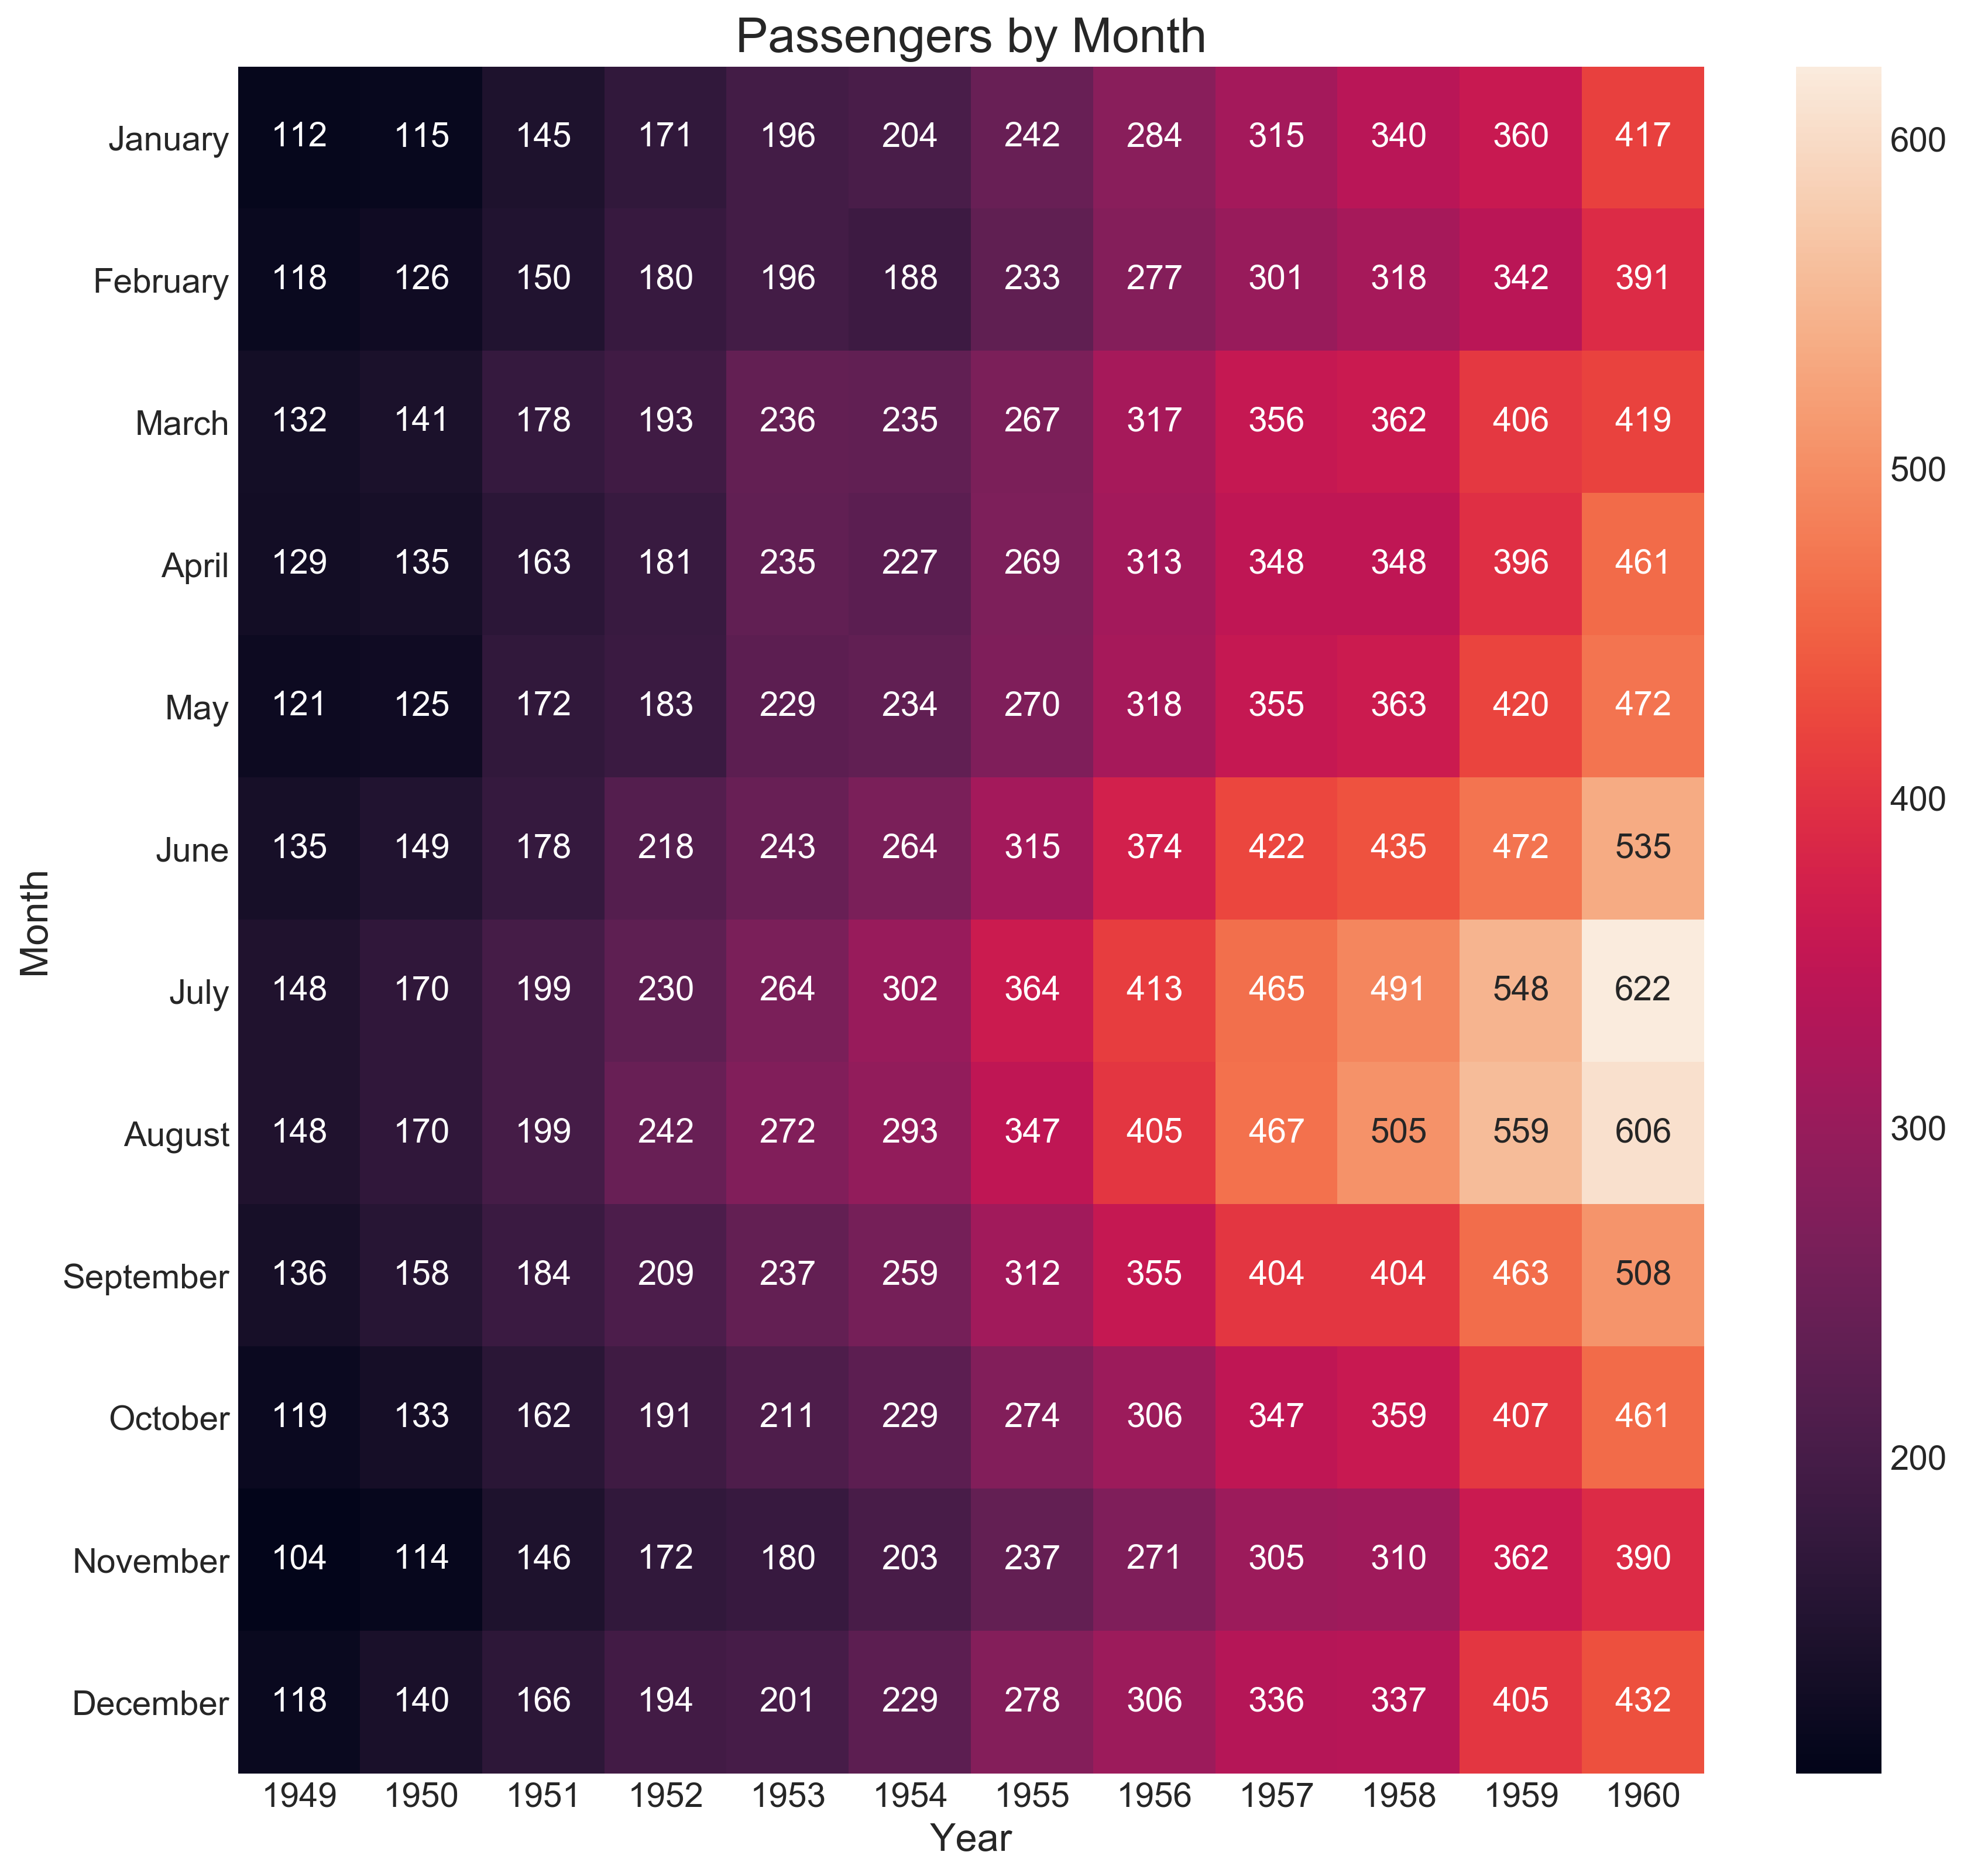

In [40]:
# Adapted from code from Michael Waskom - https://seaborn.pydata.org/examples/heatmap_annotation.html

# Read in Dataset
flights = sns.load_dataset("flights")

# Create a pivot table (aggregation) by month year and number of passengers
flights = flights.pivot("month", "year", "passengers")

# Create the heatmap
plt.figure(figsize=(12, 12), dpi=300)
sns.heatmap(flights, annot=True, fmt="d");

# Altering Plot Labels
plt.xlabel('Year', fontsize=16)
plt.ylabel('Month', fontsize=16)
plt.title('Passengers by Month', fontdict = {'fontsize' : 20});

### Violin Plot

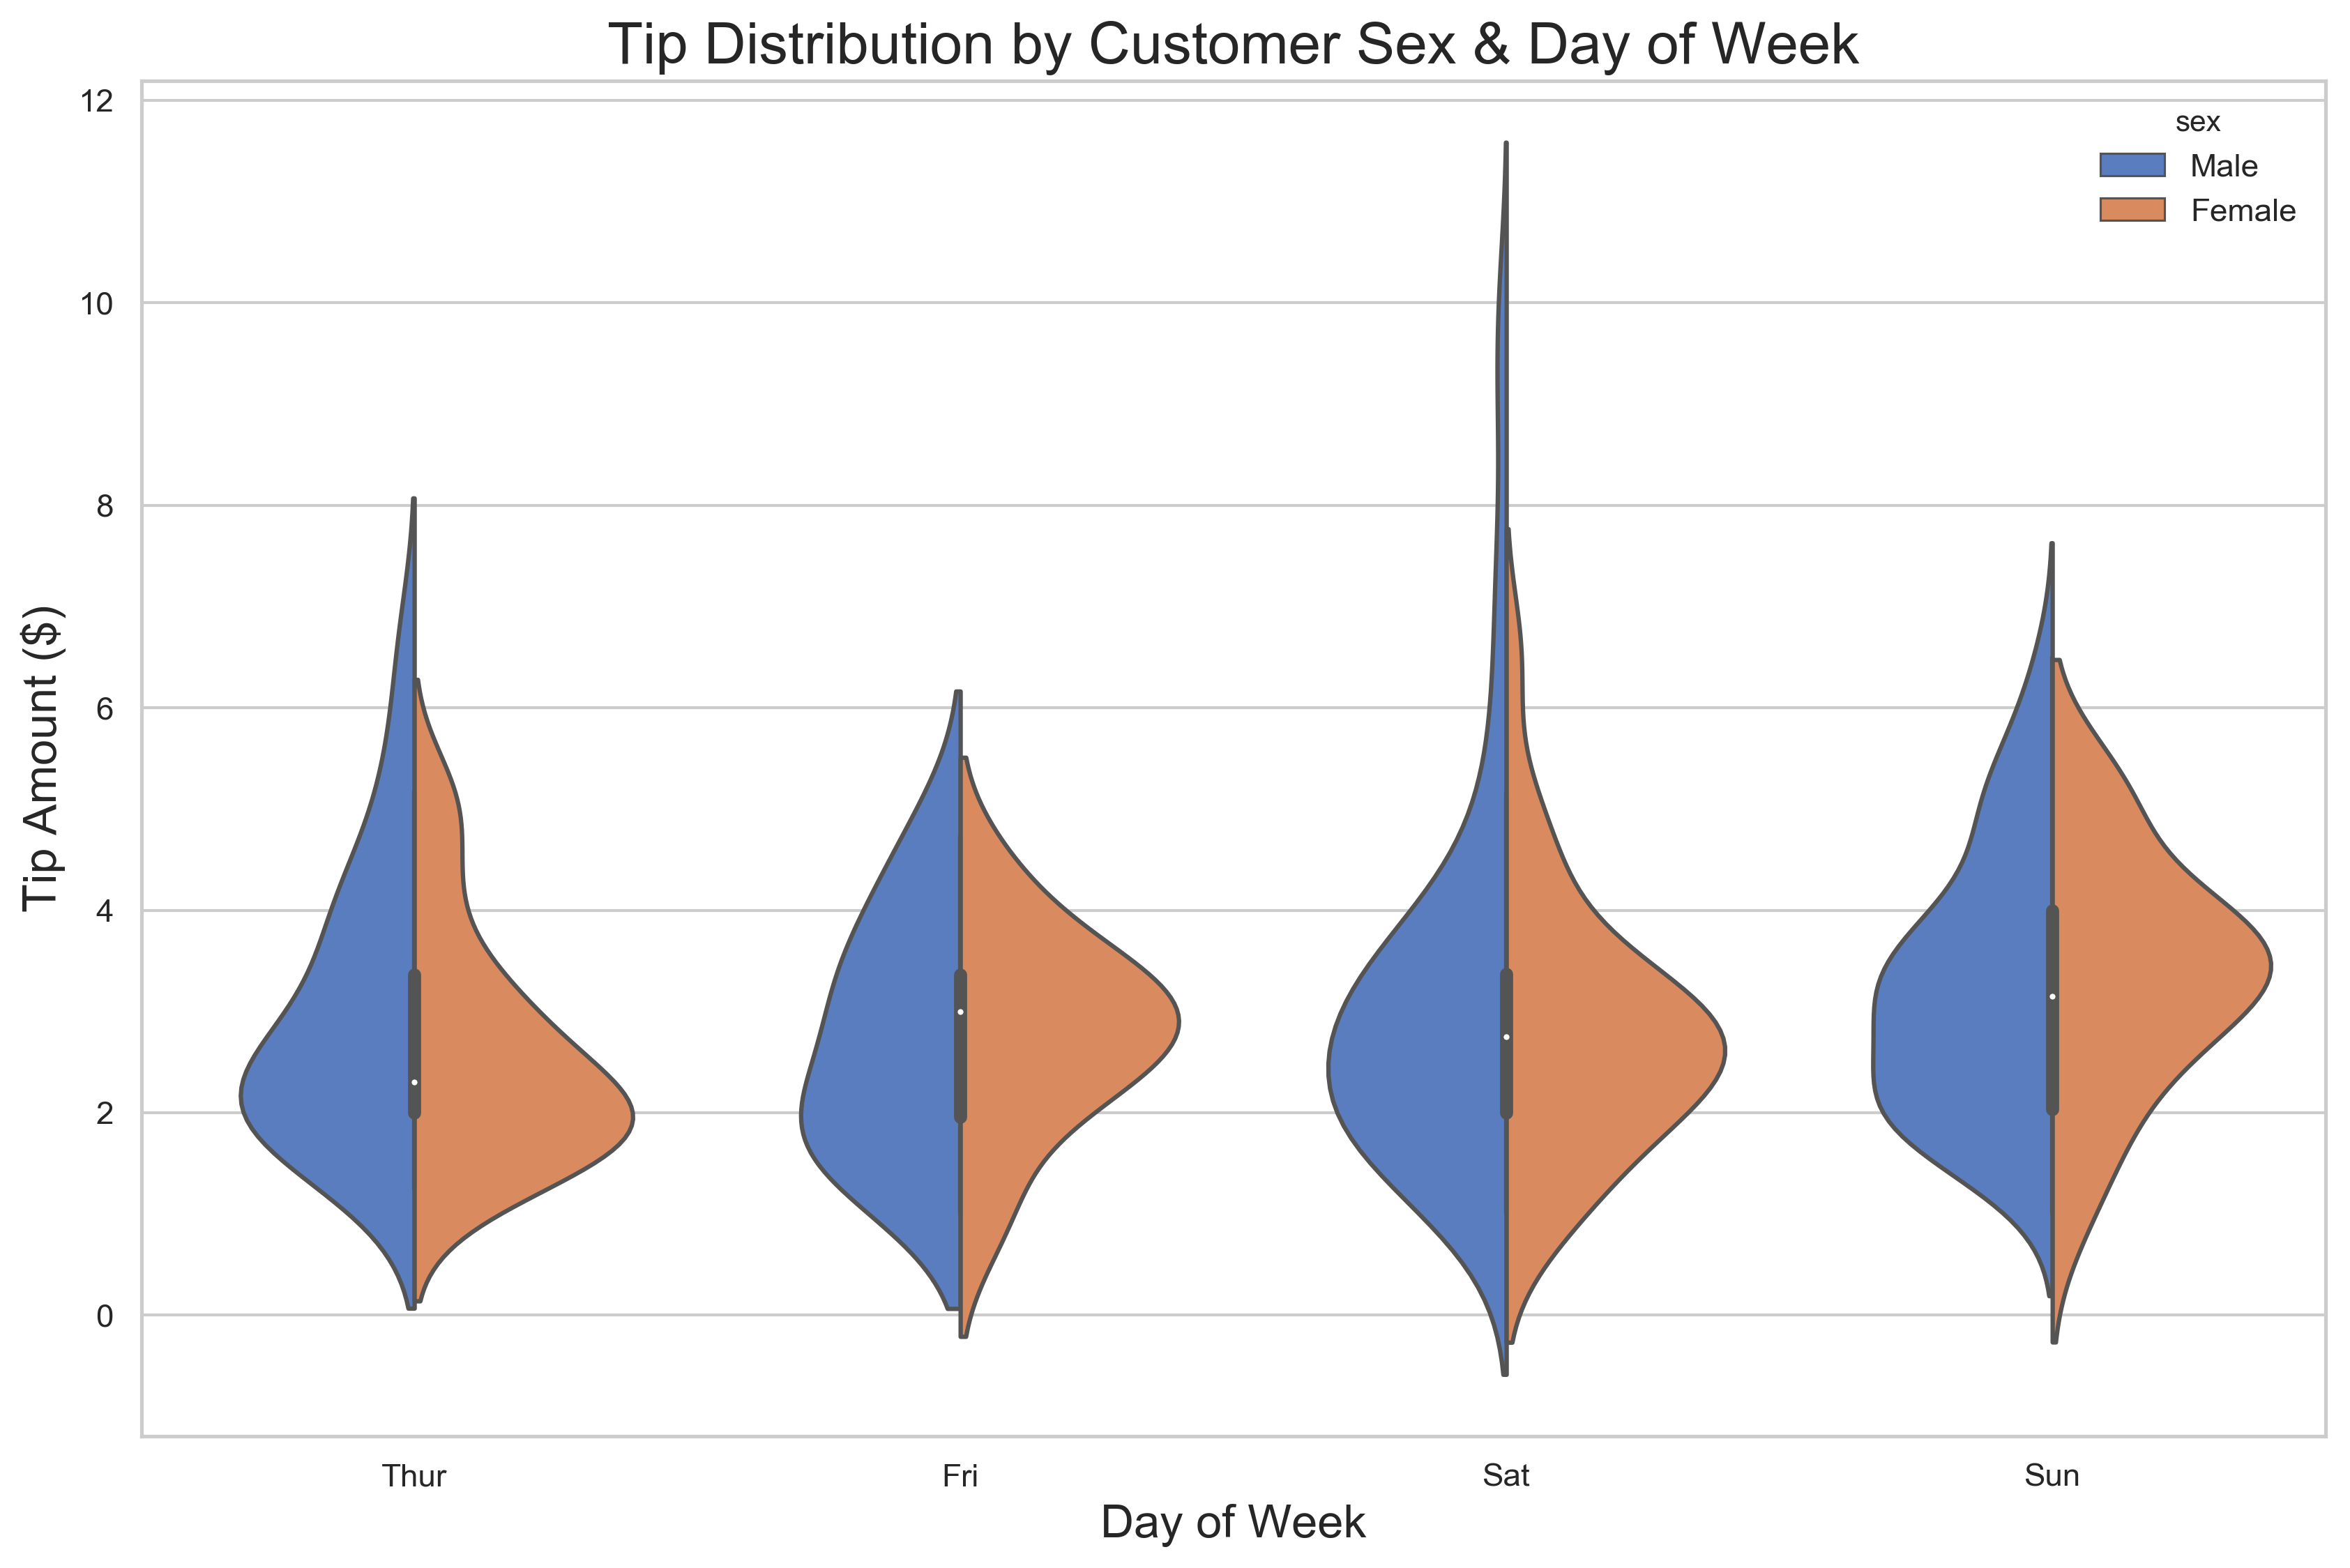

In [41]:
# Adapted from code from Michael Waskom - https://seaborn.pydata.org/generated/seaborn.violinplot.html

# Load dataset
tips = sns.load_dataset("tips")

# Create the violinplot
plt.figure(figsize=(12, 8), dpi=300)
sns.set(style="whitegrid")
sns.violinplot(x="day", y="tip", hue="sex",data=tips, palette="muted", split=True);

# Altering Plot Labels
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('Tip Amount ($)', fontsize=16)
plt.title('Tip Distribution by Customer Sex & Day of Week', fontdict = {'fontsize' : 20});

# Matplotlib vs Pandas vs Seaborn - Side by Side Comparison

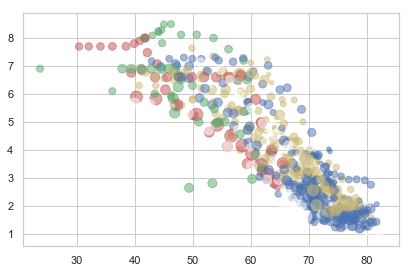

In [42]:
# Matplotlib
data = datasets.gapminder()

colors = data.cluster.map({0:'r',
                    1:'b',
                    2:'g',
                    3:'y',
                    4:'w',
                    5:'b'})

plt.scatter(x=data['life_expect'], 
            y=data['fertility'],
            s=data['pop']**(1/4),
            alpha=0.5,
            c=colors);

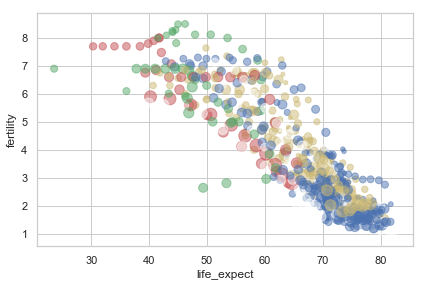

In [43]:
# Pandas
data.plot(kind='scatter',
          x='life_expect', 
          y='fertility',
          s=data['pop']**(1/4),
          alpha=0.5,
          c = colors);

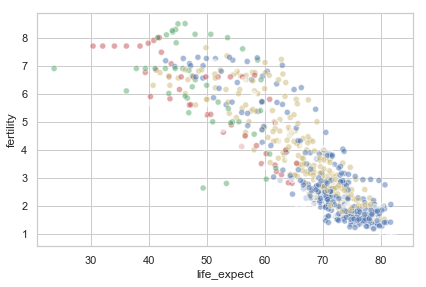

In [60]:
# Seaborn
data = datasets.gapminder()
g = sns.scatterplot(data=data,
                    x='life_expect',
                    y='fertility',
                    alpha=0.5,
                    color=colors)

# Exporting Plots

In [ ]:
# Adapted from code from Michael Waskom - https://seaborn.pydata.org/generated/seaborn.violinplot.html

# Load dataset
tips = sns.load_dataset("tips")

# Create the violinplot
plt.figure(figsize=(12, 8), dpi=300)
sns.set(style="whitegrid")
sns.violinplot(x="day", y="tip", hue="sex",data=tips, palette="muted", split=True);

# Altering Plot Labels
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('Tip Amount ($)', fontsize=16)
plt.title('Tip Distribution by Customer Sex & Day of Week', fontdict = {'fontsize' : 20});

# Save your figure using the code below!
plt.savefig("violin_plot_2.png", dpi=300, bbox_inches='tight')